In [1]:

%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

import collections
import io
import math
import os
import random
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageFilter
import pandas as pd

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.applications import VGG16, ResNet50
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Input
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import imutils
from imutils import paths
import os
import tarfile
import shutil
import tensorflow
import cv2
from glob import glob
import matplotlib.pyplot as plt  
from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D, BatchNormalization
from tensorflow.keras.layers import Flatten, InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/"

In [5]:
from zipfile import ZipFile
def zip_extract(data_dir,fname="Plant Seedling Classification Data"):
  if not os.path.exists(data_dir):
    with ZipFile(data_dir,'r') as zip:
      zip.extractall("/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/")
  else:
    print("Data Extracted Already")

In [6]:
zip_extract(data_dir)

Data Extracted Already


In [7]:
train_path=data_dir+str('/train/')
test_path=data_dir+str('/test/')

In [8]:

plant_category=os.listdir(train_path)
plant_category

['Cleavers',
 'Maize',
 'Charlock',
 'Common wheat',
 'Loose Silky-bent',
 'Fat Hen',
 'Black-grass',
 'Shepherds Purse',
 'Common Chickweed',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [13]:
print(test_path)

/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data//test/


In [9]:
train_data=[]
if not train_data:
  for category_id, category in enumerate(plant_category):
    for file in os.listdir(os.path.join(train_path,category)):
      train_data.append(['train/{}/{}'.format(category,file),file,category_id,category])
  train_data = pd.DataFrame(train_data, columns=['file','filename', 'category_id', 'category'])
  train_data.shape
else:
  print("train data already extracted")

In [10]:
test_data=[]
for file in os.listdir(test_path):
  test_data.append(['test/{}'.format(file),file])
test_data=pd.DataFrame(test_data, columns=['file','filename'])
train_data.shape

(4750, 4)

In [11]:
train_data.head()

,file,filename,category_id,category
0,train/Cleavers/1ef8ef4af.png,1ef8ef4af.png,0,Cleavers
1,train/Cleavers/11c5eb5b6.png,11c5eb5b6.png,0,Cleavers
2,train/Cleavers/0f557bb1a.png,0f557bb1a.png,0,Cleavers
3,train/Cleavers/09da4f213.png,09da4f213.png,0,Cleavers
4,train/Cleavers/1bc5bea6c.png,1bc5bea6c.png,0,Cleavers


In [31]:
fpath='/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/'
fullnew_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/resize_image/"
import cv2
from tqdm import tqdm

train_X=[]
train_y=[]
i = 0 # initialisation
for f in tqdm(train_data.file):
   # f for format ,jpg
  train_img = cv2.imread(fpath+'{}'.format(f),0)
  label = categorical_labels[i]
  train_img_resize = cv2.resize(train_img, (128, 128))
  if not os.path.exists(fullnew_dir):
    os.makedirs(fullnew_dir) 
  cv2.imwrite('{}{}{}'.format(fullnew_dir,'/',train_data.filename[i]),train_img_resize)
  train_X.append(train_img_resize)
  train_y.append(label)
  print(train_data.file[i])
  i += 1



  0%|          | 10/4750 [00:00<00:50, 93.19it/s]

train/Cleavers/1ef8ef4af.png
train/Cleavers/11c5eb5b6.png
train/Cleavers/0f557bb1a.png
train/Cleavers/09da4f213.png
train/Cleavers/1bc5bea6c.png
train/Cleavers/1e33a3dce.png
train/Cleavers/0a1e622bc.png
train/Cleavers/005b4a3e3.png
train/Cleavers/1b28a0668.png
train/Cleavers/20964b9b7.png
train/Cleavers/1c43f8251.png
train/Cleavers/1c801fa69.png
train/Cleavers/1896061bc.png
train/Cleavers/265a7f826.png
train/Cleavers/124f732d8.png
train/Cleavers/0b44c3a6c.png
train/Cleavers/2261906cf.png
train/Cleavers/0ac0f0a66.png
train/Cleavers/299190b08.png


  1%|          | 31/4750 [00:00<01:03, 74.57it/s]

train/Cleavers/16e0482dd.png
train/Cleavers/0bec204c7.png
train/Cleavers/153f94019.png
train/Cleavers/198653e67.png
train/Cleavers/2559137f2.png
train/Cleavers/01605ed73.png
train/Cleavers/00aa8d5a4.png
train/Cleavers/06f447848.png
train/Cleavers/11760cf9f.png
train/Cleavers/252585ad8.png
train/Cleavers/1a4fe0d36.png
train/Cleavers/0515bc601.png
train/Cleavers/15917308c.png
train/Cleavers/1526846f7.png
train/Cleavers/1e0caafd3.png
train/Cleavers/1af15c939.png
train/Cleavers/15f41649c.png


  1%|          | 45/4750 [00:00<01:17, 60.38it/s]

train/Cleavers/0dbfac958.png
train/Cleavers/184e9eb16.png
train/Cleavers/1ffcc6d2c.png
train/Cleavers/294d28c60.png
train/Cleavers/1e5041183.png
train/Cleavers/00df90ed6.png
train/Cleavers/2297085a0.png
train/Cleavers/1d0b4527d.png
train/Cleavers/0ac327873.png
train/Cleavers/0a33283c7.png
train/Cleavers/0756fd41e.png
train/Cleavers/07ac7bc07.png
train/Cleavers/0522ec53b.png
train/Cleavers/1e510607e.png
train/Cleavers/0bcf29af7.png
train/Cleavers/0920492fd.png
train/Cleavers/136d5af0b.png
train/Cleavers/10a18e8d1.png


  1%|          | 55/4750 [00:00<01:09, 67.37it/s]

train/Cleavers/0bdee2052.png
train/Cleavers/03bee43c0.png
train/Cleavers/42645d809.png
train/Cleavers/3516267fc.png
train/Cleavers/368707311.png


  2%|▏         | 72/4750 [00:01<01:21, 57.28it/s]

train/Cleavers/2baa68b6e.png
train/Cleavers/398cc8af9.png
train/Cleavers/4613b263e.png
train/Cleavers/3ccb22924.png
train/Cleavers/2e547d792.png
train/Cleavers/34f210a03.png
train/Cleavers/4449f17c5.png
train/Cleavers/413a96d3d.png
train/Cleavers/44047de36.png
train/Cleavers/33c1f167f.png
train/Cleavers/30418535b.png
train/Cleavers/41da62977.png
train/Cleavers/3f5b465c6.png
train/Cleavers/3fc47de35.png


  2%|▏         | 88/4750 [00:01<01:27, 53.56it/s]

train/Cleavers/44ef950c3.png
train/Cleavers/34648ed0b.png
train/Cleavers/2f38351b7.png
train/Cleavers/4444af894.png
train/Cleavers/3a4e50c40.png
train/Cleavers/33d0d3358.png
train/Cleavers/2e47c7233.png
train/Cleavers/37a3c8675.png
train/Cleavers/360f883f6.png
train/Cleavers/491286e9c.png
train/Cleavers/3232000bf.png
train/Cleavers/323f03521.png
train/Cleavers/3d9ea1649.png
train/Cleavers/4301f9c21.png
train/Cleavers/2c5c4d127.png
train/Cleavers/364a60044.png
train/Cleavers/4620b59f7.png


  2%|▏         | 95/4750 [00:01<01:30, 51.72it/s]

train/Cleavers/420f3654f.png
train/Cleavers/2e97487c4.png
train/Cleavers/3c2e76718.png
train/Cleavers/2a1d10e06.png
train/Cleavers/36e0d8ca6.png
train/Cleavers/6820df17f.png
train/Cleavers/68a3d6b27.png
train/Cleavers/750c447e0.png
train/Cleavers/581c0ecb3.png
train/Cleavers/796b61337.png
train/Cleavers/565a81e32.png


  2%|▏         | 103/4750 [00:01<01:23, 55.97it/s]

train/Cleavers/7b49d39c2.png
train/Cleavers/5abac7fbf.png
train/Cleavers/61287f47a.png
train/Cleavers/68a24bc47.png
train/Cleavers/655d1ffdd.png
train/Cleavers/4c7552a5c.png
train/Cleavers/591daf862.png
train/Cleavers/500a7b5b3.png
train/Cleavers/595d40614.png


  2%|▏         | 117/4750 [00:02<01:32, 50.35it/s]

train/Cleavers/495602403.png
train/Cleavers/67afc84df.png
train/Cleavers/5778852ed.png
train/Cleavers/58b68b1ea.png
train/Cleavers/4e01a3eab.png
train/Cleavers/7b9729321.png
train/Cleavers/6895ae7c9.png
train/Cleavers/666fa4f1a.png
train/Cleavers/77e4bee70.png
train/Cleavers/6e0fa9bcc.png
train/Cleavers/58be08e22.png
train/Cleavers/794b914bf.png
train/Cleavers/5d2b820a9.png
train/Cleavers/6bcc0c252.png
train/Cleavers/6c10be2a7.png
train/Cleavers/5543b3415.png


  3%|▎         | 127/4750 [00:02<01:19, 58.10it/s]

train/Cleavers/5b5a7214a.png
train/Cleavers/5aaaf0ea0.png
train/Cleavers/6cd9902c0.png
train/Cleavers/7b257e388.png
train/Cleavers/6acdb8e68.png
train/Cleavers/5439f9f36.png


  3%|▎         | 143/4750 [00:02<01:25, 54.07it/s]

train/Cleavers/7a9efaf6c.png
train/Cleavers/4b9125e90.png
train/Cleavers/609c74407.png
train/Cleavers/5010487f2.png
train/Cleavers/75371625f.png
train/Cleavers/78dde1704.png
train/Cleavers/6cead585f.png
train/Cleavers/502eee444.png
train/Cleavers/7cef265e7.png
train/Cleavers/491b8502a.png
train/Cleavers/6a4ef17c2.png
train/Cleavers/c3f4b326a.png
train/Cleavers/c5f57467a.png
train/Cleavers/9b35827fa.png


  3%|▎         | 160/4750 [00:02<01:27, 52.62it/s]

train/Cleavers/a562c2b14.png
train/Cleavers/868da1d55.png
train/Cleavers/9e250b25f.png
train/Cleavers/c30be2849.png
train/Cleavers/b0a1ac210.png
train/Cleavers/8035a175e.png
train/Cleavers/8a112bfb4.png
train/Cleavers/7f3369186.png
train/Cleavers/94f82e916.png
train/Cleavers/9b941ac1b.png
train/Cleavers/a4cfc9036.png
train/Cleavers/c4dfaf0ee.png
train/Cleavers/c33c988c1.png
train/Cleavers/863b1dbd4.png
train/Cleavers/853b1a32e.png
train/Cleavers/bd2fa36aa.png
train/Cleavers/a3b9a33dd.png
train/Cleavers/95a10dd51.png


  4%|▎         | 177/4750 [00:03<01:28, 51.79it/s]

train/Cleavers/a714fbc63.png
train/Cleavers/a96e704e7.png
train/Cleavers/9214c2997.png
train/Cleavers/a9b4417a7.png
train/Cleavers/c336c8da6.png
train/Cleavers/b022e53c3.png
train/Cleavers/8df9991b8.png
train/Cleavers/bc66f9116.png
train/Cleavers/c7b4ce2e3.png
train/Cleavers/98937154f.png
train/Cleavers/c806aa45d.png
train/Cleavers/85b23f3e6.png
train/Cleavers/a5b126385.png
train/Cleavers/9b8ed8471.png
train/Cleavers/a07efb1e0.png
train/Cleavers/b6220c08e.png


  4%|▍         | 184/4750 [00:03<01:45, 43.29it/s]

train/Cleavers/8aa470d03.png
train/Cleavers/bd4f2a692.png
train/Cleavers/83abc465e.png
train/Cleavers/952540220.png
train/Cleavers/7e501d74c.png
train/Cleavers/899877fe1.png
train/Cleavers/8ee3f0b6f.png
train/Cleavers/8baf67453.png

  4%|▍         | 194/4750 [00:03<01:29, 51.16it/s]


train/Cleavers/ba79cdbcb.png
train/Cleavers/c0c1567ab.png
train/Cleavers/8cc66b39e.png
train/Cleavers/be41914d8.png
train/Cleavers/bd6681c02.png
train/Cleavers/c9576e39e.png
train/Cleavers/a06109e80.png
train/Cleavers/7e8212b65.png
train/Cleavers/7e9b71110.png
train/Cleavers/8c26d810d.png
train/Cleavers/c6c56d45c.png
train/Cleavers/b07aeb162.png


  4%|▍         | 210/4750 [00:03<01:30, 50.28it/s]

train/Cleavers/871ec43cc.png
train/Cleavers/bf07fe75d.png
train/Cleavers/9d763f383.png
train/Cleavers/8c73a6f46.png
train/Cleavers/8c0e41a93.png
train/Cleavers/9c337ab7a.png
train/Cleavers/c0784c573.png
train/Cleavers/a20cd3ec2.png
train/Cleavers/82a9322ea.png
train/Cleavers/9e966d9db.png
train/Cleavers/7da3bda82.png
train/Cleavers/944e50e37.png
train/Cleavers/c5f01dc34.png
train/Cleavers/c3b79748e.png
train/Cleavers/a3085c4c8.png
train/Cleavers/becdd9442.png
train/Cleavers/a51e6f301.png
train/Cleavers/9e899d1ee.png


  5%|▍         | 228/4750 [00:04<01:23, 54.16it/s]

train/Cleavers/88218400c.png
train/Cleavers/a26d6a898.png
train/Cleavers/c4a974463.png
train/Cleavers/98ad03ef1.png
train/Cleavers/abb763143.png
train/Cleavers/8cf59e291.png
train/Cleavers/7da015f0a.png
train/Cleavers/94fa687c1.png
train/Cleavers/b15ca8e4a.png
train/Cleavers/aa2c378e7.png
train/Cleavers/857304342.png
train/Cleavers/7fa1a92ca.png
train/Cleavers/99c858d54.png
train/Cleavers/e96ebe7f6.png
train/Cleavers/f607ea0bf.png
train/Cleavers/da38229c7.png
train/Cleavers/ead01d4a3.png
train/Cleavers/cc8f45811.png


  5%|▌         | 247/4750 [00:04<01:14, 60.67it/s]

train/Cleavers/d4803dca4.png
train/Cleavers/ebe7c4208.png
train/Cleavers/cb3f058b9.png
train/Cleavers/dbb42229b.png
train/Cleavers/ed3e7e5a7.png
train/Cleavers/fc26df0cf.png
train/Cleavers/d20d68489.png
train/Cleavers/db735ff97.png
train/Cleavers/e2d1c8a71.png
train/Cleavers/c9e078b54.png
train/Cleavers/ee5cc2c19.png
train/Cleavers/f2d50dae3.png
train/Cleavers/ea343a58f.png
train/Cleavers/f9f3c4595.png
train/Cleavers/d8f23e930.png
train/Cleavers/d90adada5.png


  5%|▌         | 255/4750 [00:04<01:35, 46.98it/s]

train/Cleavers/eb2b0d2f6.png
train/Cleavers/d17e2cfa1.png
train/Cleavers/fd2400d5f.png
train/Cleavers/cf285e97d.png
train/Cleavers/f1810d3fa.png
train/Cleavers/d9739baa6.png


  6%|▌         | 264/4750 [00:04<01:22, 54.12it/s]

train/Cleavers/ef4a36963.png
train/Cleavers/c977c4903.png
train/Cleavers/d3a7492ff.png
train/Cleavers/e63ef7169.png
train/Cleavers/f4248cc7f.png
train/Cleavers/ee1cd35fa.png
train/Cleavers/d99ddf94b.png
train/Cleavers/e8398d543.png
train/Cleavers/d81f07b0b.png
train/Cleavers/f5608b615.png
train/Cleavers/c9a021a1a.png
train/Cleavers/e923f523a.png
train/Cleavers/db4d4f5a7.png
train/Cleavers/f5a58ab42.png


  6%|▌         | 282/4750 [00:05<01:24, 53.08it/s]

train/Cleavers/d55caa949.png
train/Cleavers/cd17d9cd6.png
train/Cleavers/fd2683ed1.png
train/Cleavers/e39dd6305.png
train/Cleavers/f60e82a03.png
train/Cleavers/f185a1d75.png
train/Cleavers/fd5074d77.png
train/Cleavers/eed8f31b8.png
train/Cleavers/d96c1e585.png
train/Cleavers/d4552e3f6.png
train/Cleavers/d8597aa6a.png
train/Cleavers/fab297bc9.png
train/Cleavers/cc2ffb750.png
train/Cleavers/df341f2d4.png
train/Cleavers/feecf1be6.png
train/Maize/18b6755a1.png
train/Maize/16511dd22.png
train/Maize/269a34bb9.png


  6%|▋         | 298/4750 [00:05<01:24, 52.59it/s]

train/Maize/1898398b8.png
train/Maize/23775190c.png
train/Maize/00a18f05e.png
train/Maize/11dc03905.png
train/Maize/006196e1c.png
train/Maize/0419f5bbc.png
train/Maize/0184ec53f.png
train/Maize/1b1ab91eb.png
train/Maize/1d21b25f9.png


  6%|▋         | 304/4750 [00:05<01:37, 45.58it/s]

train/Maize/030e7f9ef.png
train/Maize/23a60f63f.png
train/Maize/11323514a.png
train/Maize/1d8e6686f.png
train/Maize/107bd7230.png
train/Maize/25c87a3cc.png
train/Maize/270e121c0.png
train/Maize/27a1dbcdc.png


  7%|▋         | 317/4750 [00:06<01:38, 44.87it/s]

train/Maize/06e1ee6e1.png
train/Maize/051ea51d0.png
train/Maize/0f16cf10a.png
train/Maize/12025fcc1.png
train/Maize/16e38d4af.png
train/Maize/0150b5b7e.png
train/Maize/21acedc9b.png
train/Maize/01642cae8.png
train/Maize/115808876.png
train/Maize/0cd0d9b8c.png
train/Maize/2187ec5fa.png
train/Maize/084d21b80.png
train/Maize/194d34152.png


  7%|▋         | 323/4750 [00:06<01:33, 47.35it/s]

train/Maize/266211c3c.png
train/Maize/18a235096.png
train/Maize/0086c28b2.png
train/Maize/0bdaf1d8f.png
train/Maize/19f880311.png


  7%|▋         | 335/4750 [00:06<01:53, 38.98it/s]

train/Maize/30f76315b.png
train/Maize/5622305e8.png
train/Maize/4ef677ce4.png
train/Maize/55083690a.png
train/Maize/362eee504.png
train/Maize/44d562432.png
train/Maize/365ff4533.png
train/Maize/3ef465952.png
train/Maize/280c7b4d2.png
train/Maize/2b7549816.png
train/Maize/49e58b605.png


  7%|▋         | 342/4750 [00:06<01:53, 38.87it/s]

train/Maize/3a6d4d007.png
train/Maize/4f6b0dc39.png
train/Maize/4b5aa18ad.png
train/Maize/2d8376136.png
train/Maize/2b968a9e0.png
train/Maize/2bc5905e2.png
train/Maize/3b6bc2e4c.png
train/Maize/5885bb41b.png


  7%|▋         | 356/4750 [00:06<01:40, 43.91it/s]

train/Maize/5a7d10c3d.png
train/Maize/2d9adb800.png
train/Maize/5112e0b90.png
train/Maize/388317d6c.png
train/Maize/3213aec10.png
train/Maize/34c035273.png
train/Maize/50c80a5e4.png
train/Maize/4ae8bc1c6.png
train/Maize/3ac5a3def.png
train/Maize/30d126c24.png
train/Maize/5453bff0b.png
train/Maize/5675e608c.png
train/Maize/4ba437481.png
train/Maize/37156c661.png


  8%|▊         | 362/4750 [00:07<02:29, 29.29it/s]

train/Maize/4e04b01b7.png
train/Maize/4b825327e.png
train/Maize/5363a9f84.png
train/Maize/489da47a5.png
train/Maize/44a9a599d.png
train/Maize/31d92d77d.png
train/Maize/5150527da.png
train/Maize/3cf92e356.png
train/Maize/59f972ef4.png
train/Maize/4a1929689.png


  8%|▊         | 374/4750 [00:07<02:09, 33.80it/s]

train/Maize/3ad5d809c.png
train/Maize/3cb4f2c65.png
train/Maize/5251d7bbf.png
train/Maize/2e08d8597.png
train/Maize/6e9ff31e7.png
train/Maize/65ba0f497.png
train/Maize/648ddc558.png
train/Maize/5c826024a.png


  8%|▊         | 383/4750 [00:07<02:21, 30.85it/s]

train/Maize/7736aedff.png
train/Maize/84ba8107f.png
train/Maize/70b85477d.png
train/Maize/66a87d834.png
train/Maize/61c7d55b0.png
train/Maize/85ae913c3.png
train/Maize/8c70f6c91.png
train/Maize/7389aea72.png
train/Maize/798852825.png
train/Maize/65b4ebc41.png


  8%|▊         | 396/4750 [00:08<02:00, 36.01it/s]

train/Maize/7446f241c.png
train/Maize/5d641d627.png
train/Maize/5dfa39111.png
train/Maize/606d5c83f.png
train/Maize/85c25b5a2.png
train/Maize/822d1163b.png
train/Maize/5b94fab70.png
train/Maize/6d54412c3.png
train/Maize/66e90b455.png
train/Maize/6495c3f49.png


  8%|▊         | 401/4750 [00:08<01:56, 37.38it/s]

train/Maize/665b921f2.png
train/Maize/87a3254c9.png
train/Maize/67c3663a8.png
train/Maize/8c71f9b84.png
train/Maize/77a5a4b51.png
train/Maize/80fa83273.png
train/Maize/62a1614a2.png
train/Maize/6219b36db.png
train/Maize/8c6fba454.png


  9%|▊         | 411/4750 [00:08<01:56, 37.27it/s]

train/Maize/5fdb1dccf.png
train/Maize/7f23a2f31.png
train/Maize/64a6f6f65.png
train/Maize/8bfe6860d.png
train/Maize/5c7abc049.png
train/Maize/5d6e3b183.png
train/Maize/87bbc41eb.png


  9%|▉         | 424/4750 [00:08<02:05, 34.49it/s]

train/Maize/8439a7dad.png
train/Maize/749646c56.png
train/Maize/69f06fcbc.png
train/Maize/642e055ee.png
train/Maize/814e74c21.png
train/Maize/8a257f6f6.png
train/Maize/649b7af36.png
train/Maize/bf22827fb.png
train/Maize/988113525.png
train/Maize/b72a19852.png
train/Maize/97da6a579.png
train/Maize/af014d45e.png
train/Maize/bb9f796ce.png


  9%|▉         | 430/4750 [00:09<02:20, 30.84it/s]

train/Maize/a5c2eec2d.png
train/Maize/bede27c87.png
train/Maize/abadd72ab.png
train/Maize/a30702538.png
train/Maize/c05a8d7e1.png


  9%|▉         | 437/4750 [00:09<01:56, 36.94it/s]

train/Maize/a4e71c6c3.png
train/Maize/a37e7b7db.png
train/Maize/b8b2658d9.png
train/Maize/91a9d5b9d.png
train/Maize/9977e50bc.png
train/Maize/b9ffd31a7.png
train/Maize/9d1e59e00.png
train/Maize/8d2004e7a.png
train/Maize/b62a6a471.png


  9%|▉         | 442/4750 [00:09<02:04, 34.57it/s]

train/Maize/a53a61390.png
train/Maize/8cd93b279.png
train/Maize/a353bdbd9.png
train/Maize/905f9f385.png
train/Maize/919e154c2.png
train/Maize/a76555ad2.png
train/Maize/ac3de5925.png


  9%|▉         | 451/4750 [00:09<02:38, 27.20it/s]

train/Maize/92c06eaca.png
train/Maize/a6e44df4f.png
train/Maize/9fc63a912.png
train/Maize/b0df48778.png
train/Maize/8caddf555.png


 10%|▉         | 455/4750 [00:10<02:29, 28.65it/s]

train/Maize/96d476790.png
train/Maize/907817b91.png
train/Maize/9d588ace5.png
train/Maize/a47bdd663.png
train/Maize/b496ed692.png
train/Maize/9d3514473.png
train/Maize/b273efc22.png


 10%|▉         | 465/4750 [00:10<02:36, 27.43it/s]

train/Maize/a1d7080b1.png
train/Maize/982130e94.png
train/Maize/d8ae9a82b.png
train/Maize/e45f92ca7.png
train/Maize/cf7b09a39.png
train/Maize/cdcb0f735.png
train/Maize/eefba9376.png


 10%|█         | 475/4750 [00:10<02:04, 34.45it/s]

train/Maize/e6d8ba41c.png
train/Maize/fbed08a0e.png
train/Maize/fdebe4158.png
train/Maize/fc68c0525.png
train/Maize/d99129a77.png
train/Maize/cd2b68ba2.png
train/Maize/fc02b8466.png
train/Maize/e43323e28.png
train/Maize/ff4b55219.png
train/Maize/f5231714b.png
train/Maize/f9ceba607.png
train/Maize/fb6328acb.png
train/Maize/d3cf21397.png
train/Maize/c08835318.png
train/Maize/c5bcc4cb3.png
train/Maize/fb6bcaf52.png


 10%|█         | 488/4750 [00:10<01:53, 37.42it/s]

train/Maize/e30accd2f.png
train/Maize/fdde1498f.png
train/Maize/f3b0496dd.png
train/Maize/c6fabfb59.png
train/Maize/e17f5daf0.png
train/Maize/edd80f8a8.png
train/Maize/f4dd93492.png
train/Maize/fd1ef540c.png
train/Maize/f135a739f.png
train/Maize/f2c22a1bf.png
train/Maize/dc7a7bdeb.png
train/Maize/ce76cb1e5.png


 11%|█         | 500/4750 [00:11<01:42, 41.37it/s]

train/Maize/c6dc512e9.png
train/Maize/f5e10e5ec.png
train/Maize/f60369038.png
train/Maize/d3963a326.png
train/Maize/cc3674663.png
train/Maize/cccbcc365.png
train/Maize/c621da984.png


 11%|█         | 505/4750 [00:11<02:21, 29.98it/s]

train/Maize/c9b1820d0.png
train/Maize/fbd09f3a5.png
train/Maize/e66d87ad7.png
train/Maize/e364ace75.png
train/Maize/f34429b11.png
train/Maize/f30971a76.png
train/Maize/eba973942.png
train/Maize/f98add892.png
train/Charlock/143f07e0d.png

 11%|█         | 514/4750 [00:11<02:08, 32.92it/s]


train/Charlock/0edcd02cd.png
train/Charlock/0537577cd.png
train/Charlock/13d67633c.png
train/Charlock/0b3167af8.png
train/Charlock/17199b5a7.png
train/Charlock/04142acb9.png
train/Charlock/100f53f2a.png
train/Charlock/1639ed813.png
train/Charlock/157ade042.png


 11%|█         | 526/4750 [00:12<02:08, 32.97it/s]

train/Charlock/0c4a435c7.png
train/Charlock/1876d091f.png
train/Charlock/0b2fba287.png
train/Charlock/137c4e78e.png
train/Charlock/04098447d.png
train/Charlock/145635854.png
train/Charlock/02c95e601.png
train/Charlock/0d5f555a3.png
train/Charlock/10d884885.png


 11%|█         | 532/4750 [00:12<01:51, 37.93it/s]

train/Charlock/12c18399b.png
train/Charlock/17fa6cd9c.png
train/Charlock/1b534df5b.png
train/Charlock/0e51b1876.png
train/Charlock/167202290.png
train/Charlock/084a9cb18.png
train/Charlock/0cf0581b1.png
train/Charlock/1aae936b7.png
train/Charlock/0e1627696.png


 11%|█▏        | 543/4750 [00:12<01:52, 37.42it/s]

train/Charlock/0fa930fa9.png
train/Charlock/0dba71eba.png
train/Charlock/16d4e0dd3.png
train/Charlock/1a92d7c2a.png
train/Charlock/09f038ce4.png
train/Charlock/022179d65.png
train/Charlock/1b31ec656.png
train/Charlock/168982d9c.png
train/Charlock/1716acd53.png
train/Charlock/0f951d51e.png


 12%|█▏        | 548/4750 [00:12<01:47, 38.92it/s]

train/Charlock/137d1ed87.png
train/Charlock/08fcc43a7.png
train/Charlock/11185184a.png
train/Charlock/0a7e1ca41.png
train/Charlock/10b7d4de4.png
train/Charlock/526a7944e.png
train/Charlock/55d410aca.png


 12%|█▏        | 559/4750 [00:12<01:50, 37.90it/s]

train/Charlock/3b2ae0151.png
train/Charlock/3981b625f.png
train/Charlock/4537042f3.png
train/Charlock/57b972eb5.png
train/Charlock/51b461a5e.png
train/Charlock/42203bff1.png
train/Charlock/1da9ac0ba.png
train/Charlock/303cfad91.png
train/Charlock/4e0cef11d.png
train/Charlock/25cab77ab.png


 12%|█▏        | 569/4750 [00:13<01:51, 37.35it/s]

train/Charlock/350a133fe.png
train/Charlock/3c75e7d79.png
train/Charlock/3217ef372.png
train/Charlock/512f3e717.png
train/Charlock/20b955bc3.png
train/Charlock/1fb63feb5.png
train/Charlock/363fbba0d.png
train/Charlock/3e3cb2246.png


 12%|█▏        | 580/4750 [00:13<01:54, 36.30it/s]

train/Charlock/4c19db861.png
train/Charlock/32fc83278.png
train/Charlock/42868a82d.png
train/Charlock/4cf7fd2d0.png
train/Charlock/299c79409.png
train/Charlock/5841a3656.png
train/Charlock/1fe41c75c.png
train/Charlock/35e06a98d.png
train/Charlock/420c6475c.png
train/Charlock/34ada5879.png
train/Charlock/200589bf2.png
train/Charlock/30a669574.png
train/Charlock/2097eebd0.png
train/Charlock/1e808df13.png
train/Charlock/5283b8c96.png


 12%|█▏        | 592/4750 [00:13<01:36, 43.22it/s]

train/Charlock/476068dcb.png
train/Charlock/207c8f749.png
train/Charlock/3ba14a843.png
train/Charlock/3b8b3e7be.png
train/Charlock/3d32fbf63.png
train/Charlock/307dcba5f.png
train/Charlock/503bc583a.png
train/Charlock/523c4c9dd.png
train/Charlock/36fad6f5d.png
train/Charlock/447c52f72.png
train/Charlock/1b8281227.png
train/Charlock/47c2398c9.png
train/Charlock/43b607981.png


 13%|█▎        | 606/4750 [00:13<01:19, 51.92it/s]

train/Charlock/23bf27e1f.png
train/Charlock/40ae56209.png
train/Charlock/385a498a1.png
train/Charlock/566cd15f1.png
train/Charlock/562ff38ac.png
train/Charlock/410598462.png
train/Charlock/3ac96f88f.png
train/Charlock/412966c74.png


 13%|█▎        | 620/4750 [00:14<01:25, 48.46it/s]

train/Charlock/4e4234576.png
train/Charlock/4bbc8083f.png
train/Charlock/3e2cf6dc3.png
train/Charlock/34dab243e.png
train/Charlock/2d9af457e.png
train/Charlock/270209308.png
train/Charlock/48ca70ed5.png
train/Charlock/1f6df012f.png
train/Charlock/49a8c3409.png
train/Charlock/1dfeec485.png
train/Charlock/2fd604008.png
train/Charlock/3d957e19d.png
train/Charlock/2f75f171e.png
train/Charlock/34842c4a1.png


 13%|█▎        | 626/4750 [00:14<01:48, 38.03it/s]

train/Charlock/1d9676402.png
train/Charlock/6a3339ef1.png
train/Charlock/6e31a4a1b.png
train/Charlock/5ca18ec83.png
train/Charlock/6e891673a.png
train/Charlock/69ee68f42.png


 13%|█▎        | 636/4750 [00:14<01:28, 46.34it/s]

train/Charlock/6b0964b5e.png
train/Charlock/66815e7fd.png
train/Charlock/67af4b8ca.png
train/Charlock/6ed6398a3.png
train/Charlock/73ddcfa90.png
train/Charlock/7066f950c.png
train/Charlock/71472bf20.png
train/Charlock/72f587775.png
train/Charlock/6a84bdf5f.png
train/Charlock/5ecc28145.png
train/Charlock/5db43df54.png
train/Charlock/75dcfc459.png
train/Charlock/6c64e78b5.png
train/Charlock/5e2a94fb3.png
train/Charlock/638267ce4.png


 14%|█▎        | 649/4750 [00:14<01:36, 42.37it/s]

train/Charlock/69734d263.png
train/Charlock/5b8301d7f.png
train/Charlock/6a773e6f5.png
train/Charlock/692e2c6f0.png
train/Charlock/75ae3b231.png
train/Charlock/65ea4e47c.png
train/Charlock/6a23010e3.png
train/Charlock/66e9a00b7.png
train/Charlock/75e838f3e.png
train/Charlock/5d820b1cb.png
train/Charlock/6ccccc87f.png
train/Charlock/6266112a8.png
train/Charlock/6d8b4041a.png


 14%|█▍        | 657/4750 [00:15<01:23, 48.99it/s]

train/Charlock/6fb06e7ea.png
train/Charlock/654bb174e.png
train/Charlock/5a6794cb7.png
train/Charlock/6535bc073.png
train/Charlock/6aae02cb3.png


 14%|█▍        | 672/4750 [00:15<01:38, 41.35it/s]

train/Charlock/6dd8febb5.png
train/Charlock/6ea9a8d71.png
train/Charlock/67e37de9b.png
train/Charlock/63a3d8fa0.png
train/Charlock/5f331f09c.png
train/Charlock/5e5644439.png
train/Charlock/5883bf7ce.png
train/Charlock/6a0d339e2.png
train/Charlock/60d99c56c.png
train/Charlock/704e5bf0a.png
train/Charlock/7427b0007.png
train/Charlock/730875fd4.png


 14%|█▍        | 678/4750 [00:15<01:48, 37.46it/s]

train/Charlock/63a15c42c.png
train/Charlock/7249f8ad5.png
train/Charlock/671b2d4eb.png
train/Charlock/5c75eae98.png
train/Charlock/6fa73fdf6.png
train/Charlock/74dc2a5ae.png
train/Charlock/85f558e39.png


 14%|█▍        | 686/4750 [00:15<01:32, 43.80it/s]

train/Charlock/9d7f4d92c.png
train/Charlock/8dd1dbca2.png
train/Charlock/946b7baea.png
train/Charlock/8c9c6b343.png
train/Charlock/9b419387b.png
train/Charlock/7b4d1832b.png
train/Charlock/95d959662.png
train/Charlock/8194f9c87.png
train/Charlock/84281dd7c.png


 15%|█▍        | 692/4750 [00:15<01:48, 37.54it/s]

train/Charlock/9cdf5eb74.png
train/Charlock/8b35222d0.png
train/Charlock/88c5a0b11.png
train/Charlock/8705afe70.png
train/Charlock/903fff84f.png
train/Charlock/982f40990.png
train/Charlock/78c15e337.png


 15%|█▍        | 702/4750 [00:16<01:51, 36.17it/s]

train/Charlock/92184e2d6.png
train/Charlock/781470a54.png
train/Charlock/8194b5c6a.png
train/Charlock/81be6d02f.png
train/Charlock/84e4249ae.png
train/Charlock/9a3903864.png
train/Charlock/87168f1c7.png
train/Charlock/89b84d6e9.png
train/Charlock/921ef57b0.png
train/Charlock/7b28fc70e.png
train/Charlock/99a661104.png
train/Charlock/89b586174.png


 15%|█▌        | 713/4750 [00:16<01:43, 38.95it/s]

train/Charlock/846db9b8a.png
train/Charlock/9c55fa55a.png
train/Charlock/8b3f0fba7.png
train/Charlock/7f251fb9d.png
train/Charlock/7603e9dc8.png
train/Charlock/97907da1a.png


 15%|█▌        | 724/4750 [00:16<01:44, 38.58it/s]

train/Charlock/8d16914a3.png
train/Charlock/92209cbd5.png
train/Charlock/819cf3a32.png
train/Charlock/8f4d248bd.png
train/Charlock/8df0f80e9.png
train/Charlock/78a4d13c5.png
train/Charlock/961517fac.png
train/Charlock/78fc2ef58.png
train/Charlock/88c2c6f8a.png
train/Charlock/85637dbdc.png
train/Charlock/82b303659.png
train/Charlock/88c8cbb35.png
train/Charlock/79e819019.png
train/Charlock/8cc7a03c6.png
train/Charlock/83ac9fba2.png


 15%|█▌        | 731/4750 [00:17<01:49, 36.83it/s]

train/Charlock/7be37a159.png
train/Charlock/7ed1aa0b2.png
train/Charlock/9ae330eda.png
train/Charlock/7cfc5943e.png


 16%|█▌        | 746/4750 [00:17<01:26, 46.52it/s]

train/Charlock/7a766307c.png
train/Charlock/7f6d9ef11.png
train/Charlock/90faa7ccd.png
train/Charlock/90981bf00.png
train/Charlock/8de73f114.png
train/Charlock/99f80eb00.png
train/Charlock/94af3e45a.png
train/Charlock/7d16f8f00.png
train/Charlock/a04a7dda2.png
train/Charlock/c0ae1e074.png
train/Charlock/c397b8d1a.png
train/Charlock/c911db696.png
train/Charlock/b50f12de9.png
train/Charlock/9df7399d3.png
train/Charlock/c836af21e.png


 16%|█▌        | 752/4750 [00:17<01:43, 38.76it/s]

train/Charlock/b5b065c02.png
train/Charlock/9f24b0c83.png
train/Charlock/9ffcb543c.png
train/Charlock/b525a32bc.png
train/Charlock/a89ee4eb7.png


 16%|█▌        | 760/4750 [00:17<01:30, 44.21it/s]

train/Charlock/ae813adcd.png
train/Charlock/bacbdf153.png
train/Charlock/b87ad78b7.png
train/Charlock/c0e365810.png
train/Charlock/ae00ed5e0.png
train/Charlock/b182916bb.png
train/Charlock/a1f862ba9.png
train/Charlock/b8421d027.png
train/Charlock/b3b28cf8e.png
train/Charlock/abb06eb1e.png
train/Charlock/be27e52a5.png
train/Charlock/c0aac7fc2.png


 16%|█▌        | 766/4750 [00:17<01:27, 45.57it/s]

train/Charlock/ad5acca39.png
train/Charlock/c61d3ee3c.png
train/Charlock/c19bc586d.png


 16%|█▋        | 779/4750 [00:18<01:34, 41.81it/s]

train/Charlock/a7f1b995f.png
train/Charlock/ba2cfd858.png
train/Charlock/a30113dfc.png
train/Charlock/ba2e2326d.png
train/Charlock/bac8b25d8.png
train/Charlock/c6368b901.png
train/Charlock/c5cca5955.png
train/Charlock/afba2f2ad.png
train/Charlock/c2a1c8163.png
train/Charlock/c39fea9e3.png
train/Charlock/a48a9b71d.png
train/Charlock/adc0ca647.png
train/Charlock/c1b1e4f9d.png
train/Charlock/b1b089347.png


 17%|█▋        | 785/4750 [00:18<01:51, 35.58it/s]

train/Charlock/c8b44af53.png
train/Charlock/bec896ebd.png
train/Charlock/a631f152b.png
train/Charlock/a7a3c2a2f.png
train/Charlock/a501dcf4b.png


 17%|█▋        | 794/4750 [00:18<01:31, 43.11it/s]

train/Charlock/ae5116f62.png
train/Charlock/c842c829b.png
train/Charlock/c07c67078.png
train/Charlock/b53281833.png
train/Charlock/a880d32f3.png
train/Charlock/b7b28f840.png
train/Charlock/a96c1356b.png
train/Charlock/c7ac56c83.png
train/Charlock/a51f29e7d.png
train/Charlock/b10fcd298.png
train/Charlock/a5470a35a.png
train/Charlock/a6e31acae.png
train/Charlock/c9601d3ab.png
train/Charlock/bde26ebbb.png
train/Charlock/b207ff8b2.png


 17%|█▋        | 807/4750 [00:18<01:37, 40.65it/s]

train/Charlock/ae66022e7.png
train/Charlock/b10562f56.png
train/Charlock/c291766ce.png
train/Charlock/bfab71be4.png
train/Charlock/a8e7520de.png
train/Charlock/bef36ff4f.png
train/Charlock/bdc8e6025.png
train/Charlock/abe5f09d9.png
train/Charlock/c45aa7507.png
train/Charlock/c9a504525.png


 17%|█▋        | 813/4750 [00:18<01:27, 44.89it/s]

train/Charlock/e5868b452.png
train/Charlock/e84b5ba79.png
train/Charlock/de0e95661.png
train/Charlock/d5b30d4d2.png
train/Charlock/e71a5f489.png
train/Charlock/cdbf55495.png
train/Charlock/ee111c2ae.png


 17%|█▋        | 828/4750 [00:19<01:27, 44.67it/s]

train/Charlock/cb142c018.png
train/Charlock/ed260e354.png
train/Charlock/ce5473300.png
train/Charlock/ddb90e66a.png
train/Charlock/d37702684.png
train/Charlock/d3228543a.png
train/Charlock/e5d2875b4.png
train/Charlock/eeee1a97b.png
train/Charlock/d5f629eb0.png
train/Charlock/d31803377.png
train/Charlock/ec84cacfe.png
train/Charlock/efdd9e2ea.png
train/Charlock/d9de67550.png
train/Charlock/df586ac63.png
train/Charlock/ddf0958d2.png
train/Charlock/d2f07f3af.png
train/Charlock/dfb3d9a79.png


 18%|█▊        | 836/4750 [00:19<01:16, 51.01it/s]

train/Charlock/eeee9e96c.png
train/Charlock/f1f9ab9b0.png
train/Charlock/ddcc7d9bf.png
train/Charlock/e23998a9b.png
train/Charlock/ec205ced8.png
train/Charlock/df7d711a9.png


 18%|█▊        | 849/4750 [00:19<01:35, 40.84it/s]

train/Charlock/ead0df392.png
train/Charlock/ea31723d5.png
train/Charlock/c97f86135.png
train/Charlock/f0a9c3b66.png
train/Charlock/d733b32d8.png
train/Charlock/d8690d738.png
train/Charlock/ea0751e51.png
train/Charlock/de1dc1b00.png
train/Charlock/d0641b545.png


 18%|█▊        | 854/4750 [00:19<01:57, 33.29it/s]

train/Charlock/f0ced8a62.png
train/Charlock/d8bd75282.png
train/Charlock/da2aa8585.png
train/Charlock/dc20df305.png


 18%|█▊        | 864/4750 [00:20<01:40, 38.74it/s]

train/Charlock/e262e89e9.png
train/Charlock/eda5cd97f.png
train/Charlock/e6918f541.png
train/Charlock/d633facf4.png
train/Charlock/db96c0bab.png
train/Charlock/ec48facfa.png
train/Charlock/f340a3378.png
train/Charlock/ec615729c.png
train/Charlock/d8da05d11.png
train/Charlock/d04eff450.png
train/Charlock/eb9d116cf.png
train/Charlock/ee4a02bf9.png
train/Charlock/e795c53c9.png
train/Charlock/ca1aaeb27.png
train/Charlock/de2cf9517.png


 18%|█▊        | 878/4750 [00:20<01:37, 39.53it/s]

train/Charlock/d1b362c43.png
train/Charlock/e260cb2db.png
train/Charlock/e28fd1de4.png
train/Charlock/f193af8d4.png
train/Charlock/d903a2a6d.png
train/Charlock/d9d4e0305.png
train/Charlock/dccc5c0a7.png
train/Charlock/e80aaab6b.png
train/Charlock/f11e74453.png
train/Charlock/cf04964e6.png
train/Charlock/ca8f0f871.png
train/Charlock/dd021836c.png
train/Charlock/caa43063c.png


 19%|█▊        | 888/4750 [00:20<01:37, 39.44it/s]

train/Charlock/d5798e4cd.png
train/Charlock/fca3c13ca.png
train/Charlock/fc3e15a2e.png
train/Charlock/f5672ef15.png
train/Charlock/fc0a2a9b8.png
train/Charlock/f67425c37.png
train/Charlock/fe98d5e24.png
train/Charlock/f9a6d5127.png


 19%|█▉        | 900/4750 [00:20<01:26, 44.29it/s]

train/Charlock/f39a873f8.png
train/Charlock/f81c60e7b.png
train/Charlock/fc584691c.png
train/Charlock/fd5021432.png
train/Charlock/f5eec02cf.png
train/Charlock/f7edd4688.png
train/Charlock/ffe349114.png
train/Charlock/fd3e62689.png
train/Common wheat/096ec46ec.png
train/Common wheat/158e0e65d.png
train/Common wheat/126c8b947.png
train/Common wheat/0ec23ca76.png
train/Common wheat/2c4412af8.png
train/Common wheat/30c632d2a.png


 19%|█▉        | 911/4750 [00:21<01:45, 36.22it/s]

train/Common wheat/22893299b.png
train/Common wheat/297e193dc.png
train/Common wheat/1a5243aa7.png
train/Common wheat/04468fad4.png
train/Common wheat/2163a30d4.png
train/Common wheat/0ff464e3e.png
train/Common wheat/22ad759f1.png
train/Common wheat/18fe42109.png
train/Common wheat/188bdc00d.png


 19%|█▉        | 916/4750 [00:21<01:42, 37.30it/s]

train/Common wheat/373a8d06b.png
train/Common wheat/33870e597.png
train/Common wheat/01a2ae45e.png
train/Common wheat/143774101.png
train/Common wheat/138581771.png
train/Common wheat/106bfb13a.png
train/Common wheat/1a9a859c9.png


 19%|█▉        | 925/4750 [00:21<02:03, 30.97it/s]

train/Common wheat/12e0ffb23.png
train/Common wheat/2f45d4b13.png
train/Common wheat/39f8f1c54.png
train/Common wheat/14d8b012c.png
train/Common wheat/200457edd.png
train/Common wheat/21f36bdf0.png
train/Common wheat/2e7881f74.png
train/Common wheat/108bf8703.png
train/Common wheat/23c21923f.png
train/Common wheat/11b88da7c.png


 20%|█▉        | 938/4750 [00:22<01:38, 38.78it/s]

train/Common wheat/012db0f43.png
train/Common wheat/17c9616c8.png
train/Common wheat/2d59da822.png
train/Common wheat/1d80baed6.png
train/Common wheat/0382d0faf.png
train/Common wheat/166de2ae2.png
train/Common wheat/0a4a26651.png
train/Common wheat/2eb324e28.png


 20%|█▉        | 949/4750 [00:22<01:48, 35.13it/s]

train/Common wheat/0975602f4.png
train/Common wheat/3620378ef.png
train/Common wheat/1e3f2459f.png
train/Common wheat/0df5ee8a2.png
train/Common wheat/060e8f499.png
train/Common wheat/1a6add1b0.png
train/Common wheat/136134853.png
train/Common wheat/1478bcfcd.png
train/Common wheat/2c4813e68.png
train/Common wheat/72cccd8cc.png
train/Common wheat/5bc3608c2.png


 20%|██        | 954/4750 [00:22<01:42, 36.86it/s]

train/Common wheat/4929747f1.png
train/Common wheat/60f3aa0df.png
train/Common wheat/78e98a1ea.png
train/Common wheat/6e070b7cd.png
train/Common wheat/62368871d.png
train/Common wheat/5689a8503.png


 20%|██        | 966/4750 [00:22<01:38, 38.23it/s]

train/Common wheat/71c7dd2a2.png
train/Common wheat/64761ee87.png
train/Common wheat/792c9887d.png
train/Common wheat/4fddf78f3.png
train/Common wheat/68c176337.png
train/Common wheat/42646d53e.png
train/Common wheat/528ef22fe.png
train/Common wheat/4a65b156c.png
train/Common wheat/6e083d6ff.png
train/Common wheat/43795dcec.png
train/Common wheat/5a8ba1976.png
train/Common wheat/42098546c.png
train/Common wheat/6cea44433.png
train/Common wheat/48d7b23ca.png


 20%|██        | 973/4750 [00:22<01:26, 43.91it/s]

train/Common wheat/4003af513.png
train/Common wheat/4fe8caddb.png
train/Common wheat/629176d9d.png
train/Common wheat/6dfb9a152.png


 21%|██        | 979/4750 [00:23<01:52, 33.46it/s]

train/Common wheat/77e9ac562.png
train/Common wheat/3a40ee68b.png
train/Common wheat/4a56f32c6.png
train/Common wheat/628294daf.png
train/Common wheat/554ec08a6.png
train/Common wheat/597d0557e.png
train/Common wheat/5089de64b.png
train/Common wheat/3bd84db2c.png
train/Common wheat/6327092cc.png
train/Common wheat/4836fe8a1.png


 21%|██        | 990/4750 [00:23<01:32, 40.53it/s]

train/Common wheat/470263795.png
train/Common wheat/725b54918.png
train/Common wheat/602b2a010.png
train/Common wheat/4954fcb0d.png
train/Common wheat/44c6a7f4c.png
train/Common wheat/6d428b06d.png
train/Common wheat/73eaf7247.png


 21%|██        | 1002/4750 [00:23<01:34, 39.78it/s]

train/Common wheat/5386db683.png
train/Common wheat/427c3fabc.png
train/Common wheat/6cb186ea3.png
train/Common wheat/3dc5876a5.png
train/Common wheat/5926abc69.png
train/Common wheat/3bb7f71ae.png
train/Common wheat/77292d8e9.png
train/Common wheat/3e23bc37c.png
train/Common wheat/75d126b6e.png
train/Common wheat/6abbc4d24.png
train/Common wheat/585041992.png
train/Common wheat/6646c37a8.png
train/Common wheat/a300eb8b2.png
train/Common wheat/94cb20fd9.png
train/Common wheat/b8525b55d.png
train/Common wheat/a04fbc0cd.png


 21%|██        | 1008/4750 [00:23<01:47, 34.65it/s]

train/Common wheat/7afa50d94.png
train/Common wheat/ab8a5145f.png
train/Common wheat/a25f5ccb5.png
train/Common wheat/aa7edaf4c.png
train/Common wheat/a1f2c5550.png


 21%|██▏       | 1019/4750 [00:24<01:30, 41.11it/s]

train/Common wheat/8d664b2b6.png
train/Common wheat/854146480.png
train/Common wheat/91f32c678.png
train/Common wheat/9509c1ad7.png
train/Common wheat/a6d21535a.png
train/Common wheat/975d39600.png
train/Common wheat/9d99ab3f3.png
train/Common wheat/926be1c1b.png
train/Common wheat/7d87648c2.png


 22%|██▏       | 1024/4750 [00:24<01:31, 40.89it/s]

train/Common wheat/8b6ab9181.png
train/Common wheat/b6454a013.png
train/Common wheat/8d2bb104d.png
train/Common wheat/8211489bf.png
train/Common wheat/ab414e606.png
train/Common wheat/872174e0f.png


 22%|██▏       | 1035/4750 [00:24<01:38, 37.76it/s]

train/Common wheat/9b3ec2b81.png
train/Common wheat/ac8a31903.png
train/Common wheat/a8409b0a0.png
train/Common wheat/861e7b81e.png
train/Common wheat/9eb9a2afa.png
train/Common wheat/7d6424a0c.png
train/Common wheat/835da3f0f.png
train/Common wheat/a6d688d93.png
train/Common wheat/b3817bd71.png
train/Common wheat/a413c7490.png
train/Common wheat/80a57b11f.png


 22%|██▏       | 1040/4750 [00:24<01:31, 40.75it/s]

train/Common wheat/98756045d.png
train/Common wheat/828b49c19.png
train/Common wheat/aea5d6bb9.png
train/Common wheat/ac564c384.png
train/Common wheat/a65244218.png


 22%|██▏       | 1051/4750 [00:25<01:47, 34.50it/s]

train/Common wheat/9bcfd14d6.png
train/Common wheat/898f2827c.png
train/Common wheat/a1c72af26.png
train/Common wheat/b2dbd97fe.png
train/Common wheat/a86689d83.png
train/Common wheat/990636602.png
train/Common wheat/93b577009.png
train/Common wheat/96183ee02.png
train/Common wheat/7d9f34d96.png


 22%|██▏       | 1056/4750 [00:25<01:38, 37.42it/s]

train/Common wheat/b2f6f2618.png
train/Common wheat/a9bda6650.png
train/Common wheat/94cf3c22d.png
train/Common wheat/9933db289.png
train/Common wheat/9026da493.png
train/Common wheat/b3166a9b3.png
train/Common wheat/a40bd448a.png
train/Common wheat/aabd29f32.png


 22%|██▏       | 1068/4750 [00:25<01:31, 40.32it/s]

train/Common wheat/79f70b2d7.png
train/Common wheat/a53419433.png
train/Common wheat/a5c14c01a.png
train/Common wheat/9dde1db08.png
train/Common wheat/b398cfd9b.png
train/Common wheat/9c8cf72ed.png
train/Common wheat/9efa077b7.png
train/Common wheat/bad392832.png
train/Common wheat/b032c75ba.png
train/Common wheat/d068da45d.png
train/Common wheat/ec0d252e7.png
train/Common wheat/d1e4fc2b4.png
train/Common wheat/fc95f5ed2.png
train/Common wheat/cf0197941.png


 23%|██▎       | 1074/4750 [00:25<01:23, 44.25it/s]

train/Common wheat/cb0bc5c02.png
train/Common wheat/c7b35625d.png
train/Common wheat/fe8affe51.png
train/Common wheat/df584ca28.png
train/Common wheat/ccc61dee9.png


 23%|██▎       | 1085/4750 [00:25<01:34, 38.73it/s]

train/Common wheat/c6a4e9525.png
train/Common wheat/f28fbdf77.png
train/Common wheat/caf1f8700.png
train/Common wheat/c97e74bd0.png
train/Common wheat/c643a424f.png
train/Common wheat/f48b02a74.png
train/Common wheat/f08107bad.png
train/Common wheat/df389ab82.png
train/Common wheat/eed3033a3.png
train/Common wheat/f3743e142.png
train/Common wheat/d9e6014ea.png


 23%|██▎       | 1091/4750 [00:26<01:25, 42.83it/s]

train/Common wheat/eb08e6794.png
train/Common wheat/ebdd5e41a.png
train/Common wheat/d95c8b624.png
train/Common wheat/d9e0c6708.png
train/Common wheat/ee3810dd9.png


 23%|██▎       | 1105/4750 [00:26<01:25, 42.70it/s]

train/Common wheat/d174ffbad.png
train/Common wheat/d0237f972.png
train/Common wheat/ca5707e7b.png
train/Common wheat/fd0e54fc5.png
train/Common wheat/be161df32.png
train/Common wheat/c48b788a4.png
train/Common wheat/f77095d24.png
train/Common wheat/c01e07e65.png
train/Common wheat/dd79d08bb.png
train/Common wheat/c8af8bb05.png
train/Common wheat/e475abfde.png
train/Common wheat/ed7f60848.png
train/Common wheat/d42042a90.png
train/Common wheat/cac003231.png
train/Common wheat/c48e223f7.png
train/Common wheat/e244e2544.png


 23%|██▎       | 1116/4750 [00:26<01:43, 35.00it/s]

train/Common wheat/fc03ee09b.png
train/Common wheat/c9115289b.png
train/Common wheat/e73947cd6.png
train/Common wheat/d21231f1d.png
train/Common wheat/d14f74215.png
train/Common wheat/c9562464a.png


 24%|██▎       | 1122/4750 [00:26<01:31, 39.63it/s]

train/Common wheat/fc387c3ba.png
train/Common wheat/f83183d25.png
train/Common wheat/ca6c95ade.png
train/Loose Silky-bent/0962f70a2.png
train/Loose Silky-bent/006eac3d9.png
train/Loose Silky-bent/06bbb09fb.png
train/Loose Silky-bent/080cea66f.png
train/Loose Silky-bent/0cf9eb4ab.png
train/Loose Silky-bent/0822463cb.png
train/Loose Silky-bent/08fa31aa6.png


 24%|██▎       | 1127/4750 [00:26<01:37, 37.18it/s]

train/Loose Silky-bent/07ca815ef.png
train/Loose Silky-bent/0a7723f3b.png
train/Loose Silky-bent/0367e0199.png
train/Loose Silky-bent/0012f11c4.png


 24%|██▍       | 1136/4750 [00:27<02:18, 26.15it/s]

train/Loose Silky-bent/066868de0.png
train/Loose Silky-bent/05067feb7.png
train/Loose Silky-bent/054ed75f8.png
train/Loose Silky-bent/04a16ff3b.png
train/Loose Silky-bent/0d96cc35d.png
train/Loose Silky-bent/09f47b868.png
train/Loose Silky-bent/0cc00364e.png


 24%|██▍       | 1146/4750 [00:27<01:51, 32.33it/s]

train/Loose Silky-bent/0bc960ef0.png
train/Loose Silky-bent/065757bb0.png
train/Loose Silky-bent/009d8d799.png
train/Loose Silky-bent/0865fb4d3.png
train/Loose Silky-bent/0b1651517.png
train/Loose Silky-bent/0c27150b6.png
train/Loose Silky-bent/02b15993e.png
train/Loose Silky-bent/0140dfc02.png
train/Loose Silky-bent/00442de98.png


 24%|██▍       | 1150/4750 [00:27<02:16, 26.30it/s]

train/Loose Silky-bent/01897adc9.png
train/Loose Silky-bent/01ad79c2e.png
train/Loose Silky-bent/0bcf22873.png
train/Loose Silky-bent/1266e39c7.png


 24%|██▍       | 1157/4750 [00:27<01:52, 31.84it/s]

train/Loose Silky-bent/180a7bc07.png
train/Loose Silky-bent/1d11a167c.png
train/Loose Silky-bent/13c51b503.png
train/Loose Silky-bent/1fcfb8677.png
train/Loose Silky-bent/176578292.png
train/Loose Silky-bent/113b4a298.png
train/Loose Silky-bent/1c0f5cdf6.png
train/Loose Silky-bent/1b4404d36.png
train/Loose Silky-bent/209691da0.png
train/Loose Silky-bent/14469febc.png
train/Loose Silky-bent/230282373.png
train/Loose Silky-bent/17b2de877.png
train/Loose Silky-bent/25c3965e9.png


 25%|██▍       | 1164/4750 [00:28<01:41, 35.20it/s]

train/Loose Silky-bent/15b1ea490.png
train/Loose Silky-bent/230461e8b.png
train/Loose Silky-bent/17d3e7e2c.png


 25%|██▍       | 1173/4750 [00:28<02:09, 27.71it/s]

train/Loose Silky-bent/19c867cbf.png
train/Loose Silky-bent/178b92275.png
train/Loose Silky-bent/1caa729b0.png
train/Loose Silky-bent/25b804889.png
train/Loose Silky-bent/0e2983c97.png
train/Loose Silky-bent/217c20421.png
train/Loose Silky-bent/14a9e3564.png


 25%|██▍       | 1181/4750 [00:28<01:44, 34.25it/s]

train/Loose Silky-bent/1656d2df4.png
train/Loose Silky-bent/1eddf5d80.png
train/Loose Silky-bent/1f8562553.png
train/Loose Silky-bent/1db16c185.png
train/Loose Silky-bent/2424d70aa.png
train/Loose Silky-bent/20df07699.png
train/Loose Silky-bent/17309f0c2.png
train/Loose Silky-bent/21f99c5c2.png
train/Loose Silky-bent/16ca17775.png


 25%|██▌       | 1192/4750 [00:28<01:42, 34.58it/s]

train/Loose Silky-bent/25c91550e.png
train/Loose Silky-bent/20f5b6513.png
train/Loose Silky-bent/1f7a21bce.png
train/Loose Silky-bent/2220076ca.png
train/Loose Silky-bent/15b5a4c2c.png
train/Loose Silky-bent/1f154441a.png
train/Loose Silky-bent/10250b3ac.png
train/Loose Silky-bent/1804ef033.png
train/Loose Silky-bent/1a6a98258.png
train/Loose Silky-bent/14bea63ea.png


 25%|██▌       | 1197/4750 [00:29<01:40, 35.46it/s]

train/Loose Silky-bent/240ad1daf.png
train/Loose Silky-bent/0f9d5c657.png
train/Loose Silky-bent/267ced076.png
train/Loose Silky-bent/1f5b705c0.png
train/Loose Silky-bent/0f47f8a00.png
train/Loose Silky-bent/0db2f82ee.png
train/Loose Silky-bent/217b3e661.png


 25%|██▌       | 1210/4750 [00:29<01:32, 38.20it/s]

train/Loose Silky-bent/2240f47fd.png
train/Loose Silky-bent/181fb1703.png
train/Loose Silky-bent/1dc7d9cc4.png
train/Loose Silky-bent/224274f93.png
train/Loose Silky-bent/15fa7044b.png
train/Loose Silky-bent/1f57bde3c.png
train/Loose Silky-bent/107afc1c0.png
train/Loose Silky-bent/2399027ab.png
train/Loose Silky-bent/0f96904f8.png
train/Loose Silky-bent/2aab840e1.png
train/Loose Silky-bent/3fe014d30.png
train/Loose Silky-bent/3b5cbd2cb.png
train/Loose Silky-bent/298d541a6.png
train/Loose Silky-bent/2e4ca7f12.png
train/Loose Silky-bent/34634ddc3.png


 26%|██▌       | 1218/4750 [00:29<01:35, 37.09it/s]

train/Loose Silky-bent/4481bff7c.png
train/Loose Silky-bent/386f3eb28.png
train/Loose Silky-bent/333f36618.png
train/Loose Silky-bent/397583358.png
train/Loose Silky-bent/30512e18a.png
train/Loose Silky-bent/322d8de2d.png
train/Loose Silky-bent/2b85ff393.png


 26%|██▌       | 1228/4750 [00:29<01:17, 45.47it/s]

train/Loose Silky-bent/465a268eb.png
train/Loose Silky-bent/273a79f87.png
train/Loose Silky-bent/4239dbbcd.png
train/Loose Silky-bent/4609dd9e5.png
train/Loose Silky-bent/43645a24d.png
train/Loose Silky-bent/3c46bd512.png
train/Loose Silky-bent/463ec2b22.png
train/Loose Silky-bent/3d9f8222d.png
train/Loose Silky-bent/44f0c7749.png
train/Loose Silky-bent/424cd33c0.png
train/Loose Silky-bent/30f633411.png
train/Loose Silky-bent/43a753822.png
train/Loose Silky-bent/47f57446f.png
train/Loose Silky-bent/46ebc27d5.png


 26%|██▌       | 1242/4750 [00:30<01:16, 46.03it/s]

train/Loose Silky-bent/280af96c0.png
train/Loose Silky-bent/278d7ff5d.png
train/Loose Silky-bent/3f130d295.png
train/Loose Silky-bent/3dd3fc94d.png
train/Loose Silky-bent/39e081b5f.png
train/Loose Silky-bent/3dbdb27b4.png
train/Loose Silky-bent/36c96eb0f.png
train/Loose Silky-bent/299fcd56d.png
train/Loose Silky-bent/281f52467.png
train/Loose Silky-bent/46d1f9c49.png
train/Loose Silky-bent/27b301a16.png
train/Loose Silky-bent/2e69d1685.png
train/Loose Silky-bent/433e4a3ff.png


 26%|██▋       | 1249/4750 [00:30<01:08, 51.20it/s]

train/Loose Silky-bent/430dac673.png
train/Loose Silky-bent/3d109d1b0.png
train/Loose Silky-bent/46db35467.png
train/Loose Silky-bent/40a8eb603.png
train/Loose Silky-bent/4387157f1.png


 27%|██▋       | 1264/4750 [00:30<01:12, 48.39it/s]

train/Loose Silky-bent/41e86ec95.png
train/Loose Silky-bent/3a39e5bc5.png
train/Loose Silky-bent/3e2609d6a.png
train/Loose Silky-bent/452d301a7.png
train/Loose Silky-bent/34b65beb4.png
train/Loose Silky-bent/4075e8be5.png
train/Loose Silky-bent/3affdd752.png
train/Loose Silky-bent/48e5bd4e8.png
train/Loose Silky-bent/3cac767c2.png
train/Loose Silky-bent/481d8400d.png
train/Loose Silky-bent/29b0930d2.png
train/Loose Silky-bent/378507a71.png
train/Loose Silky-bent/3fb49152c.png
train/Loose Silky-bent/3fd2b83fc.png
train/Loose Silky-bent/30df8fb8d.png
train/Loose Silky-bent/32c19240b.png


 27%|██▋       | 1279/4750 [00:30<01:05, 53.08it/s]

train/Loose Silky-bent/3599550ec.png
train/Loose Silky-bent/2e6952708.png
train/Loose Silky-bent/46ae3ab32.png
train/Loose Silky-bent/2a62cd782.png
train/Loose Silky-bent/482a936fc.png
train/Loose Silky-bent/4749f4ce1.png
train/Loose Silky-bent/3459d1d3f.png
train/Loose Silky-bent/330630db5.png
train/Loose Silky-bent/33709e412.png
train/Loose Silky-bent/38156c37f.png
train/Loose Silky-bent/26f6c56c0.png
train/Loose Silky-bent/351a76eaf.png
train/Loose Silky-bent/48ed4a318.png


 27%|██▋       | 1294/4750 [00:30<01:01, 56.08it/s]

train/Loose Silky-bent/3f8342a84.png
train/Loose Silky-bent/3cc7097d1.png
train/Loose Silky-bent/26ec4cf7d.png
train/Loose Silky-bent/3dcfb94a9.png
train/Loose Silky-bent/413a7e4be.png
train/Loose Silky-bent/37b0e4e91.png
train/Loose Silky-bent/2773b77ab.png
train/Loose Silky-bent/3f13f9bae.png
train/Loose Silky-bent/323963103.png
train/Loose Silky-bent/56ac466ec.png
train/Loose Silky-bent/4ad784313.png
train/Loose Silky-bent/4c28a9000.png


 27%|██▋       | 1300/4750 [00:31<01:07, 51.24it/s]

train/Loose Silky-bent/49febdc76.png
train/Loose Silky-bent/4bc5d1c38.png
train/Loose Silky-bent/53366d2eb.png
train/Loose Silky-bent/543887ef6.png
train/Loose Silky-bent/595d95e1f.png
train/Loose Silky-bent/58b8aa1f3.png
train/Loose Silky-bent/54f9d6792.png
train/Loose Silky-bent/4f5d80c92.png


 27%|██▋       | 1306/4750 [00:31<01:20, 42.68it/s]

train/Loose Silky-bent/4e4f34aeb.png
train/Loose Silky-bent/4a660a07c.png
train/Loose Silky-bent/4d2719b52.png
train/Loose Silky-bent/58f28c75f.png
train/Loose Silky-bent/57df08978.png
train/Loose Silky-bent/4a0df8be4.png
train/Loose Silky-bent/4eb1a1b05.png


 28%|██▊       | 1316/4750 [00:31<01:32, 37.32it/s]

train/Loose Silky-bent/51cbc9929.png
train/Loose Silky-bent/57d839cf9.png
train/Loose Silky-bent/58e87687a.png
train/Loose Silky-bent/52949d529.png
train/Loose Silky-bent/4a82673d7.png
train/Loose Silky-bent/58d70ef74.png
train/Loose Silky-bent/5a9e89ee1.png
train/Loose Silky-bent/501d5f235.png
train/Loose Silky-bent/50badc5fe.png
train/Loose Silky-bent/4da43b2ae.png
train/Loose Silky-bent/4c0447f59.png
train/Loose Silky-bent/4bbc1a820.png


 28%|██▊       | 1324/4750 [00:31<01:33, 36.62it/s]

train/Loose Silky-bent/58258e061.png
train/Loose Silky-bent/5bd4637e1.png
train/Loose Silky-bent/4c800c3db.png
train/Loose Silky-bent/5bb2ae820.png


 28%|██▊       | 1336/4750 [00:32<01:19, 43.13it/s]

train/Loose Silky-bent/4d1241f40.png
train/Loose Silky-bent/4b7940ed6.png
train/Loose Silky-bent/581941d43.png
train/Loose Silky-bent/5b5ad325a.png
train/Loose Silky-bent/5b94989ce.png
train/Loose Silky-bent/5425cd169.png
train/Loose Silky-bent/4fd64a851.png
train/Loose Silky-bent/549a41c42.png
train/Loose Silky-bent/5b45f1ab3.png
train/Loose Silky-bent/5a60a6eb4.png
train/Loose Silky-bent/4bf7c65dd.png
train/Loose Silky-bent/5089f984e.png
train/Loose Silky-bent/5a141b349.png
train/Loose Silky-bent/57d19be1b.png
train/Loose Silky-bent/4d3517fc8.png
train/Loose Silky-bent/559dae100.png


 28%|██▊       | 1349/4750 [00:32<01:17, 43.69it/s]

train/Loose Silky-bent/50792a0df.png
train/Loose Silky-bent/5012867e0.png
train/Loose Silky-bent/52f42c8a5.png
train/Loose Silky-bent/4d6cf6289.png
train/Loose Silky-bent/4fb56230e.png
train/Loose Silky-bent/5684aa726.png
train/Loose Silky-bent/60633ad65.png
train/Loose Silky-bent/6a6b4d0ad.png
train/Loose Silky-bent/5f29a86e2.png
train/Loose Silky-bent/6bbc3e3dd.png
train/Loose Silky-bent/69a3ef92d.png
train/Loose Silky-bent/5c44bf540.png


 29%|██▊       | 1355/4750 [00:32<01:17, 43.72it/s]

train/Loose Silky-bent/698877cd3.png
train/Loose Silky-bent/70ea37ffc.png
train/Loose Silky-bent/6bf6d3f24.png
train/Loose Silky-bent/6b006cb85.png
train/Loose Silky-bent/667950000.png


 29%|██▉       | 1367/4750 [00:32<01:26, 39.24it/s]

train/Loose Silky-bent/64a4abfca.png
train/Loose Silky-bent/685074d33.png
train/Loose Silky-bent/5fda67f10.png
train/Loose Silky-bent/6ec8464dd.png
train/Loose Silky-bent/5f3a942e4.png
train/Loose Silky-bent/730b45269.png
train/Loose Silky-bent/6c9de038f.png
train/Loose Silky-bent/5d3b1db09.png
train/Loose Silky-bent/6202edcfd.png
train/Loose Silky-bent/658956a0b.png
train/Loose Silky-bent/624288db1.png
train/Loose Silky-bent/5c6fb9849.png
train/Loose Silky-bent/68085b562.png
train/Loose Silky-bent/6530d3c24.png


 29%|██▉       | 1373/4750 [00:32<01:19, 42.58it/s]

train/Loose Silky-bent/5fa5b108a.png
train/Loose Silky-bent/65c207aa6.png
train/Loose Silky-bent/629d857bf.png
train/Loose Silky-bent/5db7b4179.png
train/Loose Silky-bent/5cb45767e.png


 29%|██▉       | 1383/4750 [00:33<01:32, 36.26it/s]

train/Loose Silky-bent/72a81627f.png
train/Loose Silky-bent/5f6ba8739.png
train/Loose Silky-bent/621c601f1.png
train/Loose Silky-bent/6d78ef24f.png
train/Loose Silky-bent/6c4d469c8.png
train/Loose Silky-bent/6347090c6.png
train/Loose Silky-bent/6850ccd12.png
train/Loose Silky-bent/650dd0e5a.png
train/Loose Silky-bent/72579dc61.png
train/Loose Silky-bent/6f112750f.png
train/Loose Silky-bent/73fd71a9d.png
train/Loose Silky-bent/5dbd18569.png
train/Loose Silky-bent/5e5d9f92f.png
train/Loose Silky-bent/6f9567a5b.png


 29%|██▉       | 1398/4750 [00:33<01:17, 43.18it/s]

train/Loose Silky-bent/5ded4ca05.png
train/Loose Silky-bent/73a9fb9aa.png
train/Loose Silky-bent/6325fd82b.png
train/Loose Silky-bent/6d2f11b51.png
train/Loose Silky-bent/73a56527d.png
train/Loose Silky-bent/5c0097147.png
train/Loose Silky-bent/6033b17af.png
train/Loose Silky-bent/6aa8cc9d9.png
train/Loose Silky-bent/63d2782fc.png


 30%|██▉       | 1405/4750 [00:33<01:12, 46.20it/s]

train/Loose Silky-bent/620fdcc9b.png
train/Loose Silky-bent/73f67dafe.png
train/Loose Silky-bent/6ad2ae242.png
train/Loose Silky-bent/623b479d5.png
train/Loose Silky-bent/6604aadc8.png
train/Loose Silky-bent/6e04be655.png
train/Loose Silky-bent/7324d3cc4.png
train/Loose Silky-bent/5deb3574c.png
train/Loose Silky-bent/61a45cb4d.png


 30%|██▉       | 1419/4750 [00:34<01:23, 39.69it/s]

train/Loose Silky-bent/6210b8de1.png
train/Loose Silky-bent/6ca0979d0.png
train/Loose Silky-bent/6d0ad6911.png
train/Loose Silky-bent/5ca0fcfba.png
train/Loose Silky-bent/698ce4468.png
train/Loose Silky-bent/611680af6.png
train/Loose Silky-bent/6483c1720.png
train/Loose Silky-bent/6af4dbc15.png
train/Loose Silky-bent/69505e138.png
train/Loose Silky-bent/77ea88509.png


 30%|██▉       | 1424/4750 [00:34<02:23, 23.14it/s]

train/Loose Silky-bent/77291b3ad.png
train/Loose Silky-bent/7b48abef4.png
train/Loose Silky-bent/7b4598d18.png
train/Loose Silky-bent/7720c60d0.png
train/Loose Silky-bent/7dafa389c.png
train/Loose Silky-bent/7861c340d.png
train/Loose Silky-bent/74012c9fe.png
train/Loose Silky-bent/79860d6ef.png


 30%|███       | 1436/4750 [00:34<01:57, 28.13it/s]

train/Loose Silky-bent/7c8202c53.png
train/Loose Silky-bent/80d615a4a.png
train/Loose Silky-bent/77b27933d.png
train/Loose Silky-bent/7ebd4f913.png
train/Loose Silky-bent/746275a76.png
train/Loose Silky-bent/7d4cbdef9.png
train/Loose Silky-bent/7890b9f6a.png
train/Loose Silky-bent/7a8370ede.png
train/Loose Silky-bent/77b0abed9.png
train/Loose Silky-bent/759d40ddf.png
train/Loose Silky-bent/780b7ab63.png
train/Loose Silky-bent/75902535c.png
train/Loose Silky-bent/80cf1232d.png
train/Loose Silky-bent/82bf95b2c.png
train/Loose Silky-bent/7d36fb3eb.png
train/Loose Silky-bent/80f4097f5.png
train/Loose Silky-bent/798eeca3b.png
train/Loose Silky-bent/7a237e6bb.png


 31%|███       | 1452/4750 [00:35<01:27, 37.74it/s]

train/Loose Silky-bent/79506c07d.png
train/Loose Silky-bent/79cc28175.png
train/Loose Silky-bent/77dc3df93.png
train/Loose Silky-bent/74425d617.png
train/Loose Silky-bent/7d5f89994.png
train/Loose Silky-bent/7a6ab6192.png
train/Loose Silky-bent/7c1dbc5e1.png
train/Loose Silky-bent/811e2b508.png
train/Loose Silky-bent/88aa00385.png
train/Loose Silky-bent/89aa6c641.png
train/Loose Silky-bent/8c796e67b.png
train/Loose Silky-bent/8521a1b1a.png
train/Loose Silky-bent/953a9aefd.png
train/Loose Silky-bent/93806ccdb.png
train/Loose Silky-bent/863e7ae9b.png
train/Loose Silky-bent/9030f88a0.png


 31%|███       | 1462/4750 [00:35<01:12, 45.47it/s]

train/Loose Silky-bent/82e4a193e.png
train/Loose Silky-bent/9495b8cda.png
train/Loose Silky-bent/858541bfd.png
train/Loose Silky-bent/96def553d.png
train/Loose Silky-bent/9306b0731.png
train/Loose Silky-bent/93d9858f0.png


 31%|███       | 1477/4750 [00:35<01:13, 44.83it/s]

train/Loose Silky-bent/8e8904d72.png
train/Loose Silky-bent/843adc7e9.png
train/Loose Silky-bent/95b1c779f.png
train/Loose Silky-bent/98fe7c3ae.png
train/Loose Silky-bent/8759db7d3.png
train/Loose Silky-bent/943edde10.png
train/Loose Silky-bent/8f12e398f.png
train/Loose Silky-bent/96345de76.png
train/Loose Silky-bent/8f1f0f8e6.png
train/Loose Silky-bent/86516aeee.png
train/Loose Silky-bent/8bfc50c8e.png
train/Loose Silky-bent/9a2b47af1.png


 31%|███▏      | 1491/4750 [00:35<01:04, 50.58it/s]

train/Loose Silky-bent/88a48f427.png
train/Loose Silky-bent/8e5f8c5e7.png
train/Loose Silky-bent/870cbbd42.png
train/Loose Silky-bent/93f8327c5.png
train/Loose Silky-bent/8844e8224.png
train/Loose Silky-bent/93d283bce.png
train/Loose Silky-bent/9289f58fd.png
train/Loose Silky-bent/970834d96.png
train/Loose Silky-bent/86761b812.png
train/Loose Silky-bent/8742a85f0.png
train/Loose Silky-bent/8cf31d387.png
train/Loose Silky-bent/997ffd9ae.png
train/Loose Silky-bent/86f407dd7.png
train/Loose Silky-bent/874893994.png
train/Loose Silky-bent/92835e424.png
train/Loose Silky-bent/897db9248.png
train/Loose Silky-bent/8ab06ae81.png


 32%|███▏      | 1498/4750 [00:36<01:13, 44.17it/s]

train/Loose Silky-bent/978ca7607.png
train/Loose Silky-bent/973d6c568.png
train/Loose Silky-bent/972c2c8f7.png
train/Loose Silky-bent/830455097.png
train/Loose Silky-bent/97e8ebbbe.png
train/Loose Silky-bent/8dcfdf361.png
train/Loose Silky-bent/9589aea99.png


 32%|███▏      | 1511/4750 [00:36<01:08, 47.39it/s]

train/Loose Silky-bent/8fb04526c.png
train/Loose Silky-bent/834903369.png
train/Loose Silky-bent/8f803c74c.png
train/Loose Silky-bent/91c7359d1.png
train/Loose Silky-bent/881498f15.png
train/Loose Silky-bent/96504ba69.png
train/Loose Silky-bent/8c22f7d82.png
train/Loose Silky-bent/95273b4a1.png
train/Loose Silky-bent/9046f0356.png
train/Loose Silky-bent/9aac949ec.png
train/Loose Silky-bent/980937153.png
train/Loose Silky-bent/8fab11dfb.png
train/Loose Silky-bent/8935e4b49.png


 32%|███▏      | 1527/4750 [00:36<01:17, 41.82it/s]

train/Loose Silky-bent/9774bec4b.png
train/Loose Silky-bent/8a53a8d6f.png
train/Loose Silky-bent/86dfb25ea.png
train/Loose Silky-bent/8ee4c4f97.png
train/Loose Silky-bent/875ef92d7.png
train/Loose Silky-bent/87ab65336.png
train/Loose Silky-bent/a7467a0ae.png
train/Loose Silky-bent/a20b31b68.png
train/Loose Silky-bent/9e2523c37.png
train/Loose Silky-bent/9c05edbce.png
train/Loose Silky-bent/9d1161173.png
train/Loose Silky-bent/a6c5cd3b8.png
train/Loose Silky-bent/aa7620ab1.png
train/Loose Silky-bent/a89d6d72f.png
train/Loose Silky-bent/a60d26781.png
train/Loose Silky-bent/a8085a6fc.png


 32%|███▏      | 1543/4750 [00:36<01:05, 49.06it/s]

train/Loose Silky-bent/a4dcf7616.png
train/Loose Silky-bent/9bf1450b6.png
train/Loose Silky-bent/ab66b14f0.png
train/Loose Silky-bent/a3fe95411.png
train/Loose Silky-bent/9f1e7cc01.png
train/Loose Silky-bent/a5e621f3f.png
train/Loose Silky-bent/9bfa9d719.png
train/Loose Silky-bent/a43014876.png
train/Loose Silky-bent/a49930f40.png
train/Loose Silky-bent/a1210bea8.png
train/Loose Silky-bent/a905c1080.png
train/Loose Silky-bent/9cf880bda.png
train/Loose Silky-bent/ab47c78db.png
train/Loose Silky-bent/9c46a8faf.png
train/Loose Silky-bent/a719f6d93.png
train/Loose Silky-bent/a4204df25.png


 33%|███▎      | 1550/4750 [00:37<01:19, 40.03it/s]

train/Loose Silky-bent/a5bb0ae6a.png
train/Loose Silky-bent/a17554c02.png
train/Loose Silky-bent/9dc674d5d.png
train/Loose Silky-bent/a2bdb69e0.png
train/Loose Silky-bent/a34a04820.png
train/Loose Silky-bent/a96276a20.png
train/Loose Silky-bent/a9600a185.png


 33%|███▎      | 1565/4750 [00:37<01:43, 30.82it/s]

train/Loose Silky-bent/9b7799b3c.png
train/Loose Silky-bent/a954a2f55.png
train/Loose Silky-bent/a5429dac9.png
train/Loose Silky-bent/9dee801a8.png
train/Loose Silky-bent/bc3fc4221.png
train/Loose Silky-bent/bcf82b0f4.png
train/Loose Silky-bent/b2b62db50.png
train/Loose Silky-bent/b01d0bbea.png
train/Loose Silky-bent/b983cb52d.png
train/Loose Silky-bent/b396ce363.png
train/Loose Silky-bent/b9c2cd1c5.png
train/Loose Silky-bent/b0aee48c3.png


 33%|███▎      | 1571/4750 [00:38<02:29, 21.21it/s]

train/Loose Silky-bent/b83843fd5.png
train/Loose Silky-bent/b67fe9b5f.png
train/Loose Silky-bent/b5585594a.png
train/Loose Silky-bent/af355776d.png
train/Loose Silky-bent/b8301c724.png
train/Loose Silky-bent/b6c7bb164.png
train/Loose Silky-bent/b81690ccf.png
train/Loose Silky-bent/ae1c97a42.png


 33%|███▎      | 1583/4750 [00:38<01:54, 27.73it/s]

train/Loose Silky-bent/b5f074be0.png
train/Loose Silky-bent/b7c642fb5.png
train/Loose Silky-bent/bee138256.png
train/Loose Silky-bent/bc72693f3.png
train/Loose Silky-bent/b32f49c26.png
train/Loose Silky-bent/bb63894a1.png
train/Loose Silky-bent/b2f98cf38.png
train/Loose Silky-bent/ac8027304.png


 34%|███▎      | 1599/4750 [00:38<01:28, 35.74it/s]

train/Loose Silky-bent/b39cf3ed0.png
train/Loose Silky-bent/bd7ea42d4.png
train/Loose Silky-bent/af36b12f3.png
train/Loose Silky-bent/bdd598dec.png
train/Loose Silky-bent/b3184549e.png
train/Loose Silky-bent/b204c0ea0.png
train/Loose Silky-bent/b735abe17.png
train/Loose Silky-bent/ac6377773.png
train/Loose Silky-bent/b0cebe0d0.png
train/Loose Silky-bent/b7e5943b5.png
train/Loose Silky-bent/ae0dc5708.png
train/Loose Silky-bent/bc20079b6.png
train/Loose Silky-bent/b0b2c3bdd.png
train/Loose Silky-bent/b49c19b6a.png
train/Loose Silky-bent/b6466cc30.png
train/Loose Silky-bent/abe1fdd5c.png
train/Loose Silky-bent/b40d772a4.png
train/Loose Silky-bent/c05473022.png
train/Loose Silky-bent/b4aeeab74.png


 34%|███▍      | 1605/4750 [00:39<01:36, 32.63it/s]

train/Loose Silky-bent/af2465f9e.png
train/Loose Silky-bent/bcc2bbc1d.png
train/Loose Silky-bent/b3f997421.png
train/Loose Silky-bent/accab3c58.png
train/Loose Silky-bent/ad648af69.png
train/Loose Silky-bent/b6c2e77db.png
train/Loose Silky-bent/be4702751.png
train/Loose Silky-bent/b3b03d5b6.png


 34%|███▍      | 1618/4750 [00:39<01:27, 35.72it/s]

train/Loose Silky-bent/b468e967c.png
train/Loose Silky-bent/af48352aa.png
train/Loose Silky-bent/d106fca01.png
train/Loose Silky-bent/c167ddff0.png
train/Loose Silky-bent/c88c61e2b.png
train/Loose Silky-bent/c421f4454.png
train/Loose Silky-bent/c1d37bdb2.png
train/Loose Silky-bent/d211c4f89.png


 34%|███▍      | 1630/4750 [00:39<01:17, 40.02it/s]

train/Loose Silky-bent/ca57fa675.png
train/Loose Silky-bent/cc4f96146.png
train/Loose Silky-bent/c5688e1f8.png
train/Loose Silky-bent/ca34fdafb.png
train/Loose Silky-bent/d22fac46d.png
train/Loose Silky-bent/c35d5c3c3.png
train/Loose Silky-bent/cffbd81fb.png
train/Loose Silky-bent/c932d467d.png
train/Loose Silky-bent/cd74f8747.png
train/Loose Silky-bent/d260a6bc4.png
train/Loose Silky-bent/d25c7447d.png
train/Loose Silky-bent/c6cf972b8.png
train/Loose Silky-bent/d1653b4c3.png
train/Loose Silky-bent/c629a95e2.png
train/Loose Silky-bent/d1a8e6b41.png


 34%|███▍      | 1636/4750 [00:39<01:21, 38.38it/s]

train/Loose Silky-bent/c30c4c58e.png
train/Loose Silky-bent/c513114b7.png
train/Loose Silky-bent/c1af927f2.png


 35%|███▍      | 1641/4750 [00:40<01:36, 32.18it/s]

train/Loose Silky-bent/c14ba6a17.png
train/Loose Silky-bent/c646f63c7.png
train/Loose Silky-bent/c3b34e88c.png
train/Loose Silky-bent/cb8ebfa74.png
train/Loose Silky-bent/c334c6791.png
train/Loose Silky-bent/c5b5a2f6f.png
train/Loose Silky-bent/cc5e3a6b0.png
train/Loose Silky-bent/d1d87fa3e.png
train/Loose Silky-bent/c09b10389.png
train/Loose Silky-bent/d0228efc3.png
train/Loose Silky-bent/c4b6392d0.png


 35%|███▍      | 1648/4750 [00:40<01:27, 35.32it/s]

train/Loose Silky-bent/d09db3735.png
train/Loose Silky-bent/cdc38fb13.png
train/Loose Silky-bent/c0f87cf17.png
train/Loose Silky-bent/cc3f7e692.png
train/Loose Silky-bent/c21fd1c63.png
train/Loose Silky-bent/c5bb1b336.png
train/Loose Silky-bent/c6f54e816.png


 35%|███▍      | 1659/4750 [00:40<01:28, 34.89it/s]

train/Loose Silky-bent/c18683c6b.png
train/Loose Silky-bent/c611dbbd0.png
train/Loose Silky-bent/ce70bc8a7.png
train/Loose Silky-bent/d160d5d69.png
train/Loose Silky-bent/cc6eb9e5e.png
train/Loose Silky-bent/d4715e76f.png
train/Loose Silky-bent/da09ecea8.png
train/Loose Silky-bent/d31724b7f.png
train/Loose Silky-bent/db5a0970c.png
train/Loose Silky-bent/d89fa34ab.png
train/Loose Silky-bent/dcdd20842.png


 35%|███▌      | 1666/4750 [00:40<01:15, 40.77it/s]

train/Loose Silky-bent/d6c2bcfe8.png
train/Loose Silky-bent/d4bda0d92.png
train/Loose Silky-bent/d5f5108df.png
train/Loose Silky-bent/d41f0cd9c.png
train/Loose Silky-bent/d30fdc9aa.png


 35%|███▌      | 1671/4750 [00:40<01:32, 33.37it/s]

train/Loose Silky-bent/d94aa2cfc.png
train/Loose Silky-bent/d7fe62bae.png
train/Loose Silky-bent/d734ed06a.png


 35%|███▌      | 1682/4750 [00:41<01:36, 31.82it/s]

train/Loose Silky-bent/d4d65f637.png
train/Loose Silky-bent/dbe5c4ab1.png
train/Loose Silky-bent/d766d9692.png
train/Loose Silky-bent/d37099c79.png
train/Loose Silky-bent/d3bc96906.png
train/Loose Silky-bent/d64d0d197.png
train/Loose Silky-bent/d6e1e93a8.png
train/Loose Silky-bent/dc623538a.png
train/Loose Silky-bent/dbcc62b36.png
train/Loose Silky-bent/d36c7675c.png
train/Loose Silky-bent/da007048a.png
train/Loose Silky-bent/d62f8f844.png
train/Loose Silky-bent/d9061cf70.png
train/Loose Silky-bent/d681d1b9b.png


 36%|███▌      | 1693/4750 [00:41<01:24, 36.20it/s]

train/Loose Silky-bent/db5bc3276.png
train/Loose Silky-bent/d4e30eb20.png
train/Loose Silky-bent/d7954bb16.png
train/Loose Silky-bent/df27638ee.png
train/Loose Silky-bent/e51811621.png
train/Loose Silky-bent/e0f5afd45.png
train/Loose Silky-bent/ee23cb68c.png
train/Loose Silky-bent/e5fef8fc7.png
train/Loose Silky-bent/e8258bf4a.png
train/Loose Silky-bent/dfbdda5d7.png


 36%|███▌      | 1698/4750 [00:41<01:18, 39.02it/s]

train/Loose Silky-bent/e513efb9a.png
train/Loose Silky-bent/ddf6295e6.png
train/Loose Silky-bent/f2b027c00.png
train/Loose Silky-bent/e984f580b.png
train/Loose Silky-bent/f25b51762.png
train/Loose Silky-bent/f1a620ad7.png
train/Loose Silky-bent/f4a2acf34.png
train/Loose Silky-bent/eda07616f.png


 36%|███▌      | 1706/4750 [00:41<01:21, 37.36it/s]

train/Loose Silky-bent/df28839c9.png
train/Loose Silky-bent/eafe89ea6.png
train/Loose Silky-bent/ed443bd4c.png


 36%|███▌      | 1718/4750 [00:42<01:33, 32.50it/s]

train/Loose Silky-bent/e4e781114.png
train/Loose Silky-bent/f3166a830.png
train/Loose Silky-bent/dd4251469.png
train/Loose Silky-bent/e7d948ade.png
train/Loose Silky-bent/e9e0e6feb.png
train/Loose Silky-bent/e311f2112.png
train/Loose Silky-bent/ee72ab40b.png
train/Loose Silky-bent/e9ef76a8d.png
train/Loose Silky-bent/f2a87f91f.png
train/Loose Silky-bent/e913e5ca6.png
train/Loose Silky-bent/efd3b6718.png


 36%|███▋      | 1723/4750 [00:42<01:47, 28.22it/s]

train/Loose Silky-bent/f5602e151.png
train/Loose Silky-bent/f284e84bc.png
train/Loose Silky-bent/e26600777.png
train/Loose Silky-bent/eeddd27da.png


 36%|███▋      | 1731/4750 [00:42<01:27, 34.65it/s]

train/Loose Silky-bent/f099e9a3c.png
train/Loose Silky-bent/e616fd2f3.png
train/Loose Silky-bent/e0c207a01.png
train/Loose Silky-bent/ee4a45967.png
train/Loose Silky-bent/e1063a052.png
train/Loose Silky-bent/eca81d5e8.png
train/Loose Silky-bent/f3d10b887.png
train/Loose Silky-bent/de8b3b16b.png


 37%|███▋      | 1736/4750 [00:42<01:38, 30.65it/s]

train/Loose Silky-bent/e31c8a1c7.png
train/Loose Silky-bent/eaebb4472.png
train/Loose Silky-bent/e60e41d92.png
train/Loose Silky-bent/e70f5f158.png
train/Loose Silky-bent/df615189b.png
train/Loose Silky-bent/e89b48837.png
train/Loose Silky-bent/e9c9b0bac.png
train/Loose Silky-bent/e5140f585.png
train/Loose Silky-bent/e55c8ded3.png


 37%|███▋      | 1751/4750 [00:43<01:26, 34.57it/s]

train/Loose Silky-bent/f40d45ecd.png
train/Loose Silky-bent/dee2a5307.png
train/Loose Silky-bent/de82f96f1.png
train/Loose Silky-bent/ea5f902eb.png
train/Loose Silky-bent/f9d597956.png
train/Loose Silky-bent/fdf2e6159.png
train/Loose Silky-bent/fa99ad032.png
train/Loose Silky-bent/f992263d7.png
train/Loose Silky-bent/fd0430c6e.png
train/Loose Silky-bent/f9aca9f1f.png
train/Loose Silky-bent/ffbc907bc.png
train/Loose Silky-bent/fbe2de7e7.png
train/Loose Silky-bent/f6439330f.png
train/Loose Silky-bent/fc2b27fff.png
train/Loose Silky-bent/fe944dee4.png


 37%|███▋      | 1763/4750 [00:43<01:16, 39.11it/s]

train/Loose Silky-bent/f75f5a9d1.png
train/Loose Silky-bent/f9a8a0e39.png
train/Loose Silky-bent/f6a02772a.png
train/Loose Silky-bent/fe23251ed.png
train/Loose Silky-bent/f89f44126.png
train/Loose Silky-bent/fced10d82.png
train/Loose Silky-bent/ff1f224a5.png
train/Loose Silky-bent/f5c98860a.png
train/Loose Silky-bent/f6a86d328.png


 37%|███▋      | 1770/4750 [00:43<01:08, 43.54it/s]

train/Loose Silky-bent/f83bb45eb.png
train/Loose Silky-bent/f6ab6c208.png
train/Loose Silky-bent/fdb42d1ce.png
train/Loose Silky-bent/fe2016da9.png
train/Loose Silky-bent/f76dc25a9.png
train/Loose Silky-bent/ff771d06e.png
train/Loose Silky-bent/fe621cd95.png
train/Loose Silky-bent/ffccdc58a.png
train/Loose Silky-bent/f770f10e4.png
train/Fat Hen/0dfbbc7fe.png
train/Fat Hen/03100eb7e.png


 38%|███▊      | 1785/4750 [00:43<01:07, 43.91it/s]

train/Fat Hen/0c03386a9.png
train/Fat Hen/077190c7a.png
train/Fat Hen/08fe5538d.png
train/Fat Hen/02a67d111.png
train/Fat Hen/020ac5b06.png
train/Fat Hen/00268e97d.png
train/Fat Hen/0c5368b03.png
train/Fat Hen/075cb6666.png
train/Fat Hen/07636139b.png
train/Fat Hen/01437202b.png
train/Fat Hen/009004da3.png
train/Fat Hen/01396e759.png
train/Fat Hen/008f1b92d.png
train/Fat Hen/0486762e1.png
train/Fat Hen/038850f48.png
train/Fat Hen/0e4df9f15.png
train/Fat Hen/07d939b1e.png
train/Fat Hen/0a1480ed8.png


 38%|███▊      | 1802/4750 [00:44<00:57, 51.32it/s]

train/Fat Hen/0157c4199.png
train/Fat Hen/066395555.png
train/Fat Hen/0a4ab470e.png
train/Fat Hen/0d5ece722.png
train/Fat Hen/1797f5460.png
train/Fat Hen/10553b4e8.png
train/Fat Hen/2d34a64af.png
train/Fat Hen/1a5354a5b.png
train/Fat Hen/3ac434ccd.png
train/Fat Hen/2a56e7fec.png
train/Fat Hen/326c83b87.png
train/Fat Hen/22d4656ff.png
train/Fat Hen/100ef76fb.png
train/Fat Hen/109e25d2a.png
train/Fat Hen/2cab73c25.png
train/Fat Hen/149dbba5f.png
train/Fat Hen/19c84bc7c.png
train/Fat Hen/2d6ffd537.png

 38%|███▊      | 1812/4750 [00:44<01:02, 47.29it/s]


train/Fat Hen/143e09ce6.png
train/Fat Hen/3b6a97588.png
train/Fat Hen/0eeb0c7c1.png


 38%|███▊      | 1828/4750 [00:44<00:49, 59.21it/s]

train/Fat Hen/26220c5b7.png
train/Fat Hen/134db7c0e.png
train/Fat Hen/302a3a8ba.png
train/Fat Hen/370af1cdd.png
train/Fat Hen/190b948d5.png
train/Fat Hen/34cec646b.png
train/Fat Hen/2dea1d8a6.png
train/Fat Hen/2c25bee0b.png
train/Fat Hen/207d4e9ce.png
train/Fat Hen/28fad5a34.png
train/Fat Hen/1bdf63082.png
train/Fat Hen/19bd579f5.png
train/Fat Hen/184f64b26.png
train/Fat Hen/11e284489.png


 39%|███▉      | 1845/4750 [00:44<00:51, 56.33it/s]

train/Fat Hen/22cd06b64.png
train/Fat Hen/295ddd0b8.png
train/Fat Hen/10a61c74f.png
train/Fat Hen/14f7687d1.png
train/Fat Hen/23525c578.png
train/Fat Hen/302f8959d.png
train/Fat Hen/2f80532a2.png
train/Fat Hen/34eb21afb.png
train/Fat Hen/25ff4825d.png
train/Fat Hen/1eb0d7c5f.png
train/Fat Hen/2760cb984.png
train/Fat Hen/2f1633635.png
train/Fat Hen/13d56e652.png
train/Fat Hen/3c18b504d.png
train/Fat Hen/1df9e7301.png
train/Fat Hen/27d310b2a.png
train/Fat Hen/19fc23481.png
train/Fat Hen/35083f3c2.png


 39%|███▉      | 1858/4750 [00:45<01:00, 47.47it/s]

train/Fat Hen/3b244dc9d.png
train/Fat Hen/2918206b5.png
train/Fat Hen/268e72cee.png
train/Fat Hen/193f4c946.png
train/Fat Hen/2df7f8513.png
train/Fat Hen/180f41d53.png
train/Fat Hen/1d9743b35.png
train/Fat Hen/11e40532a.png
train/Fat Hen/35655c594.png
train/Fat Hen/2b17dc2ba.png
train/Fat Hen/3c51bc884.png
train/Fat Hen/2412cb19b.png
train/Fat Hen/35ae5f914.png
train/Fat Hen/158ac618f.png
train/Fat Hen/160dacec0.png
train/Fat Hen/216b1daa0.png
train/Fat Hen/33c6627d2.png


 39%|███▉      | 1871/4750 [00:45<01:01, 46.64it/s]

train/Fat Hen/2719ff172.png
train/Fat Hen/3c2e5c7ad.png
train/Fat Hen/370b70617.png
train/Fat Hen/211c3f24f.png
train/Fat Hen/38cc62ed1.png
train/Fat Hen/3ae60f149.png
train/Fat Hen/3572c1951.png
train/Fat Hen/2509e5bc5.png
train/Fat Hen/2b16fb022.png
train/Fat Hen/1fb586773.png
train/Fat Hen/1012b652c.png
train/Fat Hen/2eb6d7f8e.png
train/Fat Hen/1e9c7a82f.png
train/Fat Hen/23a4cbe43.png
train/Fat Hen/1688c9a5f.png


 40%|███▉      | 1879/4750 [00:45<00:54, 52.34it/s]

train/Fat Hen/2160ec61c.png
train/Fat Hen/214f2dbcb.png
train/Fat Hen/165407507.png
train/Fat Hen/0f335c7a7.png
train/Fat Hen/1266ac5cb.png


 40%|███▉      | 1895/4750 [00:45<00:56, 50.56it/s]

train/Fat Hen/1bcdf1f95.png
train/Fat Hen/1c4f59d14.png
train/Fat Hen/42912adf2.png
train/Fat Hen/420e17575.png
train/Fat Hen/40321aa58.png
train/Fat Hen/40721b002.png
train/Fat Hen/3ffc2f66d.png
train/Fat Hen/3cafef989.png
train/Fat Hen/3c5e42c9a.png
train/Fat Hen/3fe21a3d4.png
train/Fat Hen/3dbdd9fe7.png
train/Fat Hen/3d2f3ad0f.png
train/Fat Hen/4058dd2cd.png
train/Fat Hen/427bbd2fb.png
train/Fat Hen/4374a9eef.png


 40%|████      | 1913/4750 [00:46<00:48, 59.00it/s]

train/Fat Hen/3d07c273b.png
train/Fat Hen/43633755b.png
train/Fat Hen/6f7c00476.png
train/Fat Hen/4979cba5a.png
train/Fat Hen/5f6ad629d.png
train/Fat Hen/524942b65.png
train/Fat Hen/5c2f52e61.png
train/Fat Hen/6ac7f6411.png
train/Fat Hen/4f2f35ea4.png
train/Fat Hen/4b5f2e2a0.png
train/Fat Hen/6f099ece0.png
train/Fat Hen/60f67d18f.png
train/Fat Hen/5a4dfea94.png
train/Fat Hen/61d4251ca.png
train/Fat Hen/5cc2862dc.png
train/Fat Hen/55fef4910.png
train/Fat Hen/629185134.png
train/Fat Hen/655471b48.png


 41%|████      | 1930/4750 [00:46<00:50, 55.65it/s]

train/Fat Hen/4d2efbb45.png
train/Fat Hen/58028a2fb.png
train/Fat Hen/65d2f9cc0.png
train/Fat Hen/4e2f543a2.png
train/Fat Hen/510f3ba19.png
train/Fat Hen/5aae43c81.png
train/Fat Hen/5bdfa3a44.png
train/Fat Hen/45c197012.png
train/Fat Hen/6b6061001.png
train/Fat Hen/5357849ba.png
train/Fat Hen/565d13821.png
train/Fat Hen/5f5015641.png
train/Fat Hen/52bcf3283.png
train/Fat Hen/5f24e1079.png
train/Fat Hen/6b175ade7.png
train/Fat Hen/6dc0cf03c.png
train/Fat Hen/5e2cfbee3.png


 41%|████      | 1937/4750 [00:46<00:59, 47.26it/s]

train/Fat Hen/685091401.png
train/Fat Hen/4c832853a.png
train/Fat Hen/5ca463797.png
train/Fat Hen/6cfecf7c5.png
train/Fat Hen/614b0792a.png
train/Fat Hen/67e5eeea7.png
train/Fat Hen/4a320f8be.png
train/Fat Hen/67659c7df.png
train/Fat Hen/52c144a42.png


 41%|████      | 1948/4750 [00:46<00:50, 56.02it/s]

train/Fat Hen/56ee7f90f.png
train/Fat Hen/4f1566bb4.png
train/Fat Hen/52e6df585.png
train/Fat Hen/62f3abbd1.png
train/Fat Hen/4f0092891.png
train/Fat Hen/6e735b605.png
train/Fat Hen/6e54ab8b9.png
train/Fat Hen/56d88c09d.png
train/Fat Hen/5c3a4a6ed.png


 41%|████▏     | 1964/4750 [00:47<00:51, 54.31it/s]

train/Fat Hen/5298e390e.png
train/Fat Hen/57914613f.png
train/Fat Hen/5dc10869f.png
train/Fat Hen/6d9dafb55.png
train/Fat Hen/496ca82ae.png
train/Fat Hen/5f2ad45c4.png
train/Fat Hen/6e6b9a20f.png
train/Fat Hen/4a44a00eb.png
train/Fat Hen/53c6c6221.png
train/Fat Hen/4d7fd4020.png
train/Fat Hen/59b1f956d.png
train/Fat Hen/5f6634fa4.png
train/Fat Hen/6644e24c8.png
train/Fat Hen/64034603a.png
train/Fat Hen/61fd68900.png


 41%|████▏     | 1971/4750 [00:47<01:04, 43.41it/s]

train/Fat Hen/46fa84dad.png
train/Fat Hen/5281f6020.png
train/Fat Hen/661a6866f.png
train/Fat Hen/5d9dd8926.png
train/Fat Hen/52e82d773.png


 42%|████▏     | 1979/4750 [00:47<00:57, 48.51it/s]

train/Fat Hen/4c835827d.png
train/Fat Hen/5e72c6e8f.png
train/Fat Hen/5f1fd3c70.png
train/Fat Hen/5a1183fff.png
train/Fat Hen/67d48e1b4.png
train/Fat Hen/64f46676b.png
train/Fat Hen/44db98326.png
train/Fat Hen/4570becfb.png
train/Fat Hen/61f732692.png
train/Fat Hen/7026b68e9.png
train/Fat Hen/5aa1ee0b1.png
train/Fat Hen/88ea1ed2a.png
train/Fat Hen/8611e1c13.png


 42%|████▏     | 1991/4750 [00:47<00:56, 48.41it/s]

train/Fat Hen/83be0f22d.png
train/Fat Hen/8f56f8b0e.png
train/Fat Hen/9f4788348.png
train/Fat Hen/85a848757.png
train/Fat Hen/9d25b73be.png
train/Fat Hen/75739ff4d.png
train/Fat Hen/8f6b56be9.png
train/Fat Hen/8cb53bccc.png
train/Fat Hen/7e98e4aa6.png
train/Fat Hen/88e4077c5.png
train/Fat Hen/8a748cf8b.png
train/Fat Hen/704b0fe2c.png


 42%|████▏     | 2000/4750 [00:47<00:49, 55.73it/s]

train/Fat Hen/92954f77f.png
train/Fat Hen/854fdbe6a.png
train/Fat Hen/8689b3765.png
train/Fat Hen/9e8727146.png
train/Fat Hen/98cf53a24.png
train/Fat Hen/7894abcbb.png
train/Fat Hen/79933186c.png
train/Fat Hen/9168bde0c.png


 42%|████▏     | 2018/4750 [00:48<00:49, 54.82it/s]

train/Fat Hen/79cec7209.png
train/Fat Hen/9d4722e74.png
train/Fat Hen/81db6f8a2.png
train/Fat Hen/7e4b6625f.png
train/Fat Hen/8e0c81139.png
train/Fat Hen/886db2427.png
train/Fat Hen/765502bd2.png
train/Fat Hen/95f035f39.png
train/Fat Hen/803474779.png
train/Fat Hen/786319e1b.png
train/Fat Hen/7b0bd3d8d.png
train/Fat Hen/9a8531ba0.png
train/Fat Hen/91e05c100.png
train/Fat Hen/77fcd0e5d.png
train/Fat Hen/9708f9c0e.png
train/Fat Hen/91a5d8724.png
train/Fat Hen/94ff7314b.png


 43%|████▎     | 2031/4750 [00:48<00:59, 45.97it/s]

train/Fat Hen/9284ed9c9.png
train/Fat Hen/8eed146cd.png
train/Fat Hen/9d2684128.png
train/Fat Hen/7195021a5.png
train/Fat Hen/84097b0b7.png
train/Fat Hen/840018e57.png
train/Fat Hen/70f84707a.png
train/Fat Hen/7678bf0c5.png
train/Fat Hen/997fc29b0.png
train/Fat Hen/9f2435711.png
train/Fat Hen/86536f469.png
train/Fat Hen/72103b235.png
train/Fat Hen/7085a144b.png


 43%|████▎     | 2046/4750 [00:48<00:52, 51.10it/s]

train/Fat Hen/83f907552.png
train/Fat Hen/8b3943e1e.png
train/Fat Hen/9064640e8.png
train/Fat Hen/91bc7d91c.png
train/Fat Hen/817eefb90.png
train/Fat Hen/9297b85f6.png
train/Fat Hen/73600b4ed.png
train/Fat Hen/7f731311e.png
train/Fat Hen/7bb3a73ca.png
train/Fat Hen/946b48f62.png
train/Fat Hen/8a8b1f0fd.png
train/Fat Hen/9812f690c.png
train/Fat Hen/994001cab.png

 43%|████▎     | 2053/4750 [00:48<00:49, 54.62it/s]


train/Fat Hen/85e6fa66d.png
train/Fat Hen/9dc631eaa.png
train/Fat Hen/91c33cc1c.png
train/Fat Hen/7ce630c2a.png
train/Fat Hen/9961b2091.png
train/Fat Hen/952f0a5fa.png
train/Fat Hen/7abe4427d.png
train/Fat Hen/842f5555e.png
train/Fat Hen/a02a0c284.png


 44%|████▎     | 2069/4750 [00:49<00:52, 51.54it/s]

train/Fat Hen/7637818c7.png
train/Fat Hen/9e59fcd81.png
train/Fat Hen/81af6efb2.png
train/Fat Hen/c734bade3.png
train/Fat Hen/b89d9f403.png
train/Fat Hen/a5ca3b845.png
train/Fat Hen/c5a0bd47e.png
train/Fat Hen/c8ce795f0.png
train/Fat Hen/a7d5da828.png
train/Fat Hen/c3aa41593.png
train/Fat Hen/bd70765e4.png
train/Fat Hen/c068b9fb7.png
train/Fat Hen/bbcb520e8.png
train/Fat Hen/bbcc5bbb2.png
train/Fat Hen/c1d528ca2.png
train/Fat Hen/c386194a6.png

 44%|████▎     | 2076/4750 [00:49<01:03, 42.29it/s]


train/Fat Hen/bc10332f0.png
train/Fat Hen/ad5ee2832.png
train/Fat Hen/ad58587fb.png
train/Fat Hen/b88da8e21.png
train/Fat Hen/be71f0cc0.png


 44%|████▍     | 2085/4750 [00:49<00:53, 49.67it/s]

train/Fat Hen/a7e5ce252.png
train/Fat Hen/afac20b21.png
train/Fat Hen/c44243e23.png
train/Fat Hen/c679a9396.png
train/Fat Hen/a1a3e2515.png
train/Fat Hen/bd4003440.png
train/Fat Hen/c17447438.png
train/Fat Hen/a7fef768d.png
train/Fat Hen/a4d7cddff.png
train/Fat Hen/c4152caea.png
train/Fat Hen/c4b7cf7f5.png
train/Fat Hen/ac6625b0f.png


 44%|████▍     | 2092/4750 [00:49<00:58, 45.60it/s]

train/Fat Hen/b8e176ae8.png
train/Fat Hen/c315f4c96.png
train/Fat Hen/b2f74bf81.png
train/Fat Hen/ba5c8f87f.png
train/Fat Hen/a57f8af28.png


 44%|████▍     | 2107/4750 [00:50<00:57, 45.83it/s]

train/Fat Hen/b8e3dd9ae.png
train/Fat Hen/a3e1e7ffd.png
train/Fat Hen/ac88a6662.png
train/Fat Hen/b4e6ee3d2.png
train/Fat Hen/c3a35fbde.png
train/Fat Hen/b3e1dda94.png
train/Fat Hen/bdc98dfaf.png
train/Fat Hen/b07391323.png
train/Fat Hen/c1350e0ae.png
train/Fat Hen/a1971cff3.png
train/Fat Hen/bbee46239.png
train/Fat Hen/c8e77995b.png
train/Fat Hen/b4fd78671.png
train/Fat Hen/bdf58ae69.png
train/Fat Hen/bf17c8991.png


 45%|████▍     | 2123/4750 [00:50<00:56, 46.90it/s]

train/Fat Hen/beb11008f.png
train/Fat Hen/b0398be3d.png
train/Fat Hen/b43d0a350.png
train/Fat Hen/b59aec1e1.png
train/Fat Hen/c354695d7.png
train/Fat Hen/bfaab608c.png
train/Fat Hen/b039fd244.png
train/Fat Hen/aa4c94174.png
train/Fat Hen/a140930c0.png
train/Fat Hen/c740aa55a.png
train/Fat Hen/c206f4602.png
train/Fat Hen/bcb9e211a.png
train/Fat Hen/a5c5b9386.png
train/Fat Hen/bfdeafadd.png
train/Fat Hen/ac502b28e.png
train/Fat Hen/bf37d581c.png
train/Fat Hen/a5aa3564a.png
train/Fat Hen/aa0f9c454.png


 45%|████▌     | 2139/4750 [00:50<00:54, 48.17it/s]

train/Fat Hen/a7547b978.png
train/Fat Hen/ac50d45a7.png
train/Fat Hen/bd3b1cb2e.png
train/Fat Hen/bd8a05057.png
train/Fat Hen/c75a48496.png
train/Fat Hen/a74864d83.png
train/Fat Hen/c41bd998c.png
train/Fat Hen/ba9dc6742.png
train/Fat Hen/beafe5bb1.png
train/Fat Hen/a309725cd.png
train/Fat Hen/a86b9c0cd.png
train/Fat Hen/aaf5833f8.png
train/Fat Hen/a258e82f2.png
train/Fat Hen/bcbbdd3bd.png
train/Fat Hen/b4e738f6b.png
train/Fat Hen/e27bb5522.png
train/Fat Hen/ea239a8cd.png
train/Fat Hen/c99df077e.png


 45%|████▌     | 2155/4750 [00:51<00:50, 51.07it/s]

train/Fat Hen/cb698f0ea.png
train/Fat Hen/f180203df.png
train/Fat Hen/d09f9b311.png
train/Fat Hen/ef1f257d9.png
train/Fat Hen/cf149b185.png
train/Fat Hen/df62f1c7d.png
train/Fat Hen/c96ca4b01.png
train/Fat Hen/d10feb105.png
train/Fat Hen/e5e1416a2.png
train/Fat Hen/ed22ec740.png
train/Fat Hen/d2e16e332.png
train/Fat Hen/e0cab89f3.png
train/Fat Hen/cbf4c5ad2.png
train/Fat Hen/d6576bc79.png
train/Fat Hen/e805aa0a2.png
train/Fat Hen/f09c51a67.png


 46%|████▌     | 2162/4750 [00:51<00:46, 55.25it/s]

train/Fat Hen/ce49ecca3.png
train/Fat Hen/e3279d465.png
train/Fat Hen/d870ecd2c.png
train/Fat Hen/ce0d8c3b2.png
train/Fat Hen/e777e1303.png
train/Fat Hen/f0dbc5e1e.png


 46%|████▌     | 2175/4750 [00:51<00:52, 48.68it/s]

train/Fat Hen/ea6e91be6.png
train/Fat Hen/e00ed0e9e.png
train/Fat Hen/ea775ab85.png
train/Fat Hen/dff210db9.png
train/Fat Hen/efaab2370.png
train/Fat Hen/d47349f62.png
train/Fat Hen/d0c3b7610.png
train/Fat Hen/db673dc46.png
train/Fat Hen/e6b756e98.png
train/Fat Hen/ccc42874e.png
train/Fat Hen/c926ade1d.png
train/Fat Hen/ec81b8667.png
train/Fat Hen/f0923dcd6.png
train/Fat Hen/caca90aca.png


 46%|████▌     | 2191/4750 [00:51<00:52, 48.88it/s]

train/Fat Hen/d3e5f8c5e.png
train/Fat Hen/df17b3ba5.png
train/Fat Hen/ea5ac32c1.png
train/Fat Hen/cbdb42238.png
train/Fat Hen/e7d278e0e.png
train/Fat Hen/d569925d7.png
train/Fat Hen/e7fbf693d.png
train/Fat Hen/e4541fd1c.png
train/Fat Hen/e9f00ae2c.png
train/Fat Hen/cd16fe7e4.png
train/Fat Hen/f052e1db1.png
train/Fat Hen/ec7cde707.png
train/Fat Hen/c9e6722d4.png
train/Fat Hen/ef1303b4a.png
train/Fat Hen/df9ce5e1f.png
train/Fat Hen/e8c85738d.png
train/Fat Hen/e0308226e.png


 47%|████▋     | 2209/4750 [00:52<00:50, 50.44it/s]

train/Fat Hen/d199b75a6.png
train/Fat Hen/f0e75e3bf.png
train/Fat Hen/ea7e6ec7f.png
train/Fat Hen/d614cd719.png
train/Fat Hen/d674d9e99.png
train/Fat Hen/e6befd0af.png
train/Fat Hen/d6a104d24.png
train/Fat Hen/cca9e1864.png
train/Fat Hen/d99fa0e0b.png
train/Fat Hen/e34aec452.png
train/Fat Hen/dbb008ffc.png
train/Fat Hen/e973ac6bc.png
train/Fat Hen/d1d6c2904.png
train/Fat Hen/d233d03bb.png
train/Fat Hen/e2462573b.png
train/Fat Hen/eace614b4.png
train/Fat Hen/cc590cddc.png


 47%|████▋     | 2216/4750 [00:52<00:48, 51.97it/s]

train/Fat Hen/f18419d0c.png
train/Fat Hen/d87eb38df.png
train/Fat Hen/d210b0125.png
train/Fat Hen/d402cc5ca.png


 47%|████▋     | 2232/4750 [00:52<00:54, 46.58it/s]

train/Fat Hen/e74f35d5d.png
train/Fat Hen/e5e1f6d81.png
train/Fat Hen/d2434e784.png
train/Fat Hen/cc40c32ed.png
train/Fat Hen/e1783ecc3.png
train/Fat Hen/eb6811993.png
train/Fat Hen/ccb763490.png
train/Fat Hen/f1b52dd6f.png
train/Fat Hen/f2b9bb477.png
train/Fat Hen/f44059ad0.png
train/Fat Hen/f605d4fb8.png
train/Fat Hen/fe2ad3d8c.png
train/Fat Hen/f4cdd6b9e.png
train/Fat Hen/fdc1eedc6.png


 47%|████▋     | 2246/4750 [00:53<00:56, 44.18it/s]

train/Fat Hen/fdfb296da.png
train/Fat Hen/f86c14eaf.png
train/Fat Hen/f36b25868.png
train/Fat Hen/ff202577d.png
train/Fat Hen/f33cee49e.png
train/Fat Hen/fa57ed595.png
train/Fat Hen/f59177ec7.png
train/Fat Hen/fee90e281.png
train/Fat Hen/f3f6559bf.png
train/Fat Hen/fe23b8530.png
train/Fat Hen/fbd995178.png
train/Fat Hen/fbd8e91d3.png
train/Fat Hen/fea20eec7.png
train/Fat Hen/f348e35e9.png
train/Fat Hen/ff9f29145.png
train/Black-grass/082314602.png
train/Black-grass/078eae073.png
train/Black-grass/0050f38b3.png
train/Black-grass/075d004bc.png

 48%|████▊     | 2257/4750 [00:53<01:04, 38.52it/s]


train/Black-grass/0183fdf68.png
train/Black-grass/05eedce4d.png
train/Black-grass/0260cffa8.png
train/Black-grass/0e91f92a1.png
train/Black-grass/1af1eddd3.png
train/Black-grass/1e49633e0.png
train/Black-grass/260c4eed3.png


 48%|████▊     | 2267/4750 [00:53<01:08, 36.35it/s]

train/Black-grass/0bb75ded8.png
train/Black-grass/0b228a6b8.png
train/Black-grass/2269e0a1e.png
train/Black-grass/173cec485.png
train/Black-grass/0be707615.png
train/Black-grass/0d4f74f4a.png
train/Black-grass/0d1a9985f.png
train/Black-grass/2f0ae1b34.png


 48%|████▊     | 2272/4750 [00:53<01:23, 29.56it/s]

train/Black-grass/163e571a6.png
train/Black-grass/0fe440ed5.png
train/Black-grass/129c51855.png
train/Black-grass/20b2cbaed.png
train/Black-grass/163c13912.png


 48%|████▊     | 2276/4750 [00:54<01:57, 21.01it/s]

train/Black-grass/14719a83e.png
train/Black-grass/1576ce9fd.png
train/Black-grass/26103af9c.png
train/Black-grass/0d28c429b.png
train/Black-grass/0c67c3fc3.png


 48%|████▊     | 2285/4750 [00:54<01:41, 24.35it/s]

train/Black-grass/25daae389.png
train/Black-grass/0b3e7a7a9.png
train/Black-grass/2ed589264.png
train/Black-grass/279ac215b.png
train/Black-grass/1d39b8f30.png
train/Black-grass/2aa60045d.png
train/Black-grass/0dad57e7f.png
train/Black-grass/1a125880e.png


 48%|████▊     | 2288/4750 [00:54<02:32, 16.18it/s]

train/Black-grass/13a7f553a.png
train/Black-grass/0ace21089.png
train/Black-grass/28a707630.png
train/Black-grass/22be204a3.png
train/Black-grass/2ee4dad8c.png
train/Black-grass/20d4fab57.png


 48%|████▊     | 2301/4750 [00:55<01:37, 25.18it/s]

train/Black-grass/228d8ad5c.png
train/Black-grass/1276dffba.png
train/Black-grass/16c69a6d8.png
train/Black-grass/448a59eac.png
train/Black-grass/3de7650a2.png
train/Black-grass/470608aba.png
train/Black-grass/3e9ef1999.png
train/Black-grass/31958c132.png
train/Black-grass/31f2766cb.png
train/Black-grass/5296a06e6.png
train/Black-grass/37d85d833.png
train/Black-grass/5a1295fb4.png


 49%|████▊     | 2311/4750 [00:55<01:28, 27.57it/s]

train/Black-grass/42336b187.png
train/Black-grass/3fb361e79.png
train/Black-grass/495cebacf.png
train/Black-grass/4a3b96198.png
train/Black-grass/40bf7be90.png
train/Black-grass/461feacba.png
train/Black-grass/332f68a21.png
train/Black-grass/594485a0c.png
train/Black-grass/3f268bcf8.png


 49%|████▊     | 2315/4750 [00:55<01:24, 28.68it/s]

train/Black-grass/34a672a63.png
train/Black-grass/3a8c485bc.png
train/Black-grass/4a7e7eba8.png
train/Black-grass/455546801.png


 49%|████▉     | 2319/4750 [00:55<02:01, 19.97it/s]

train/Black-grass/5a8b75712.png
train/Black-grass/550dfcb36.png
train/Black-grass/4e1cb1e27.png


 49%|████▉     | 2326/4750 [00:56<01:49, 22.16it/s]

train/Black-grass/4cd2a07dd.png
train/Black-grass/3ff68fa8a.png
train/Black-grass/498269666.png
train/Black-grass/4cf922aea.png
train/Black-grass/3002e5d9d.png
train/Black-grass/429a48df1.png
train/Black-grass/4f0dcbcc3.png
train/Black-grass/4f48eb987.png
train/Black-grass/54b2dac6e.png


 49%|████▉     | 2333/4750 [00:56<01:44, 23.09it/s]

train/Black-grass/3b7d1fe82.png
train/Black-grass/32d97b170.png
train/Black-grass/5212d8564.png
train/Black-grass/2f6bc240a.png
train/Black-grass/3b7266ac3.png


 49%|████▉     | 2338/4750 [00:56<01:41, 23.70it/s]

train/Black-grass/42af989bc.png
train/Black-grass/53ab7a3da.png
train/Black-grass/54c6dbde4.png
train/Black-grass/595e77ddf.png
train/Black-grass/3dc08a0f7.png
train/Black-grass/355cad34c.png
train/Black-grass/48141d6a7.png


 49%|████▉     | 2344/4750 [00:56<01:25, 28.05it/s]

train/Black-grass/418808d19.png
train/Black-grass/39e9bf4c7.png
train/Black-grass/7f37cd4e4.png
train/Black-grass/7050b0b8a.png
train/Black-grass/6aabdeb45.png
train/Black-grass/5c405ae2d.png
train/Black-grass/765a69082.png
train/Black-grass/5e21fa6f1.png
train/Black-grass/6e027ec7d.png


 50%|████▉     | 2355/4750 [00:57<01:15, 31.52it/s]

train/Black-grass/7e1bf9449.png
train/Black-grass/72fd52505.png
train/Black-grass/5db29d0b5.png
train/Black-grass/75ef53b3b.png
train/Black-grass/6afa7c717.png
train/Black-grass/7fa6dbe11.png


 50%|████▉     | 2359/4750 [00:57<01:29, 26.75it/s]

train/Black-grass/807f9b257.png
train/Black-grass/69ad6773e.png
train/Black-grass/77629b9e3.png
train/Black-grass/6e193f1bb.png
train/Black-grass/6104de96e.png


 50%|████▉     | 2367/4750 [00:57<01:33, 25.42it/s]

train/Black-grass/5d358beb9.png
train/Black-grass/71f6e3227.png
train/Black-grass/70bfa70ff.png
train/Black-grass/686132594.png
train/Black-grass/7b72b398d.png
train/Black-grass/6182bd48c.png
train/Black-grass/6b9ebf8cc.png
train/Black-grass/6a19547c5.png
train/Black-grass/675a6956e.png


 50%|████▉     | 2372/4750 [00:57<01:43, 22.93it/s]

train/Black-grass/7b71d3e65.png
train/Black-grass/775735fb9.png
train/Black-grass/5e4d1ee0d.png


 50%|█████     | 2375/4750 [00:58<02:40, 14.78it/s]

train/Black-grass/6172f64fd.png
train/Black-grass/82e0d98d2.png
train/Black-grass/8029e3396.png


 50%|█████     | 2380/4750 [00:58<02:06, 18.66it/s]

train/Black-grass/5e65dbdd7.png
train/Black-grass/7f84c8699.png
train/Black-grass/840a7ed59.png
train/Black-grass/9443199bb.png
train/Black-grass/a7d2b005e.png
train/Black-grass/a53088ca0.png


 50%|█████     | 2389/4750 [00:58<01:49, 21.50it/s]

train/Black-grass/a5f23b59f.png
train/Black-grass/a6f939a8b.png
train/Black-grass/a8cdae28a.png
train/Black-grass/9959fb099.png
train/Black-grass/a0baf5f7b.png
train/Black-grass/87dd8ebac.png
train/Black-grass/9e2bfa93d.png
train/Black-grass/93f68d1a9.png


 51%|█████     | 2401/4750 [00:59<01:29, 26.18it/s]

train/Black-grass/a20b64ac6.png
train/Black-grass/adc5443dc.png
train/Black-grass/898ecfa78.png
train/Black-grass/a26cb8017.png
train/Black-grass/a08892355.png
train/Black-grass/8dd397cd9.png
train/Black-grass/891c720f8.png
train/Black-grass/91a175741.png
train/Black-grass/963dbc831.png
train/Black-grass/97cbef805.png
train/Black-grass/a03bc7b24.png
train/Black-grass/ab787fb46.png


 51%|█████     | 2405/4750 [00:59<01:23, 27.97it/s]

train/Black-grass/850a09a6b.png
train/Black-grass/9052e3e7f.png
train/Black-grass/abe0f4751.png
train/Black-grass/90ea1e327.png
train/Black-grass/957b8523c.png


 51%|█████     | 2409/4750 [00:59<02:01, 19.25it/s]

train/Black-grass/a37d61200.png
train/Black-grass/983663c56.png
train/Black-grass/ade525bad.png
train/Black-grass/9b1c42272.png
train/Black-grass/a1cb5a321.png


 51%|█████     | 2417/4750 [00:59<01:32, 25.21it/s]

train/Black-grass/a47cfeec4.png
train/Black-grass/aa5bb06a1.png
train/Black-grass/ac47ebc4d.png
train/Black-grass/9e99f6a34.png
train/Black-grass/a0405de4d.png
train/Black-grass/a8ab1ff26.png
train/Black-grass/92e5fcce4.png


 51%|█████     | 2425/4750 [00:59<01:19, 29.32it/s]

train/Black-grass/ab479d343.png
train/Black-grass/a87fd277c.png
train/Black-grass/88fceea2f.png
train/Black-grass/ac56bd408.png
train/Black-grass/89f06ca64.png
train/Black-grass/84e43f2ff.png
train/Black-grass/a8de8a80a.png
train/Black-grass/86dfe670c.png
train/Black-grass/d112c9c28.png
train/Black-grass/b9dfffe2a.png


 51%|█████     | 2429/4750 [01:00<01:13, 31.41it/s]

train/Black-grass/d090d6b25.png
train/Black-grass/c0cbaa32c.png
train/Black-grass/b9e36fa79.png
train/Black-grass/d441eeda3.png


 51%|█████▏    | 2439/4750 [01:00<01:22, 28.18it/s]

train/Black-grass/c11422bb2.png
train/Black-grass/af3e2c6da.png
train/Black-grass/b504c071f.png
train/Black-grass/befaed3e4.png
train/Black-grass/d6036a0f4.png
train/Black-grass/d0ad9c78b.png
train/Black-grass/d3ff1a639.png
train/Black-grass/cfbe062b3.png


 52%|█████▏    | 2448/4750 [01:00<01:30, 25.44it/s]

train/Black-grass/c3b38d028.png
train/Black-grass/cd8031a0c.png
train/Black-grass/bac2710a2.png
train/Black-grass/c025e2886.png
train/Black-grass/c66bab8b6.png
train/Black-grass/cc90c662f.png
train/Black-grass/c1ab59648.png
train/Black-grass/bf5662989.png


 52%|█████▏    | 2457/4750 [01:01<01:15, 30.34it/s]

train/Black-grass/b4b8b1507.png
train/Black-grass/c39541d9a.png
train/Black-grass/b561b3bc2.png
train/Black-grass/af1b91028.png
train/Black-grass/d3e69adad.png
train/Black-grass/afaade548.png
train/Black-grass/b937353c0.png
train/Black-grass/bab8eb04a.png
train/Black-grass/ae8f69724.png


 52%|█████▏    | 2461/4750 [01:01<01:42, 22.27it/s]

train/Black-grass/cbeb36bc6.png
train/Black-grass/b26a7a6ed.png
train/Black-grass/c999c3095.png
train/Black-grass/b790f7be5.png
train/Black-grass/c1a625098.png
train/Black-grass/b024eeb75.png
train/Black-grass/c9f6ffa0c.png


 52%|█████▏    | 2469/4750 [01:01<01:32, 24.59it/s]

train/Black-grass/bc68a27f9.png
train/Black-grass/d3c72d4c3.png
train/Black-grass/c8884407d.png
train/Black-grass/e4af651a3.png
train/Black-grass/f20bf670a.png
train/Black-grass/dde665ea5.png
train/Black-grass/d622ca3d2.png
train/Black-grass/ed4b42936.png


 52%|█████▏    | 2474/4750 [01:01<01:19, 28.69it/s]

train/Black-grass/ed0bc2794.png
train/Black-grass/e5f50d22a.png
train/Black-grass/dca86daba.png
train/Black-grass/db337c4e7.png


 52%|█████▏    | 2481/4750 [01:02<01:30, 25.04it/s]

train/Black-grass/e67dbce63.png
train/Black-grass/dd091a2a9.png
train/Black-grass/e47987eab.png
train/Black-grass/e62aa6d6e.png
train/Black-grass/e7d7e6351.png
train/Black-grass/daa7d4620.png
train/Black-grass/da4f48653.png
train/Black-grass/ea85eb4a1.png


 52%|█████▏    | 2490/4750 [01:02<01:14, 30.24it/s]

train/Black-grass/da5082ce2.png
train/Black-grass/f423f84da.png
train/Black-grass/eac39cfa8.png
train/Black-grass/df2e6e002.png
train/Black-grass/f007dfa26.png
train/Black-grass/e0380dff9.png
train/Black-grass/ea498dd9c.png


 53%|█████▎    | 2494/4750 [01:02<01:32, 24.31it/s]

train/Black-grass/f0a7c51a2.png
train/Black-grass/dcbd3fa08.png
train/Black-grass/f39ddbe0a.png
train/Black-grass/e5a6e8ebc.png


 53%|█████▎    | 2497/4750 [01:02<01:31, 24.70it/s]

train/Black-grass/ed17d766b.png
train/Black-grass/d8afd58f3.png
train/Black-grass/ebd2350df.png
train/Black-grass/ed540beb6.png
train/Black-grass/e2b2a20b2.png
train/Black-grass/ecd14321d.png


 53%|█████▎    | 2505/4750 [01:03<01:31, 24.45it/s]

train/Black-grass/f84089a55.png
train/Black-grass/f4b7ddbce.png
train/Black-grass/fb487c5a4.png
train/Black-grass/f7f671785.png
train/Black-grass/fab809601.png
train/Black-grass/fef14b865.png
train/Black-grass/f47390401.png


 53%|█████▎    | 2516/4750 [01:03<01:20, 27.59it/s]

train/Black-grass/f5ca3d442.png
train/Black-grass/f82d13d23.png
train/Black-grass/fc1001932.png
train/Shepherds Purse/04e064c46.png
train/Shepherds Purse/00dd0d16a.png
train/Shepherds Purse/01aef64d2.png
train/Shepherds Purse/07f867aa5.png
train/Shepherds Purse/006a4d00d.png
train/Shepherds Purse/04fafa0d3.png
train/Shepherds Purse/02afc3d7a.png
train/Shepherds Purse/05ea7f987.png
train/Shepherds Purse/15ca828c8.png
train/Shepherds Purse/5f125eee7.png
train/Shepherds Purse/150ab985f.png
train/Shepherds Purse/5fec8215c.png


 53%|█████▎    | 2529/4750 [01:03<01:08, 32.38it/s]

train/Shepherds Purse/21cfeb62a.png
train/Shepherds Purse/1ea4479e9.png
train/Shepherds Purse/416478ca2.png
train/Shepherds Purse/4eebeadb6.png
train/Shepherds Purse/3e0ccc451.png
train/Shepherds Purse/0ddeaa6e7.png


 53%|█████▎    | 2539/4750 [01:03<00:59, 37.35it/s]

train/Shepherds Purse/46028d2d1.png
train/Shepherds Purse/465fc11b5.png
train/Shepherds Purse/6346a5813.png
train/Shepherds Purse/500bd1f17.png
train/Shepherds Purse/28a237418.png
train/Shepherds Purse/3a98ad207.png
train/Shepherds Purse/0bef4ae08.png
train/Shepherds Purse/42556bc41.png
train/Shepherds Purse/179cedc9e.png
train/Shepherds Purse/5512ca7ba.png
train/Shepherds Purse/19fb8b2cc.png
train/Shepherds Purse/0e93f4d05.png


 54%|█████▎    | 2544/4750 [01:04<01:06, 33.05it/s]

train/Shepherds Purse/20533da92.png
train/Shepherds Purse/2926b17c0.png
train/Shepherds Purse/65241684b.png
train/Shepherds Purse/3f6c41870.png
train/Shepherds Purse/60ee96ab9.png


 54%|█████▍    | 2558/4750 [01:04<00:50, 43.22it/s]

train/Shepherds Purse/2a3704b9a.png
train/Shepherds Purse/2a5b49dc8.png
train/Shepherds Purse/5ec0b1607.png
train/Shepherds Purse/2bf8eac60.png
train/Shepherds Purse/4f1efce37.png
train/Shepherds Purse/589fb760c.png
train/Shepherds Purse/3e34f0e4d.png
train/Shepherds Purse/5f87b1a93.png
train/Shepherds Purse/1c95a2c57.png
train/Shepherds Purse/1022cc155.png
train/Shepherds Purse/1cf4ed969.png
train/Shepherds Purse/63b3aba11.png


 54%|█████▍    | 2564/4750 [01:04<00:59, 36.53it/s]

train/Shepherds Purse/631cac357.png
train/Shepherds Purse/4e74df4b6.png
train/Shepherds Purse/3d32f86f4.png
train/Shepherds Purse/63555c98b.png
train/Shepherds Purse/52f0b365d.png
train/Shepherds Purse/638b6a858.png
train/Shepherds Purse/3fd1a2e97.png


 54%|█████▍    | 2574/4750 [01:04<00:48, 44.67it/s]

train/Shepherds Purse/57c4a1666.png
train/Shepherds Purse/52e1bd10e.png
train/Shepherds Purse/53a5c74cd.png
train/Shepherds Purse/14db20a90.png
train/Shepherds Purse/354c39125.png
train/Shepherds Purse/0ad0ef03e.png
train/Shepherds Purse/5a3e2360a.png
train/Shepherds Purse/33ea3207a.png
train/Shepherds Purse/42de1a9d5.png
train/Shepherds Purse/276fd5f88.png
train/Shepherds Purse/657606617.png
train/Shepherds Purse/3f408c295.png
train/Shepherds Purse/4e3c115a4.png
train/Shepherds Purse/557c7a2aa.png


 54%|█████▍    | 2588/4750 [01:04<00:50, 43.01it/s]

train/Shepherds Purse/143203030.png
train/Shepherds Purse/33010c8cb.png
train/Shepherds Purse/1c6a48d4f.png
train/Shepherds Purse/5f731b96c.png
train/Shepherds Purse/1b547ac21.png
train/Shepherds Purse/31abca20c.png
train/Shepherds Purse/57fe6d08a.png
train/Shepherds Purse/18bec843e.png
train/Shepherds Purse/0b1df6f5a.png
train/Shepherds Purse/0ca928305.png
train/Shepherds Purse/1a067ec6e.png
train/Shepherds Purse/500bc803a.png


 55%|█████▍    | 2594/4750 [01:05<00:48, 44.17it/s]

train/Shepherds Purse/56cfc17ec.png
train/Shepherds Purse/46c449cdf.png
train/Shepherds Purse/50ef0e765.png
train/Shepherds Purse/270bc051c.png
train/Shepherds Purse/65ab41503.png
train/Shepherds Purse/132d3d6e7.png
train/Shepherds Purse/3827a969f.png


 55%|█████▍    | 2607/4750 [01:05<00:49, 43.31it/s]

train/Shepherds Purse/8159eeb82.png
train/Shepherds Purse/6ce2cfd88.png
train/Shepherds Purse/6d92a3538.png
train/Shepherds Purse/6fe86aa3b.png
train/Shepherds Purse/7492af3d3.png
train/Shepherds Purse/810110db6.png
train/Shepherds Purse/670b97558.png
train/Shepherds Purse/840fdb281.png
train/Shepherds Purse/74fd5da5b.png
train/Shepherds Purse/688da98a7.png
train/Shepherds Purse/72f3f9101.png
train/Shepherds Purse/759bf2b19.png
train/Shepherds Purse/7a9a62dac.png
train/Shepherds Purse/74be44aef.png
train/Shepherds Purse/718cee59f.png
train/Shepherds Purse/6fe09ced5.png


 55%|█████▌    | 2625/4750 [01:05<00:43, 49.22it/s]

train/Shepherds Purse/72b292a3b.png
train/Shepherds Purse/75d522cd3.png
train/Shepherds Purse/8056c3590.png
train/Shepherds Purse/846e1f63b.png
train/Shepherds Purse/77686f343.png
train/Shepherds Purse/6fe76b379.png
train/Shepherds Purse/7fe0c99d5.png
train/Shepherds Purse/682d79dee.png
train/Shepherds Purse/74bb3f0c1.png
train/Shepherds Purse/70aedd14d.png
train/Shepherds Purse/7a1c3e5b8.png
train/Shepherds Purse/7d5f8aab4.png
train/Shepherds Purse/905aee3f2.png
train/Shepherds Purse/87d1a75df.png
train/Shepherds Purse/a73168ffd.png
train/Shepherds Purse/950c3e930.png
train/Shepherds Purse/97bfbdcf0.png
train/Shepherds Purse/9123349c5.png


 56%|█████▌    | 2643/4750 [01:06<00:39, 53.87it/s]

train/Shepherds Purse/9617b5025.png
train/Shepherds Purse/ab3a8d4d6.png
train/Shepherds Purse/9308e84bc.png
train/Shepherds Purse/a0ec33869.png
train/Shepherds Purse/94adb2c3b.png
train/Shepherds Purse/8d9512864.png
train/Shepherds Purse/847872e08.png
train/Shepherds Purse/a2f172e0a.png
train/Shepherds Purse/8bfd7bba7.png
train/Shepherds Purse/8e3462539.png
train/Shepherds Purse/93d6a65a2.png
train/Shepherds Purse/b085af335.png
train/Shepherds Purse/896a23ea3.png
train/Shepherds Purse/8f72e841a.png
train/Shepherds Purse/867bd5d63.png
train/Shepherds Purse/a27721a9b.png
train/Shepherds Purse/917af97ab.png


 56%|█████▌    | 2656/4750 [01:06<00:43, 47.73it/s]

train/Shepherds Purse/8e1efae9e.png
train/Shepherds Purse/aee19a2d1.png
train/Shepherds Purse/a13743637.png
train/Shepherds Purse/9db0aa841.png
train/Shepherds Purse/8a3902c95.png
train/Shepherds Purse/9ac112817.png
train/Shepherds Purse/aad81b27b.png
train/Shepherds Purse/afb08d410.png
train/Shepherds Purse/9451dd4d2.png
train/Shepherds Purse/95e89ddd3.png
train/Shepherds Purse/85c77d977.png
train/Shepherds Purse/a59d03b99.png
train/Shepherds Purse/953ced7c6.png


 56%|█████▌    | 2663/4750 [01:06<00:40, 51.56it/s]

train/Shepherds Purse/adb2d81e7.png
train/Shepherds Purse/995a8bd85.png
train/Shepherds Purse/a4ae6ec8b.png
train/Shepherds Purse/a538401ce.png
train/Shepherds Purse/98431cfc6.png


 56%|█████▋    | 2674/4750 [01:06<00:51, 40.50it/s]

train/Shepherds Purse/debcefa3f.png
train/Shepherds Purse/b3e5c949e.png
train/Shepherds Purse/f19c334fe.png
train/Shepherds Purse/df362ae68.png
train/Shepherds Purse/d62879538.png
train/Shepherds Purse/e41f1b997.png
train/Shepherds Purse/de0e770b2.png
train/Shepherds Purse/f00311fd8.png
train/Shepherds Purse/fd0d400b6.png
train/Shepherds Purse/fbc21a114.png
train/Shepherds Purse/bbeb86100.png
train/Shepherds Purse/f90b0ca05.png
train/Shepherds Purse/cf5ec9251.png


 57%|█████▋    | 2684/4750 [01:06<00:42, 48.56it/s]

train/Shepherds Purse/cc2c012f7.png
train/Shepherds Purse/b886d79e6.png
train/Shepherds Purse/da6621ac8.png
train/Shepherds Purse/cd616827b.png
train/Shepherds Purse/be99eac09.png
train/Shepherds Purse/c9457398b.png
train/Shepherds Purse/d26e5c8fc.png
train/Shepherds Purse/df376f5c7.png
train/Shepherds Purse/fdd0a59e3.png


 57%|█████▋    | 2700/4750 [01:07<00:40, 50.31it/s]

train/Shepherds Purse/d308ef21b.png
train/Shepherds Purse/f35608a5c.png
train/Shepherds Purse/b5bc245d4.png
train/Shepherds Purse/ffb54800c.png
train/Shepherds Purse/f428f843f.png
train/Shepherds Purse/bd1e1acdd.png
train/Shepherds Purse/e724165c5.png
train/Shepherds Purse/ba3795245.png
train/Shepherds Purse/de457c61d.png
train/Shepherds Purse/eb9bd2f4a.png
train/Shepherds Purse/e3d414b44.png
train/Shepherds Purse/c16206dca.png
train/Shepherds Purse/eae41be4f.png


 57%|█████▋    | 2717/4750 [01:07<00:41, 49.11it/s]

train/Shepherds Purse/b54f52362.png
train/Shepherds Purse/f981da6df.png
train/Shepherds Purse/d33d10a18.png
train/Shepherds Purse/ba4b5df66.png
train/Shepherds Purse/bb8144729.png
train/Shepherds Purse/f927e469b.png
train/Shepherds Purse/dbb602af5.png
train/Shepherds Purse/e19023937.png
train/Shepherds Purse/b30a50916.png
train/Shepherds Purse/bea1ec909.png
train/Shepherds Purse/fe2bf1883.png
train/Shepherds Purse/b41bee0f3.png
train/Shepherds Purse/c7a718917.png
train/Shepherds Purse/dca1ac479.png
train/Shepherds Purse/ff46c64b4.png
train/Shepherds Purse/fe3bcb925.png
train/Shepherds Purse/bcaf2f2dc.png
train/Shepherds Purse/e0bc6c676.png


 57%|█████▋    | 2731/4750 [01:07<00:40, 49.33it/s]

train/Shepherds Purse/f2fb09190.png
train/Shepherds Purse/f38565506.png
train/Shepherds Purse/d9f0623e1.png
train/Shepherds Purse/cd3e9d61c.png
train/Shepherds Purse/de81a9d77.png
train/Shepherds Purse/fe0f1b30d.png
train/Shepherds Purse/f0127f70d.png
train/Shepherds Purse/ed2fe7bb9.png
train/Shepherds Purse/c43abfa03.png
train/Shepherds Purse/ee4100782.png
train/Shepherds Purse/e9b5f28cd.png
train/Shepherds Purse/bfedca16c.png
train/Shepherds Purse/cc25cd1ad.png
train/Shepherds Purse/d4f0adef4.png
train/Shepherds Purse/e9eb110ce.png
train/Shepherds Purse/f4dc7d0ad.png
train/Shepherds Purse/ecca0b65c.png


 58%|█████▊    | 2744/4750 [01:08<00:40, 49.00it/s]

train/Shepherds Purse/bbb2fe0b4.png
train/Shepherds Purse/d30a460b4.png
train/Shepherds Purse/c819c3429.png
train/Shepherds Purse/f900b7684.png
train/Shepherds Purse/e53eefec4.png
train/Common Chickweed/00d33935c.png
train/Common Chickweed/017a3000a.png
train/Common Chickweed/04b597a3f.png
train/Common Chickweed/0118f1f70.png
train/Common Chickweed/019c3bbea.png
train/Common Chickweed/037295da4.png
train/Common Chickweed/0331a0d41.png
train/Common Chickweed/00b6eee9f.png
train/Common Chickweed/04baa9ae6.png
train/Common Chickweed/04526c399.png


 58%|█████▊    | 2754/4750 [01:08<00:35, 56.31it/s]

train/Common Chickweed/02ad544a4.png
train/Common Chickweed/01eef6041.png
train/Common Chickweed/024b144e3.png
train/Common Chickweed/0366e36eb.png
train/Common Chickweed/036eca712.png
train/Common Chickweed/054a3e47e.png


 58%|█████▊    | 2769/4750 [01:08<00:37, 52.95it/s]

train/Common Chickweed/02beb950e.png
train/Common Chickweed/00ba5f88a.png
train/Common Chickweed/0704bc02b.png
train/Common Chickweed/1df8e3b62.png
train/Common Chickweed/22f1fd645.png
train/Common Chickweed/2133c16c5.png
train/Common Chickweed/096eb593d.png
train/Common Chickweed/17bd14c74.png
train/Common Chickweed/142c503e1.png
train/Common Chickweed/15cbad146.png
train/Common Chickweed/168fed6c3.png
train/Common Chickweed/0593874ae.png
train/Common Chickweed/168b7d0ec.png
train/Common Chickweed/0cc84e7b2.png
train/Common Chickweed/1640f4ae3.png


 59%|█████▊    | 2786/4750 [01:08<00:35, 55.65it/s]

train/Common Chickweed/0b91b1f50.png
train/Common Chickweed/21ace47d3.png
train/Common Chickweed/20a04ea79.png
train/Common Chickweed/23316b4b0.png
train/Common Chickweed/2424bfd5a.png
train/Common Chickweed/21689ecb6.png
train/Common Chickweed/16f17c7d1.png
train/Common Chickweed/085df38fb.png
train/Common Chickweed/1d00f7fab.png
train/Common Chickweed/0e261908b.png
train/Common Chickweed/09d0908b0.png
train/Common Chickweed/0f872f09e.png
train/Common Chickweed/07e651912.png
train/Common Chickweed/186660f3e.png
train/Common Chickweed/0f390ed98.png
train/Common Chickweed/0a8227413.png
train/Common Chickweed/1007fd84f.png
train/Common Chickweed/0ff3c628c.png


 59%|█████▉    | 2802/4750 [01:09<00:36, 53.80it/s]

train/Common Chickweed/1e21aff50.png
train/Common Chickweed/146feb316.png
train/Common Chickweed/0a1c68ef9.png
train/Common Chickweed/16033c75c.png
train/Common Chickweed/128d62bc2.png
train/Common Chickweed/23686333f.png
train/Common Chickweed/151a67732.png
train/Common Chickweed/14486549c.png
train/Common Chickweed/1efb03a94.png
train/Common Chickweed/19a44418c.png
train/Common Chickweed/0c07d7246.png
train/Common Chickweed/0ffbcb790.png
train/Common Chickweed/1b32b40d8.png
train/Common Chickweed/10c956c81.png
train/Common Chickweed/0965e0741.png
train/Common Chickweed/2071d617e.png


 59%|█████▉    | 2819/4750 [01:09<00:36, 53.02it/s]

train/Common Chickweed/0f44cf2af.png
train/Common Chickweed/1b76d1681.png
train/Common Chickweed/05675900a.png
train/Common Chickweed/1265c4a42.png
train/Common Chickweed/0573b0ff7.png
train/Common Chickweed/0c7fc717a.png
train/Common Chickweed/062f0fec6.png
train/Common Chickweed/06c42cf3f.png
train/Common Chickweed/09a6108ae.png
train/Common Chickweed/1120761ef.png
train/Common Chickweed/05a56fcc4.png
train/Common Chickweed/108dfd224.png
train/Common Chickweed/15f6bed07.png
train/Common Chickweed/1a81a6532.png
train/Common Chickweed/149f0527e.png
train/Common Chickweed/18b1f733a.png
train/Common Chickweed/0907487ed.png
train/Common Chickweed/2241265bb.png


 60%|█████▉    | 2837/4750 [01:09<00:34, 55.58it/s]

train/Common Chickweed/09202a9a6.png
train/Common Chickweed/21535707f.png
train/Common Chickweed/1c1cce1e6.png
train/Common Chickweed/1a4f7a1e1.png
train/Common Chickweed/15ff4b029.png
train/Common Chickweed/1bb666d37.png
train/Common Chickweed/14b7eab5d.png
train/Common Chickweed/0a2d20538.png
train/Common Chickweed/1c05c26a1.png
train/Common Chickweed/08cdaa9ed.png
train/Common Chickweed/18757e215.png
train/Common Chickweed/0c25871d9.png
train/Common Chickweed/137dad5ef.png
train/Common Chickweed/125c2316a.png
train/Common Chickweed/09f58b32a.png
train/Common Chickweed/16c5adff0.png
train/Common Chickweed/06e9bbeba.png
train/Common Chickweed/0a26afdf8.png


 60%|██████    | 2856/4750 [01:10<00:34, 54.86it/s]

train/Common Chickweed/16b1530ce.png
train/Common Chickweed/1a5c28e0a.png
train/Common Chickweed/22e7c17b2.png
train/Common Chickweed/072fc34f1.png
train/Common Chickweed/24a0d8df6.png
train/Common Chickweed/0bc00be9f.png
train/Common Chickweed/2625375c8.png
train/Common Chickweed/169afb6aa.png
train/Common Chickweed/10a42d01f.png
train/Common Chickweed/19f62aae6.png
train/Common Chickweed/1a459e1de.png
train/Common Chickweed/1599e5ec9.png
train/Common Chickweed/145b9d73c.png
train/Common Chickweed/20d3a67d3.png
train/Common Chickweed/2e5123448.png
train/Common Chickweed/45204fe38.png
train/Common Chickweed/2aa88416e.png


 61%|██████    | 2875/4750 [01:10<00:32, 57.08it/s]

train/Common Chickweed/3a2a3ddb9.png
train/Common Chickweed/35f374f74.png
train/Common Chickweed/36f392b83.png
train/Common Chickweed/4e65c6702.png
train/Common Chickweed/3e85b8e5c.png
train/Common Chickweed/40c5757c0.png
train/Common Chickweed/4c4b75233.png
train/Common Chickweed/495d1a520.png
train/Common Chickweed/27f0e13ae.png
train/Common Chickweed/326192149.png
train/Common Chickweed/4825503ed.png
train/Common Chickweed/2f60156c7.png
train/Common Chickweed/39c7819ff.png
train/Common Chickweed/31b2aa8b5.png
train/Common Chickweed/3ea21cf79.png
train/Common Chickweed/2e025ece6.png
train/Common Chickweed/3a8202693.png


 61%|██████    | 2893/4750 [01:10<00:31, 58.15it/s]

train/Common Chickweed/4cc8e1334.png
train/Common Chickweed/430ef0660.png
train/Common Chickweed/37b291dab.png
train/Common Chickweed/4d6cbfb1e.png
train/Common Chickweed/4dad46a5a.png
train/Common Chickweed/4a1121f7d.png
train/Common Chickweed/301114e3e.png
train/Common Chickweed/436ac575f.png
train/Common Chickweed/2e4aad6ec.png
train/Common Chickweed/2d4fc5fe9.png
train/Common Chickweed/34455bf75.png
train/Common Chickweed/3cc8e571f.png
train/Common Chickweed/387ad12e8.png
train/Common Chickweed/2a6305dc1.png
train/Common Chickweed/4d9ece5a7.png
train/Common Chickweed/43e643775.png
train/Common Chickweed/440d51444.png
train/Common Chickweed/4861b377f.png


 61%|██████▏   | 2912/4750 [01:11<00:32, 57.41it/s]

train/Common Chickweed/3cf9ae5a3.png
train/Common Chickweed/27d08b6f9.png
train/Common Chickweed/48bc50005.png
train/Common Chickweed/2caa226b8.png
train/Common Chickweed/29cc438e4.png
train/Common Chickweed/306e7dbd9.png
train/Common Chickweed/3777e7b53.png
train/Common Chickweed/3ee3ef6a3.png
train/Common Chickweed/37cea3ddd.png
train/Common Chickweed/40274f484.png
train/Common Chickweed/422cf9f7d.png
train/Common Chickweed/310656b36.png
train/Common Chickweed/3f84b7aae.png
train/Common Chickweed/4f3fb3fa7.png
train/Common Chickweed/29d790068.png
train/Common Chickweed/46b9f0a87.png
train/Common Chickweed/4c7ef6d25.png
train/Common Chickweed/2d4a05fa0.png


 62%|██████▏   | 2928/4750 [01:11<00:32, 55.73it/s]

train/Common Chickweed/4e34f35c1.png
train/Common Chickweed/4e334d9c0.png
train/Common Chickweed/3847a86c2.png
train/Common Chickweed/2e795ccf1.png
train/Common Chickweed/4d8c841b3.png
train/Common Chickweed/37c20876e.png
train/Common Chickweed/3f5dfb308.png
train/Common Chickweed/27a78683b.png
train/Common Chickweed/2d131b7e6.png
train/Common Chickweed/47b316d8f.png
train/Common Chickweed/264e8b9b5.png
train/Common Chickweed/289e929b2.png
train/Common Chickweed/4d7682775.png
train/Common Chickweed/2bf2f5ff0.png
train/Common Chickweed/378a40743.png
train/Common Chickweed/3740d90d5.png
train/Common Chickweed/28285eb94.png
train/Common Chickweed/2de5e6eaf.png


 62%|██████▏   | 2944/4750 [01:11<00:34, 52.86it/s]

train/Common Chickweed/41e3d1276.png
train/Common Chickweed/3f018d6bd.png
train/Common Chickweed/303835197.png
train/Common Chickweed/29c8ca750.png
train/Common Chickweed/2f963cc5b.png
train/Common Chickweed/4284d5831.png
train/Common Chickweed/4b33a6880.png
train/Common Chickweed/4426efc94.png
train/Common Chickweed/4adc3cf32.png
train/Common Chickweed/4e1e4b61e.png
train/Common Chickweed/36a913120.png
train/Common Chickweed/30a166665.png
train/Common Chickweed/38fb092f0.png
train/Common Chickweed/2b7768772.png
train/Common Chickweed/4db7bbfbf.png
train/Common Chickweed/41140fa6a.png
train/Common Chickweed/486885e8d.png


 62%|██████▏   | 2959/4750 [01:12<00:34, 51.45it/s]

train/Common Chickweed/32077f532.png
train/Common Chickweed/410876711.png
train/Common Chickweed/4e726de0b.png
train/Common Chickweed/35e31b2b5.png
train/Common Chickweed/3ab7ac054.png
train/Common Chickweed/646556430.png
train/Common Chickweed/5e0f7d75d.png
train/Common Chickweed/604fddba7.png
train/Common Chickweed/6504263bb.png
train/Common Chickweed/5a044c06b.png
train/Common Chickweed/5790e7b05.png
train/Common Chickweed/61a3a0f94.png
train/Common Chickweed/5ace4b78d.png
train/Common Chickweed/5687df8c6.png
train/Common Chickweed/64923f954.png
train/Common Chickweed/63bbfb907.png
train/Common Chickweed/5f128ee9b.png
train/Common Chickweed/5713630ed.png


 63%|██████▎   | 2976/4750 [01:12<00:33, 53.28it/s]

train/Common Chickweed/532228e34.png
train/Common Chickweed/5f2d126eb.png
train/Common Chickweed/5ea01515a.png
train/Common Chickweed/56f69db16.png
train/Common Chickweed/60fc956cf.png
train/Common Chickweed/61e613144.png
train/Common Chickweed/6283e8862.png
train/Common Chickweed/50b0d5abf.png
train/Common Chickweed/520224ad0.png
train/Common Chickweed/63e5b3269.png
train/Common Chickweed/57731eb29.png
train/Common Chickweed/6232a5fcb.png
train/Common Chickweed/5f39564f3.png
train/Common Chickweed/5ef4bcfa9.png
train/Common Chickweed/61cb94bb2.png
train/Common Chickweed/58b405634.png
train/Common Chickweed/57eaf2687.png
train/Common Chickweed/58aeb692f.png


 63%|██████▎   | 2996/4750 [01:12<00:29, 59.71it/s]

train/Common Chickweed/4f89e332f.png
train/Common Chickweed/517dd299e.png
train/Common Chickweed/5b4b5f5ca.png
train/Common Chickweed/63ac8cb8b.png
train/Common Chickweed/56a3e134b.png
train/Common Chickweed/66f599454.png
train/Common Chickweed/5324a9ab2.png
train/Common Chickweed/54a3a899b.png
train/Common Chickweed/5629b467c.png
train/Common Chickweed/57664aa6b.png
train/Common Chickweed/533a926b2.png
train/Common Chickweed/5139b104e.png
train/Common Chickweed/53585f37d.png
train/Common Chickweed/518787d0b.png
train/Common Chickweed/4f9359d80.png
train/Common Chickweed/5b4414b1e.png
train/Common Chickweed/57c3c7b86.png
train/Common Chickweed/66c7f42fb.png


 63%|██████▎   | 3012/4750 [01:13<00:31, 56.06it/s]

train/Common Chickweed/62351b320.png
train/Common Chickweed/654021d0e.png
train/Common Chickweed/593e2f0e9.png
train/Common Chickweed/50659ebe2.png
train/Common Chickweed/63625a31d.png
train/Common Chickweed/5fc9fac58.png
train/Common Chickweed/654f701ad.png
train/Common Chickweed/5cd0ccfc1.png
train/Common Chickweed/51122ffd7.png
train/Common Chickweed/5ba9f6698.png
train/Common Chickweed/611fc426b.png
train/Common Chickweed/5c62f507e.png
train/Common Chickweed/58f366d30.png
train/Common Chickweed/5fe2a641d.png
train/Common Chickweed/5dcac8cb4.png
train/Common Chickweed/5c82a988b.png
train/Common Chickweed/63bb36f63.png


 64%|██████▍   | 3032/4750 [01:13<00:28, 61.25it/s]

train/Common Chickweed/6ab3f3bf8.png
train/Common Chickweed/6dcb4a699.png
train/Common Chickweed/70083d11f.png
train/Common Chickweed/7723b22fe.png
train/Common Chickweed/77b53a29c.png
train/Common Chickweed/70d2d710d.png
train/Common Chickweed/6b6df19b2.png
train/Common Chickweed/6e64646e7.png
train/Common Chickweed/6cc932059.png
train/Common Chickweed/7178d1aa1.png
train/Common Chickweed/67ea1b535.png
train/Common Chickweed/76deb2f76.png
train/Common Chickweed/70031d587.png
train/Common Chickweed/75742ed25.png
train/Common Chickweed/672982f1f.png
train/Common Chickweed/6c2a49621.png
train/Common Chickweed/6afe50f7c.png


 64%|██████▍   | 3051/4750 [01:13<00:27, 61.29it/s]

train/Common Chickweed/6abbe7528.png
train/Common Chickweed/6b392ca91.png
train/Common Chickweed/687fdd0f0.png
train/Common Chickweed/6f6c3d6aa.png
train/Common Chickweed/6a7ea6097.png
train/Common Chickweed/672d71ed0.png
train/Common Chickweed/7175e9d7d.png
train/Common Chickweed/709ff44b4.png
train/Common Chickweed/6d993edb1.png
train/Common Chickweed/68d61152a.png
train/Common Chickweed/763b0b8cd.png
train/Common Chickweed/774bf7020.png
train/Common Chickweed/77990844c.png
train/Common Chickweed/7acfcf6cf.png
train/Common Chickweed/8d2429f5b.png
train/Common Chickweed/7efcaa68a.png
train/Common Chickweed/793d8f855.png
train/Common Chickweed/94613db53.png
train/Common Chickweed/78604fc59.png


 65%|██████▍   | 3067/4750 [01:13<00:29, 57.57it/s]

train/Common Chickweed/841b56a7c.png
train/Common Chickweed/7ec5a6226.png
train/Common Chickweed/7dd728ef8.png
train/Common Chickweed/88314d63e.png
train/Common Chickweed/82525f45c.png
train/Common Chickweed/8a66600c0.png
train/Common Chickweed/7a2d25120.png
train/Common Chickweed/786df0a52.png
train/Common Chickweed/85942cd42.png
train/Common Chickweed/8b5f42788.png
train/Common Chickweed/8ebf898d1.png
train/Common Chickweed/89fe8aa9d.png
train/Common Chickweed/88e1e3d2b.png
train/Common Chickweed/8060d0736.png
train/Common Chickweed/7a597f825.png
train/Common Chickweed/8349ffb69.png
train/Common Chickweed/7da7bd2e3.png


 65%|██████▍   | 3083/4750 [01:14<00:31, 52.21it/s]

train/Common Chickweed/880cabce7.png
train/Common Chickweed/8a22b4f1f.png
train/Common Chickweed/839fad8be.png
train/Common Chickweed/8384040ba.png
train/Common Chickweed/92bd3b2b7.png
train/Common Chickweed/8422af10c.png
train/Common Chickweed/8a2539acf.png
train/Common Chickweed/7cb13f366.png
train/Common Chickweed/8d1805187.png
train/Common Chickweed/937319dc7.png
train/Common Chickweed/78836bb95.png
train/Common Chickweed/846dfcd48.png
train/Common Chickweed/7e6037c88.png
train/Common Chickweed/91d294b43.png
train/Common Chickweed/852fd9b8a.png
train/Common Chickweed/9011a592f.png
train/Common Chickweed/8d7b4ca96.png


 65%|██████▌   | 3099/4750 [01:14<00:30, 53.74it/s]

train/Common Chickweed/7c867adb0.png
train/Common Chickweed/879f9bc26.png
train/Common Chickweed/8d6288d95.png
train/Common Chickweed/82561432a.png
train/Common Chickweed/8575a6820.png
train/Common Chickweed/7b5ff3a68.png
train/Common Chickweed/8530528b4.png
train/Common Chickweed/7b4e40d34.png
train/Common Chickweed/838c25c16.png
train/Common Chickweed/891a5fdca.png
train/Common Chickweed/892382b05.png
train/Common Chickweed/9253be20b.png
train/Common Chickweed/7b0586012.png
train/Common Chickweed/7e2d89904.png
train/Common Chickweed/7a7c2d6f8.png
train/Common Chickweed/9204a01d8.png
train/Common Chickweed/8e5447e81.png
train/Common Chickweed/8b9cc2752.png


 66%|██████▌   | 3118/4750 [01:14<00:28, 56.87it/s]

train/Common Chickweed/9435b2c58.png
train/Common Chickweed/808d8b604.png
train/Common Chickweed/7c933aa92.png
train/Common Chickweed/88823573a.png
train/Common Chickweed/930ebfb48.png
train/Common Chickweed/7b177457d.png
train/Common Chickweed/8594bb8c9.png
train/Common Chickweed/7e3aa91d2.png
train/Common Chickweed/7b1018f5f.png
train/Common Chickweed/7d7675873.png
train/Common Chickweed/92e13ce8b.png
train/Common Chickweed/bd4304980.png
train/Common Chickweed/ab9a60c53.png
train/Common Chickweed/a23bbb5c9.png
train/Common Chickweed/a88bd5aef.png
train/Common Chickweed/a38aa2204.png
train/Common Chickweed/acca2b10d.png
train/Common Chickweed/bb7ac7386.png


 66%|██████▌   | 3135/4750 [01:15<00:30, 53.13it/s]

train/Common Chickweed/98f407d78.png
train/Common Chickweed/b0b543038.png
train/Common Chickweed/b53c5ac08.png
train/Common Chickweed/b8e6c7b66.png
train/Common Chickweed/9ea59b076.png
train/Common Chickweed/965f8a9c2.png
train/Common Chickweed/a8968f15a.png
train/Common Chickweed/aba570b21.png
train/Common Chickweed/9b09003fa.png
train/Common Chickweed/ab6338bd1.png
train/Common Chickweed/b116fabdd.png
train/Common Chickweed/ad2df5fa3.png
train/Common Chickweed/afeabc763.png
train/Common Chickweed/b953bb136.png
train/Common Chickweed/b61695466.png
train/Common Chickweed/9ad3aa199.png
train/Common Chickweed/a669c101f.png


 66%|██████▋   | 3154/4750 [01:15<00:26, 59.68it/s]

train/Common Chickweed/aa28f442c.png
train/Common Chickweed/a0c39c1dd.png
train/Common Chickweed/a3e3b178c.png
train/Common Chickweed/a6d54c45c.png
train/Common Chickweed/bbfa8d1c9.png
train/Common Chickweed/a96438dae.png
train/Common Chickweed/983aed879.png
train/Common Chickweed/97ab5baf0.png
train/Common Chickweed/af005febb.png
train/Common Chickweed/a9e03b3a1.png
train/Common Chickweed/993fcfaa4.png
train/Common Chickweed/b25c85290.png
train/Common Chickweed/af98e2c11.png
train/Common Chickweed/bd4565df5.png
train/Common Chickweed/a855cbc06.png
train/Common Chickweed/9fb44806e.png
train/Common Chickweed/b4bf76e9f.png
train/Common Chickweed/9c721a7dc.png


 67%|██████▋   | 3172/4750 [01:15<00:27, 58.24it/s]

train/Common Chickweed/bb52da32b.png
train/Common Chickweed/9ca2edaab.png
train/Common Chickweed/a04f38d7e.png
train/Common Chickweed/ac0b860c4.png
train/Common Chickweed/b9c8f7046.png
train/Common Chickweed/9c383ae53.png
train/Common Chickweed/b48e67073.png
train/Common Chickweed/ad5906a2f.png
train/Common Chickweed/a98a9b092.png
train/Common Chickweed/9b3f2f7a1.png
train/Common Chickweed/b176751f4.png
train/Common Chickweed/b40d58c8e.png
train/Common Chickweed/9d1b4794a.png
train/Common Chickweed/bc92f8149.png
train/Common Chickweed/a194c0dd6.png
train/Common Chickweed/a2478ca57.png
train/Common Chickweed/bc8889926.png


 67%|██████▋   | 3188/4750 [01:16<00:29, 53.74it/s]

train/Common Chickweed/a42ddba4f.png
train/Common Chickweed/aa83de6bb.png
train/Common Chickweed/990f7310e.png
train/Common Chickweed/a85a62939.png
train/Common Chickweed/985eb4e09.png
train/Common Chickweed/99c59a981.png
train/Common Chickweed/9ca3fd969.png
train/Common Chickweed/bcf088ff7.png
train/Common Chickweed/a8045aea3.png
train/Common Chickweed/b35eaa0a1.png
train/Common Chickweed/ae7415e25.png
train/Common Chickweed/aa8778e2d.png
train/Common Chickweed/ab3d174fc.png
train/Common Chickweed/974108721.png
train/Common Chickweed/b962fdcfc.png
train/Common Chickweed/9902103a5.png
train/Common Chickweed/b2b8055ad.png


 67%|██████▋   | 3205/4750 [01:16<00:26, 57.23it/s]

train/Common Chickweed/bb824511b.png
train/Common Chickweed/a9e3465f8.png
train/Common Chickweed/a6c251d63.png
train/Common Chickweed/a47105ef4.png
train/Common Chickweed/a5b9d84a3.png
train/Common Chickweed/bddde0312.png
train/Common Chickweed/aac309dc5.png
train/Common Chickweed/ac85f848f.png
train/Common Chickweed/b4e188202.png
train/Common Chickweed/98b18ed7a.png
train/Common Chickweed/adf3032af.png
train/Common Chickweed/b9f4cec11.png
train/Common Chickweed/cfda6ed03.png
train/Common Chickweed/d397d1c9c.png
train/Common Chickweed/e1b642054.png
train/Common Chickweed/c41644ed6.png
train/Common Chickweed/d14306ba9.png
train/Common Chickweed/dd575058e.png


 68%|██████▊   | 3220/4750 [01:16<00:28, 52.82it/s]

train/Common Chickweed/d6f625574.png
train/Common Chickweed/c7d7cbd73.png
train/Common Chickweed/bf351fa53.png
train/Common Chickweed/e3f88fcde.png
train/Common Chickweed/e8cef28fa.png
train/Common Chickweed/cf6e5d506.png
train/Common Chickweed/c16801386.png
train/Common Chickweed/c7e585163.png
train/Common Chickweed/e7aca715c.png
train/Common Chickweed/dc18969ae.png
train/Common Chickweed/cb5e1b823.png
train/Common Chickweed/cc2a8c766.png
train/Common Chickweed/d021a9611.png
train/Common Chickweed/dd76f845f.png
train/Common Chickweed/bf0667924.png
train/Common Chickweed/d13abd726.png
train/Common Chickweed/c0b85294c.png


 68%|██████▊   | 3238/4750 [01:17<00:27, 55.62it/s]

train/Common Chickweed/c9aea5d7b.png
train/Common Chickweed/c67da9c32.png
train/Common Chickweed/ce0fb7c25.png
train/Common Chickweed/d974f1537.png
train/Common Chickweed/e64ffaebb.png
train/Common Chickweed/e00df1f35.png
train/Common Chickweed/e1c89faa5.png
train/Common Chickweed/bf9f74bd3.png
train/Common Chickweed/e1f62327d.png
train/Common Chickweed/d7cf2db87.png
train/Common Chickweed/c5ddfa4a2.png
train/Common Chickweed/cb199a0d6.png
train/Common Chickweed/e9ba4c313.png
train/Common Chickweed/e44eed3d0.png
train/Common Chickweed/c88a5b482.png
train/Common Chickweed/e977a6aa7.png
train/Common Chickweed/c0fd4e4aa.png


 68%|██████▊   | 3247/4750 [01:17<00:24, 62.11it/s]

train/Common Chickweed/d22156fb3.png
train/Common Chickweed/e33673091.png
train/Common Chickweed/e768d348e.png
train/Common Chickweed/dc467ebaa.png
train/Common Chickweed/cae5588d0.png
train/Common Chickweed/d9d1602c7.png


 69%|██████▊   | 3262/4750 [01:17<00:28, 53.14it/s]

train/Common Chickweed/c6f9ba1cd.png
train/Common Chickweed/cae00a248.png
train/Common Chickweed/dfc7cb278.png
train/Common Chickweed/d4a084033.png
train/Common Chickweed/c23f79208.png
train/Common Chickweed/beda08ba5.png
train/Common Chickweed/d690ebc8b.png
train/Common Chickweed/bfa5d2e2f.png
train/Common Chickweed/bfb59c16f.png
train/Common Chickweed/d07da6faf.png
train/Common Chickweed/cb64ce021.png
train/Common Chickweed/d194fd113.png
train/Common Chickweed/c908a478e.png


 69%|██████▉   | 3280/4750 [01:17<00:26, 54.71it/s]

train/Common Chickweed/d88a609d1.png
train/Common Chickweed/c2f4c85d1.png
train/Common Chickweed/e2e49c76e.png
train/Common Chickweed/dfa83c1d5.png
train/Common Chickweed/ddbd81175.png
train/Common Chickweed/cba7f2307.png
train/Common Chickweed/d07b7062b.png
train/Common Chickweed/c27253052.png
train/Common Chickweed/d0bd8f934.png
train/Common Chickweed/be325b3b9.png
train/Common Chickweed/cbd1cffdb.png
train/Common Chickweed/e18f7124b.png
train/Common Chickweed/dd3f63ce0.png
train/Common Chickweed/db4775157.png
train/Common Chickweed/bf77ce974.png
train/Common Chickweed/caae3c376.png
train/Common Chickweed/d1dd866ee.png
train/Common Chickweed/cffd34ae2.png


 69%|██████▉   | 3296/4750 [01:18<00:27, 53.18it/s]

train/Common Chickweed/c9d5d691e.png
train/Common Chickweed/c6cf113bc.png
train/Common Chickweed/e32fdd03a.png
train/Common Chickweed/e7792c058.png
train/Common Chickweed/c2c1a8787.png
train/Common Chickweed/e231ad747.png
train/Common Chickweed/c2e069515.png
train/Common Chickweed/c5535e3b8.png
train/Common Chickweed/d920f1441.png
train/Common Chickweed/c2b5f56d8.png
train/Common Chickweed/d643fc811.png
train/Common Chickweed/c2ab91ad2.png
train/Common Chickweed/ce19a867c.png
train/Common Chickweed/d018c5d19.png
train/Common Chickweed/d7c27119a.png
train/Common Chickweed/d958d346f.png


 70%|██████▉   | 3303/4750 [01:18<00:33, 43.10it/s]

train/Common Chickweed/e686b7cb2.png
train/Common Chickweed/fefaeec6d.png
train/Common Chickweed/fd08aae02.png
train/Common Chickweed/f69475d12.png
train/Common Chickweed/f1d313b52.png
train/Common Chickweed/f3e74582f.png


 70%|██████▉   | 3312/4750 [01:18<00:28, 50.14it/s]

train/Common Chickweed/eb6b7fe4c.png
train/Common Chickweed/f1258d04a.png
train/Common Chickweed/f956911a6.png
train/Common Chickweed/f394b73f6.png
train/Common Chickweed/fe801c9c0.png
train/Common Chickweed/ff934fcc7.png
train/Common Chickweed/fe03224a0.png
train/Common Chickweed/fcfb8df3d.png
train/Common Chickweed/eb47d3894.png
train/Common Chickweed/ed0299f6d.png
train/Common Chickweed/f2806a6a2.png
train/Common Chickweed/fcceab9ee.png
train/Common Chickweed/ebce04afd.png


 70%|███████   | 3329/4750 [01:18<00:27, 51.93it/s]

train/Common Chickweed/eebe14887.png
train/Common Chickweed/ffc02550b.png
train/Common Chickweed/ef255fde9.png
train/Common Chickweed/eddaf3d47.png
train/Common Chickweed/ee1935fb6.png
train/Common Chickweed/f1f82a44c.png
train/Common Chickweed/ea3e13899.png
train/Common Chickweed/eaeb6ab45.png
train/Common Chickweed/f84bd627e.png
train/Common Chickweed/ea5034835.png
train/Common Chickweed/fe1092cd5.png
train/Common Chickweed/f9b43d3c6.png
train/Common Chickweed/f17e5a3c3.png
train/Common Chickweed/fa468d955.png
train/Common Chickweed/ea395710d.png
train/Common Chickweed/f41055895.png
train/Common Chickweed/f1530c3e3.png
train/Common Chickweed/f63b0be0d.png


 70%|███████   | 3345/4750 [01:19<00:26, 53.08it/s]

train/Common Chickweed/feafa22cc.png
train/Common Chickweed/f3521cf79.png
train/Common Chickweed/ffdddcf4e.png
train/Common Chickweed/f1f8a7190.png
train/Common Chickweed/feb7699d0.png
train/Common Chickweed/fe7373785.png
train/Common Chickweed/f1ed58cdb.png
train/Common Chickweed/f18f2ca04.png
train/Common Chickweed/ef9e034f0.png
train/Common Chickweed/efd04a634.png
train/Common Chickweed/eac94830d.png
train/Common Chickweed/f71a0f489.png
train/Common Chickweed/f50c8181a.png
train/Common Chickweed/ee30999d4.png
train/Common Chickweed/f47065e0a.png
train/Common Chickweed/fb78383ae.png
train/Common Chickweed/f7b86986a.png


 71%|███████   | 3366/4750 [01:19<00:24, 56.74it/s]

train/Scentless Mayweed/03906fdd7.png
train/Scentless Mayweed/03ee6340f.png
train/Scentless Mayweed/01e90ef62.png
train/Scentless Mayweed/0438cc647.png
train/Scentless Mayweed/03a92ad22.png
train/Scentless Mayweed/0372b48e1.png
train/Scentless Mayweed/01358344b.png
train/Scentless Mayweed/02ae4e8a3.png
train/Scentless Mayweed/015215883.png
train/Scentless Mayweed/0258481da.png
train/Scentless Mayweed/025155400.png
train/Scentless Mayweed/18387e60f.png
train/Scentless Mayweed/273dc0a1c.png
train/Scentless Mayweed/271f14517.png
train/Scentless Mayweed/1247e28dc.png
train/Scentless Mayweed/22b53d9e5.png
train/Scentless Mayweed/09653e8fa.png


 71%|███████   | 3379/4750 [01:19<00:27, 50.30it/s]

train/Scentless Mayweed/152cc15e0.png
train/Scentless Mayweed/10c34a660.png
train/Scentless Mayweed/2ab910bdf.png
train/Scentless Mayweed/0e4c95d3a.png
train/Scentless Mayweed/0dc27b35d.png
train/Scentless Mayweed/2a5938731.png
train/Scentless Mayweed/0ae9acf83.png
train/Scentless Mayweed/278256e68.png
train/Scentless Mayweed/2a3777469.png
train/Scentless Mayweed/0a2bcaf43.png
train/Scentless Mayweed/195397e91.png
train/Scentless Mayweed/1c6e51b29.png
train/Scentless Mayweed/0bccfe309.png
train/Scentless Mayweed/10c61689b.png
train/Scentless Mayweed/1300c3cd9.png


 71%|███████▏  | 3394/4750 [01:20<00:25, 53.77it/s]

train/Scentless Mayweed/29b4e98c4.png
train/Scentless Mayweed/163de1bde.png
train/Scentless Mayweed/1968974c8.png
train/Scentless Mayweed/0d5b79c3c.png
train/Scentless Mayweed/2a6edb04e.png
train/Scentless Mayweed/1c5665dde.png
train/Scentless Mayweed/1c0322399.png
train/Scentless Mayweed/04dff1857.png
train/Scentless Mayweed/05ceff7d1.png
train/Scentless Mayweed/140c4d852.png
train/Scentless Mayweed/133553324.png
train/Scentless Mayweed/1f29d1c75.png
train/Scentless Mayweed/1750dd2c8.png


 72%|███████▏  | 3404/4750 [01:20<00:21, 61.94it/s]

train/Scentless Mayweed/0f9e58b1a.png
train/Scentless Mayweed/2a17238d0.png
train/Scentless Mayweed/0efb0719f.png
train/Scentless Mayweed/163ffa4d7.png
train/Scentless Mayweed/10fc19a04.png
train/Scentless Mayweed/1ae3fa200.png
train/Scentless Mayweed/1a570b7db.png


 72%|███████▏  | 3421/4750 [01:20<00:22, 57.88it/s]

train/Scentless Mayweed/061592f02.png
train/Scentless Mayweed/1fb56ac4d.png
train/Scentless Mayweed/18dbd6d8c.png
train/Scentless Mayweed/0b4517fcf.png
train/Scentless Mayweed/2bb431697.png
train/Scentless Mayweed/1ffabce72.png
train/Scentless Mayweed/0e978005a.png
train/Scentless Mayweed/28e427bed.png
train/Scentless Mayweed/198f88ef2.png
train/Scentless Mayweed/083a8c7d2.png
train/Scentless Mayweed/0d58d5433.png
train/Scentless Mayweed/0919cf5f1.png
train/Scentless Mayweed/126d55392.png
train/Scentless Mayweed/237bcb5cb.png
train/Scentless Mayweed/192bf26cb.png
train/Scentless Mayweed/11256441a.png
train/Scentless Mayweed/0cbef3166.png
train/Scentless Mayweed/05f76f20c.png


 72%|███████▏  | 3439/4750 [01:20<00:23, 55.97it/s]

train/Scentless Mayweed/078d42d74.png
train/Scentless Mayweed/17bf55e51.png
train/Scentless Mayweed/04f89976a.png
train/Scentless Mayweed/24e93bc82.png
train/Scentless Mayweed/20f9f0a0c.png
train/Scentless Mayweed/22e662983.png
train/Scentless Mayweed/0eaa11631.png
train/Scentless Mayweed/1ab17251b.png
train/Scentless Mayweed/060f69cd9.png
train/Scentless Mayweed/21fcc7b8b.png
train/Scentless Mayweed/086894274.png
train/Scentless Mayweed/1ea513913.png
train/Scentless Mayweed/0e2b8c097.png
train/Scentless Mayweed/1c9b1eb8b.png
train/Scentless Mayweed/06efbd2bf.png
train/Scentless Mayweed/0e6d5af38.png
train/Scentless Mayweed/137f5ea2f.png
train/Scentless Mayweed/1ea60c734.png


 73%|███████▎  | 3458/4750 [01:21<00:22, 56.58it/s]

train/Scentless Mayweed/275152b11.png
train/Scentless Mayweed/12752c388.png
train/Scentless Mayweed/0dd73ae6a.png
train/Scentless Mayweed/202651138.png
train/Scentless Mayweed/2b5ec01e6.png
train/Scentless Mayweed/1ea84cfc7.png
train/Scentless Mayweed/15a668fa4.png
train/Scentless Mayweed/07bed57ea.png
train/Scentless Mayweed/299bd761f.png
train/Scentless Mayweed/1ed148332.png
train/Scentless Mayweed/304fb9580.png
train/Scentless Mayweed/2bdd11146.png
train/Scentless Mayweed/3456b7270.png
train/Scentless Mayweed/32bcfcf02.png
train/Scentless Mayweed/319667b0f.png
train/Scentless Mayweed/2fe02f029.png
train/Scentless Mayweed/3585db717.png


 73%|███████▎  | 3476/4750 [01:21<00:21, 59.90it/s]

train/Scentless Mayweed/371ab36bf.png
train/Scentless Mayweed/2c28f05a9.png
train/Scentless Mayweed/2fe0fea3e.png
train/Scentless Mayweed/2c6d58f91.png
train/Scentless Mayweed/31bfdd75e.png
train/Scentless Mayweed/2f7452cdd.png
train/Scentless Mayweed/2befc73e1.png
train/Scentless Mayweed/2e2bb8089.png
train/Scentless Mayweed/2cbb15881.png
train/Scentless Mayweed/2e4ae28f4.png
train/Scentless Mayweed/35ebfa716.png
train/Scentless Mayweed/2e25a0433.png
train/Scentless Mayweed/3362b3eae.png
train/Scentless Mayweed/303b50030.png
train/Scentless Mayweed/3655d2892.png
train/Scentless Mayweed/2de4ec934.png
train/Scentless Mayweed/368fb9035.png
train/Scentless Mayweed/2f998af91.png


 73%|███████▎  | 3484/4750 [01:21<00:26, 47.53it/s]

train/Scentless Mayweed/3418f9acf.png
train/Scentless Mayweed/313242291.png
train/Scentless Mayweed/3059893a2.png
train/Scentless Mayweed/356088e4b.png
train/Scentless Mayweed/2f2e95f3a.png
train/Scentless Mayweed/32dd5e36d.png
train/Scentless Mayweed/2c2da55ca.png
train/Scentless Mayweed/38ddbde70.png
train/Scentless Mayweed/45d74776a.png
train/Scentless Mayweed/599f49480.png
train/Scentless Mayweed/493210bcc.png
train/Scentless Mayweed/47ca1a63c.png
train/Scentless Mayweed/3fe4205e0.png
train/Scentless Mayweed/51a00928f.png
train/Scentless Mayweed/3f7434daa.png
train/Scentless Mayweed/3f6ec61f6.png
train/Scentless Mayweed/4d2960a00.png


 74%|███████▎  | 3503/4750 [01:22<00:23, 52.98it/s]

train/Scentless Mayweed/50549436d.png
train/Scentless Mayweed/577c79af0.png
train/Scentless Mayweed/49a407787.png
train/Scentless Mayweed/3b87c72b8.png
train/Scentless Mayweed/3a4f03cad.png
train/Scentless Mayweed/59cb79559.png
train/Scentless Mayweed/3fb764193.png
train/Scentless Mayweed/447b46d12.png
train/Scentless Mayweed/37573d77c.png
train/Scentless Mayweed/4358bc332.png
train/Scentless Mayweed/3d44bca16.png
train/Scentless Mayweed/4ae592695.png
train/Scentless Mayweed/478505edb.png
train/Scentless Mayweed/4277f2371.png
train/Scentless Mayweed/3e7f883f3.png
train/Scentless Mayweed/4408bae35.png
train/Scentless Mayweed/3c69e3279.png


 74%|███████▍  | 3511/4750 [01:22<00:21, 56.65it/s]

train/Scentless Mayweed/5822cf4d1.png
train/Scentless Mayweed/4076ae5ce.png
train/Scentless Mayweed/5542d13dd.png
train/Scentless Mayweed/557340b87.png
train/Scentless Mayweed/41c73ed49.png
train/Scentless Mayweed/3bf4f0c04.png


 74%|███████▍  | 3518/4750 [01:22<00:26, 45.79it/s]

train/Scentless Mayweed/586524a24.png
train/Scentless Mayweed/5186c72ca.png
train/Scentless Mayweed/51adc8b21.png
train/Scentless Mayweed/553e69068.png
train/Scentless Mayweed/5b3fe64c3.png
train/Scentless Mayweed/406f54018.png
train/Scentless Mayweed/425efb679.png
train/Scentless Mayweed/395ff5971.png
train/Scentless Mayweed/576951fce.png
train/Scentless Mayweed/4205830a0.png
train/Scentless Mayweed/3a64d0130.png
train/Scentless Mayweed/549c186a8.png


 75%|███████▍  | 3541/4750 [01:22<00:20, 57.70it/s]

train/Scentless Mayweed/525f70f91.png
train/Scentless Mayweed/4646a4ae6.png
train/Scentless Mayweed/534691880.png
train/Scentless Mayweed/3adc567c4.png
train/Scentless Mayweed/493815dcf.png
train/Scentless Mayweed/517c2f5ab.png
train/Scentless Mayweed/5add1370e.png
train/Scentless Mayweed/44e7a9365.png
train/Scentless Mayweed/5906bcd76.png
train/Scentless Mayweed/4487c184f.png
train/Scentless Mayweed/51e71ddde.png
train/Scentless Mayweed/54f414890.png
train/Scentless Mayweed/4b910467f.png
train/Scentless Mayweed/523edb175.png
train/Scentless Mayweed/40eea04f4.png
train/Scentless Mayweed/4ae939d7d.png
train/Scentless Mayweed/43442896c.png


 75%|███████▍  | 3556/4750 [01:23<00:22, 52.18it/s]

train/Scentless Mayweed/388071819.png
train/Scentless Mayweed/3ab04bdf0.png
train/Scentless Mayweed/5423cd5b5.png
train/Scentless Mayweed/379781ae4.png
train/Scentless Mayweed/69ed658dd.png
train/Scentless Mayweed/6d0662339.png
train/Scentless Mayweed/6cb03c2ec.png
train/Scentless Mayweed/734fc97ac.png
train/Scentless Mayweed/64176476e.png
train/Scentless Mayweed/6256740a1.png
train/Scentless Mayweed/5ff65344b.png
train/Scentless Mayweed/6d119dc1b.png
train/Scentless Mayweed/68f032e5b.png
train/Scentless Mayweed/64fb55b43.png
train/Scentless Mayweed/75632b096.png
train/Scentless Mayweed/6956b6e58.png


 75%|███████▌  | 3564/4750 [01:23<00:26, 45.16it/s]

train/Scentless Mayweed/6908c743e.png
train/Scentless Mayweed/727fe56ac.png
train/Scentless Mayweed/61730c6aa.png
train/Scentless Mayweed/763ce5af0.png
train/Scentless Mayweed/65532d3bd.png
train/Scentless Mayweed/66b33c098.png


 75%|███████▌  | 3574/4750 [01:23<00:21, 53.84it/s]

train/Scentless Mayweed/5e6b8c2a1.png
train/Scentless Mayweed/6df9e4b85.png
train/Scentless Mayweed/5fa64f7ab.png
train/Scentless Mayweed/6c404cca3.png
train/Scentless Mayweed/6af99dc3d.png
train/Scentless Mayweed/6540c684a.png
train/Scentless Mayweed/63bbcaafe.png
train/Scentless Mayweed/61a79f4a1.png
train/Scentless Mayweed/5b7eb7b82.png
train/Scentless Mayweed/6f6b0c523.png
train/Scentless Mayweed/5e58beff8.png
train/Scentless Mayweed/69af17ea5.png
train/Scentless Mayweed/69da83055.png
train/Scentless Mayweed/6d80eac2a.png


 76%|███████▌  | 3590/4750 [01:23<00:21, 52.85it/s]

train/Scentless Mayweed/65148b580.png
train/Scentless Mayweed/72824c328.png
train/Scentless Mayweed/618922851.png
train/Scentless Mayweed/66d94aa80.png
train/Scentless Mayweed/62d1b63f3.png
train/Scentless Mayweed/6c2cef408.png
train/Scentless Mayweed/67cd81694.png
train/Scentless Mayweed/6398c3458.png
train/Scentless Mayweed/6901b24e7.png
train/Scentless Mayweed/72d1abef3.png
train/Scentless Mayweed/657eccef3.png
train/Scentless Mayweed/620457a5f.png
train/Scentless Mayweed/607bb6891.png
train/Scentless Mayweed/6a45a19ec.png
train/Scentless Mayweed/737fe1702.png
train/Scentless Mayweed/6334e8b6d.png
train/Scentless Mayweed/689c2b218.png


 76%|███████▌  | 3607/4750 [01:24<00:20, 54.73it/s]

train/Scentless Mayweed/726c2bcb1.png
train/Scentless Mayweed/712b2a926.png
train/Scentless Mayweed/61974ff26.png
train/Scentless Mayweed/66f70d982.png
train/Scentless Mayweed/6f9829b56.png
train/Scentless Mayweed/628b08c82.png
train/Scentless Mayweed/5c0a9c9c2.png
train/Scentless Mayweed/6ae097017.png
train/Scentless Mayweed/5c9defa0f.png
train/Scentless Mayweed/731cd4d26.png
train/Scentless Mayweed/690595798.png
train/Scentless Mayweed/724363df7.png
train/Scentless Mayweed/6132624ad.png
train/Scentless Mayweed/5c79ed488.png
train/Scentless Mayweed/98317755c.png
train/Scentless Mayweed/870b828ff.png


 76%|███████▋  | 3622/4750 [01:24<00:19, 57.64it/s]

train/Scentless Mayweed/7ab5ba33e.png
train/Scentless Mayweed/898a9fd7e.png
train/Scentless Mayweed/92e4b5803.png
train/Scentless Mayweed/94ba133c0.png
train/Scentless Mayweed/9694fa686.png
train/Scentless Mayweed/7b95f2701.png
train/Scentless Mayweed/8334bb575.png
train/Scentless Mayweed/7dcb6bd4e.png
train/Scentless Mayweed/872673b5f.png
train/Scentless Mayweed/7917df3ec.png
train/Scentless Mayweed/8c1d546d9.png
train/Scentless Mayweed/8e6c73968.png
train/Scentless Mayweed/78d0fe480.png
train/Scentless Mayweed/8f63f6073.png
train/Scentless Mayweed/7f3b7d37e.png


 77%|███████▋  | 3641/4750 [01:24<00:16, 67.36it/s]

train/Scentless Mayweed/911a91de2.png
train/Scentless Mayweed/89960b2fb.png
train/Scentless Mayweed/7fdcb7bcf.png
train/Scentless Mayweed/8fdd4fc59.png
train/Scentless Mayweed/87c6cf4ed.png
train/Scentless Mayweed/7863544c8.png
train/Scentless Mayweed/948251df3.png
train/Scentless Mayweed/8c742310c.png
train/Scentless Mayweed/8ea94061e.png
train/Scentless Mayweed/84d2e187d.png
train/Scentless Mayweed/97ea07cab.png
train/Scentless Mayweed/9524b09c2.png
train/Scentless Mayweed/8fed2b599.png
train/Scentless Mayweed/8b227f1b2.png
train/Scentless Mayweed/866893cf2.png
train/Scentless Mayweed/8edb4ab22.png
train/Scentless Mayweed/809f6f322.png
train/Scentless Mayweed/936334172.png


 77%|███████▋  | 3651/4750 [01:24<00:19, 56.37it/s]

train/Scentless Mayweed/8c496e84a.png
train/Scentless Mayweed/82a15579e.png
train/Scentless Mayweed/79eb0958f.png
train/Scentless Mayweed/789f292b3.png
train/Scentless Mayweed/8f2534b22.png
train/Scentless Mayweed/7864499c6.png


 77%|███████▋  | 3660/4750 [01:24<00:17, 62.60it/s]

train/Scentless Mayweed/8842741cb.png
train/Scentless Mayweed/8bf8cb21a.png
train/Scentless Mayweed/7d1f27d5c.png
train/Scentless Mayweed/883119ddc.png
train/Scentless Mayweed/7f9735492.png
train/Scentless Mayweed/8bc379617.png
train/Scentless Mayweed/8d2e6cf31.png
train/Scentless Mayweed/7d69c71e1.png
train/Scentless Mayweed/8e69ea8a0.png
train/Scentless Mayweed/8d18b1983.png
train/Scentless Mayweed/767558fe0.png
train/Scentless Mayweed/7b1d526d2.png
train/Scentless Mayweed/7d3b1def6.png
train/Scentless Mayweed/7ff4c69a1.png
train/Scentless Mayweed/8ff65b054.png


 77%|███████▋  | 3679/4750 [01:25<00:17, 62.52it/s]

train/Scentless Mayweed/9469abe24.png
train/Scentless Mayweed/77c4b1d27.png
train/Scentless Mayweed/818952af9.png
train/Scentless Mayweed/84e4410c2.png
train/Scentless Mayweed/88b1699ea.png
train/Scentless Mayweed/8ccb53e12.png
train/Scentless Mayweed/7d18ff4c6.png
train/Scentless Mayweed/8d65bde6a.png
train/Scentless Mayweed/96c6d3af6.png
train/Scentless Mayweed/7cde4ff67.png
train/Scentless Mayweed/78cbf0faf.png
train/Scentless Mayweed/9151d1f37.png
train/Scentless Mayweed/856ab3606.png
train/Scentless Mayweed/7790dac42.png
train/Scentless Mayweed/a88a52491.png
train/Scentless Mayweed/a7ee2d8a4.png
train/Scentless Mayweed/acd879423.png
train/Scentless Mayweed/b901006cb.png


 78%|███████▊  | 3694/4750 [01:25<00:17, 59.55it/s]

train/Scentless Mayweed/9c6d64872.png
train/Scentless Mayweed/9e6395cd2.png
train/Scentless Mayweed/9b5bc7b68.png
train/Scentless Mayweed/b62d20d32.png
train/Scentless Mayweed/aeff0bf8c.png
train/Scentless Mayweed/a5976876c.png
train/Scentless Mayweed/a3290e2dc.png
train/Scentless Mayweed/a390479c5.png
train/Scentless Mayweed/b7b9ee150.png
train/Scentless Mayweed/b3ab2acea.png
train/Scentless Mayweed/b75a19e14.png
train/Scentless Mayweed/a4daf7050.png
train/Scentless Mayweed/bf1ef2197.png
train/Scentless Mayweed/bf5217e5b.png
train/Scentless Mayweed/9b32813c0.png


 78%|███████▊  | 3709/4750 [01:25<00:16, 61.78it/s]

train/Scentless Mayweed/a06111202.png
train/Scentless Mayweed/9f04c1af6.png
train/Scentless Mayweed/99ec6cf98.png
train/Scentless Mayweed/a1b632391.png
train/Scentless Mayweed/b931ffcc2.png
train/Scentless Mayweed/a0044fa37.png
train/Scentless Mayweed/a5ccc5275.png
train/Scentless Mayweed/aa4b8d708.png
train/Scentless Mayweed/a0a13a1fe.png
train/Scentless Mayweed/b349deff8.png
train/Scentless Mayweed/ba30944b9.png
train/Scentless Mayweed/a29a89017.png
train/Scentless Mayweed/ae73ac763.png
train/Scentless Mayweed/a80860b81.png
train/Scentless Mayweed/b5a8e95f3.png


 78%|███████▊  | 3718/4750 [01:25<00:15, 68.02it/s]

train/Scentless Mayweed/9f76f53bd.png
train/Scentless Mayweed/9985f08e7.png
train/Scentless Mayweed/a5effc842.png
train/Scentless Mayweed/af5cd5756.png
train/Scentless Mayweed/ad6b8c74c.png


 79%|███████▊  | 3737/4750 [01:26<00:17, 56.31it/s]

train/Scentless Mayweed/b5ce957cf.png
train/Scentless Mayweed/ae64f6530.png
train/Scentless Mayweed/9ab3b61db.png
train/Scentless Mayweed/b0e6ba84f.png
train/Scentless Mayweed/a591343fd.png
train/Scentless Mayweed/9e0ef139f.png
train/Scentless Mayweed/a8f2c9322.png
train/Scentless Mayweed/b5e1f76d3.png
train/Scentless Mayweed/b7b392448.png
train/Scentless Mayweed/9a9058dd6.png
train/Scentless Mayweed/b50e33f38.png
train/Scentless Mayweed/a5f531177.png
train/Scentless Mayweed/a5b0c23ea.png
train/Scentless Mayweed/a75b742cd.png
train/Scentless Mayweed/bbd2ce539.png
train/Scentless Mayweed/b8c3b0f4b.png
train/Scentless Mayweed/ba28e9c09.png


 79%|███████▉  | 3745/4750 [01:26<00:20, 49.26it/s]

train/Scentless Mayweed/a8d82b05a.png
train/Scentless Mayweed/afa4576dc.png
train/Scentless Mayweed/a1eced3b5.png
train/Scentless Mayweed/ac997b063.png
train/Scentless Mayweed/b7f695669.png
train/Scentless Mayweed/b72f89405.png
train/Scentless Mayweed/bb82cef14.png


 79%|███████▉  | 3753/4750 [01:26<00:18, 54.90it/s]

train/Scentless Mayweed/99f32c27f.png
train/Scentless Mayweed/ba1bc108d.png
train/Scentless Mayweed/b95608a3e.png
train/Scentless Mayweed/bd745fff9.png
train/Scentless Mayweed/c013688a9.png
train/Scentless Mayweed/a74f659c5.png
train/Scentless Mayweed/a5545b963.png
train/Scentless Mayweed/bc656f071.png
train/Scentless Mayweed/a0dbc4a62.png
train/Scentless Mayweed/b4383df28.png
train/Scentless Mayweed/991bc45af.png
train/Scentless Mayweed/a029e78bb.png


 79%|███████▉  | 3770/4750 [01:26<00:18, 54.37it/s]

train/Scentless Mayweed/b8664f705.png
train/Scentless Mayweed/a62fc0648.png
train/Scentless Mayweed/b0885ca26.png
train/Scentless Mayweed/b75110745.png
train/Scentless Mayweed/b9fb44d3e.png
train/Scentless Mayweed/a82d370cd.png
train/Scentless Mayweed/a74ecf401.png
train/Scentless Mayweed/a035386ae.png
train/Scentless Mayweed/9d63dc050.png
train/Scentless Mayweed/9b40fd5b4.png
train/Scentless Mayweed/b05d99d59.png
train/Scentless Mayweed/9dc4c048e.png
train/Scentless Mayweed/b15980d50.png
train/Scentless Mayweed/d9ae7cf9d.png
train/Scentless Mayweed/df6448756.png
train/Scentless Mayweed/d53f66132.png
train/Scentless Mayweed/e5dd11bac.png


 80%|███████▉  | 3786/4750 [01:27<00:20, 47.37it/s]

train/Scentless Mayweed/d1f4f2cd7.png
train/Scentless Mayweed/e9dea2c74.png
train/Scentless Mayweed/e08d10fe1.png
train/Scentless Mayweed/d8dd45bb1.png
train/Scentless Mayweed/e5bb2e2cf.png
train/Scentless Mayweed/d76c8b573.png
train/Scentless Mayweed/d1e775b97.png
train/Scentless Mayweed/c87695e0e.png
train/Scentless Mayweed/cba4db693.png
train/Scentless Mayweed/d748c7307.png
train/Scentless Mayweed/ddf258405.png
train/Scentless Mayweed/e07e7b55b.png
train/Scentless Mayweed/deb23c029.png
train/Scentless Mayweed/c13cfa6ca.png
train/Scentless Mayweed/efdb1fd72.png
train/Scentless Mayweed/ce3bee65a.png


 80%|███████▉  | 3793/4750 [01:27<00:23, 40.93it/s]

train/Scentless Mayweed/c24269f00.png
train/Scentless Mayweed/c609814b6.png
train/Scentless Mayweed/e850905dd.png
train/Scentless Mayweed/e61b6ff29.png
train/Scentless Mayweed/ef6841bdb.png
train/Scentless Mayweed/ec6e6cfdb.png


 80%|████████  | 3803/4750 [01:27<00:19, 49.41it/s]

train/Scentless Mayweed/ddb46795d.png
train/Scentless Mayweed/eef749129.png
train/Scentless Mayweed/d898c90db.png
train/Scentless Mayweed/d48058bb8.png
train/Scentless Mayweed/e4f5d3cf6.png
train/Scentless Mayweed/d0af40a2d.png
train/Scentless Mayweed/dd1e759c0.png
train/Scentless Mayweed/f0fcd1a29.png
train/Scentless Mayweed/df62ac910.png
train/Scentless Mayweed/ece245e91.png
train/Scentless Mayweed/d5785bd03.png
train/Scentless Mayweed/ef23c4d59.png
train/Scentless Mayweed/c895464a5.png


 80%|████████  | 3820/4750 [01:27<00:18, 51.40it/s]

train/Scentless Mayweed/c4732c9bf.png
train/Scentless Mayweed/d554d9ad6.png
train/Scentless Mayweed/f2e756037.png
train/Scentless Mayweed/cd9bc8c1f.png
train/Scentless Mayweed/ccda21dc0.png
train/Scentless Mayweed/da762a730.png
train/Scentless Mayweed/c8c89b850.png
train/Scentless Mayweed/eb48a3979.png
train/Scentless Mayweed/e63e4f653.png
train/Scentless Mayweed/da97861ed.png
train/Scentless Mayweed/f20fced05.png
train/Scentless Mayweed/edd5b2b13.png
train/Scentless Mayweed/c2c5708be.png
train/Scentless Mayweed/f0c068cc9.png
train/Scentless Mayweed/dbe72b0cd.png
train/Scentless Mayweed/d318c0f8d.png
train/Scentless Mayweed/de67fb3e7.png
train/Scentless Mayweed/c4cfb9893.png


 81%|████████  | 3836/4750 [01:28<00:17, 53.06it/s]

train/Scentless Mayweed/d30507567.png
train/Scentless Mayweed/e1d303581.png
train/Scentless Mayweed/f12c028d0.png
train/Scentless Mayweed/c0810829c.png
train/Scentless Mayweed/c6e95a334.png
train/Scentless Mayweed/ed9a20b24.png
train/Scentless Mayweed/dbd132843.png
train/Scentless Mayweed/e3b88c3c0.png
train/Scentless Mayweed/e9935ccc7.png
train/Scentless Mayweed/d9a052c2a.png
train/Scentless Mayweed/c53eb8d52.png
train/Scentless Mayweed/de1097101.png
train/Scentless Mayweed/d512071bd.png
train/Scentless Mayweed/ee04c6528.png
train/Scentless Mayweed/da9acbb63.png
train/Scentless Mayweed/d9a8c6ed5.png
train/Scentless Mayweed/dafec933b.png


 81%|████████  | 3851/4750 [01:28<00:17, 52.40it/s]

train/Scentless Mayweed/fc3c746c3.png
train/Scentless Mayweed/fd0ca2322.png
train/Scentless Mayweed/fafcf1ece.png
train/Scentless Mayweed/fa57f2070.png
train/Scentless Mayweed/fbfe32278.png
train/Scentless Mayweed/f7bbaeed3.png
train/Scentless Mayweed/fdc682350.png
train/Scentless Mayweed/fa51a663c.png
train/Scentless Mayweed/f8abf5974.png
train/Scentless Mayweed/f76772c24.png
train/Scentless Mayweed/f52937aa1.png
train/Scentless Mayweed/fa55f4be4.png
train/Scentless Mayweed/fa440ea1b.png
train/Scentless Mayweed/f3f60c384.png


 81%|████████  | 3859/4750 [01:28<00:15, 56.44it/s]

train/Scentless Mayweed/f616c6831.png
train/Scentless Mayweed/f86cff347.png
train/Scentless Mayweed/f83626ff7.png
train/Scentless Mayweed/f8c96bd65.png
train/Scentless Mayweed/fb95e0cfa.png
train/Scentless Mayweed/fa32e1e7f.png
train/Scentless Mayweed/f7458fedd.png


 82%|████████▏ | 3875/4750 [01:28<00:16, 52.97it/s]

train/Scentless Mayweed/fbeecf2d0.png
train/Scentless Mayweed/f44371b31.png
train/Scentless Mayweed/fb1ba1eb6.png
train/Scentless Mayweed/fdc37b24c.png
train/Small-flowered Cranesbill/018c28574.png
train/Small-flowered Cranesbill/01e18fd1a.png
train/Small-flowered Cranesbill/0268ecbe2.png
train/Small-flowered Cranesbill/003402ea0.png
train/Small-flowered Cranesbill/00d030ea0.png
train/Small-flowered Cranesbill/00cc58829.png
train/Small-flowered Cranesbill/00e049fe8.png
train/Small-flowered Cranesbill/21f880735.png
train/Small-flowered Cranesbill/1f916d537.png
train/Small-flowered Cranesbill/1b7110883.png
train/Small-flowered Cranesbill/1f14ed265.png


 82%|████████▏ | 3889/4750 [01:29<00:17, 47.99it/s]

train/Small-flowered Cranesbill/0a2ff1911.png
train/Small-flowered Cranesbill/21cb65ed2.png
train/Small-flowered Cranesbill/1c41c5fd4.png
train/Small-flowered Cranesbill/25a9d7da2.png
train/Small-flowered Cranesbill/273fdc7f5.png
train/Small-flowered Cranesbill/188dcbe7b.png
train/Small-flowered Cranesbill/2ab0c21fb.png
train/Small-flowered Cranesbill/2b03e0abc.png
train/Small-flowered Cranesbill/13729b12c.png
train/Small-flowered Cranesbill/1de219f93.png
train/Small-flowered Cranesbill/028329f45.png
train/Small-flowered Cranesbill/085debc4e.png
train/Small-flowered Cranesbill/29acf70e6.png
train/Small-flowered Cranesbill/13b87795c.png
train/Small-flowered Cranesbill/29c3df915.png


 82%|████████▏ | 3896/4750 [01:29<00:16, 52.67it/s]

train/Small-flowered Cranesbill/1476d787e.png
train/Small-flowered Cranesbill/0ff5ac7e1.png
train/Small-flowered Cranesbill/29ed37400.png
train/Small-flowered Cranesbill/0958bdb64.png
train/Small-flowered Cranesbill/18a460203.png


 82%|████████▏ | 3909/4750 [01:29<00:18, 45.42it/s]

train/Small-flowered Cranesbill/1a73adfd9.png
train/Small-flowered Cranesbill/16ecc632f.png
train/Small-flowered Cranesbill/17c80c4fd.png
train/Small-flowered Cranesbill/09d34fe5b.png
train/Small-flowered Cranesbill/28f8c7f43.png
train/Small-flowered Cranesbill/29926ea63.png
train/Small-flowered Cranesbill/26c48a815.png
train/Small-flowered Cranesbill/143596072.png
train/Small-flowered Cranesbill/0d85a4e16.png
train/Small-flowered Cranesbill/1a2132c16.png
train/Small-flowered Cranesbill/149f18d8c.png
train/Small-flowered Cranesbill/23125a26e.png
train/Small-flowered Cranesbill/0dc692377.png


 82%|████████▏ | 3915/4750 [01:29<00:17, 47.75it/s]

train/Small-flowered Cranesbill/108976349.png
train/Small-flowered Cranesbill/19f14f508.png
train/Small-flowered Cranesbill/27d658aea.png
train/Small-flowered Cranesbill/0f2dbf503.png
train/Small-flowered Cranesbill/1816ac2d6.png
train/Small-flowered Cranesbill/28277f807.png


 83%|████████▎ | 3931/4750 [01:30<00:17, 46.74it/s]

train/Small-flowered Cranesbill/1b71148aa.png
train/Small-flowered Cranesbill/0b26e2d09.png
train/Small-flowered Cranesbill/1188ef167.png
train/Small-flowered Cranesbill/071907a13.png
train/Small-flowered Cranesbill/05598e057.png
train/Small-flowered Cranesbill/1b89f07b8.png
train/Small-flowered Cranesbill/27d971fd0.png
train/Small-flowered Cranesbill/027f505f5.png
train/Small-flowered Cranesbill/2a1966ff8.png
train/Small-flowered Cranesbill/167cf0978.png
train/Small-flowered Cranesbill/076b550b6.png
train/Small-flowered Cranesbill/12ba9357a.png
train/Small-flowered Cranesbill/137126847.png


 83%|████████▎ | 3947/4750 [01:30<00:16, 49.15it/s]

train/Small-flowered Cranesbill/24df8bcfe.png
train/Small-flowered Cranesbill/04559c69c.png
train/Small-flowered Cranesbill/21f0b515d.png
train/Small-flowered Cranesbill/1ea090972.png
train/Small-flowered Cranesbill/09be59300.png
train/Small-flowered Cranesbill/0cae486ac.png
train/Small-flowered Cranesbill/10496e1d7.png
train/Small-flowered Cranesbill/05e5b5cb6.png
train/Small-flowered Cranesbill/055922489.png
train/Small-flowered Cranesbill/0df57701f.png
train/Small-flowered Cranesbill/28da4b5c3.png
train/Small-flowered Cranesbill/276bb8993.png
train/Small-flowered Cranesbill/19ae90c5c.png
train/Small-flowered Cranesbill/22429fb19.png
train/Small-flowered Cranesbill/06a64ac47.png
train/Small-flowered Cranesbill/2acee6217.png
train/Small-flowered Cranesbill/0e7f05ec0.png
train/Small-flowered Cranesbill/1da91c4c6.png
train/Small-flowered Cranesbill/47c9b5639.png
train/Small-flowered Cranesbill/3810c2e11.png
train/Small-flowered Cranesbill/32c2487ad.png


 83%|████████▎ | 3961/4750 [01:30<00:17, 44.74it/s]

train/Small-flowered Cranesbill/49aa0022d.png
train/Small-flowered Cranesbill/487599b7f.png
train/Small-flowered Cranesbill/4501821c3.png
train/Small-flowered Cranesbill/33c5d5c61.png
train/Small-flowered Cranesbill/464dc6968.png
train/Small-flowered Cranesbill/2d70e8f87.png
train/Small-flowered Cranesbill/2f83f3ebd.png
train/Small-flowered Cranesbill/344329c57.png
train/Small-flowered Cranesbill/3ce10885f.png
train/Small-flowered Cranesbill/3b3ace0ee.png
train/Small-flowered Cranesbill/4b62b3e51.png
train/Small-flowered Cranesbill/4a2f80f95.png
train/Small-flowered Cranesbill/33253201f.png
train/Small-flowered Cranesbill/3008533bc.png
train/Small-flowered Cranesbill/30e7d6783.png


 84%|████████▎ | 3978/4750 [01:31<00:16, 47.88it/s]

train/Small-flowered Cranesbill/42d2369a7.png
train/Small-flowered Cranesbill/4be536f13.png
train/Small-flowered Cranesbill/3670df417.png
train/Small-flowered Cranesbill/4bc35381d.png
train/Small-flowered Cranesbill/3d04b2a31.png
train/Small-flowered Cranesbill/498878207.png
train/Small-flowered Cranesbill/2e1dc6e23.png
train/Small-flowered Cranesbill/375e964fd.png
train/Small-flowered Cranesbill/317c8d232.png
train/Small-flowered Cranesbill/436e5809f.png
train/Small-flowered Cranesbill/3e2d7bdea.png
train/Small-flowered Cranesbill/3aebd50f0.png
train/Small-flowered Cranesbill/2ed7d6a89.png
train/Small-flowered Cranesbill/2bf465881.png
train/Small-flowered Cranesbill/400479897.png


 84%|████████▍ | 3984/4750 [01:31<00:15, 50.92it/s]

train/Small-flowered Cranesbill/34a7bd232.png
train/Small-flowered Cranesbill/42db489c6.png
train/Small-flowered Cranesbill/3993a9c5c.png
train/Small-flowered Cranesbill/3fb70e8c5.png


 84%|████████▍ | 3998/4750 [01:31<00:16, 45.34it/s]

train/Small-flowered Cranesbill/38080b297.png
train/Small-flowered Cranesbill/4731cb066.png
train/Small-flowered Cranesbill/2ed82c948.png
train/Small-flowered Cranesbill/3b27d30a3.png
train/Small-flowered Cranesbill/2e03bc81d.png
train/Small-flowered Cranesbill/34cdf6c71.png
train/Small-flowered Cranesbill/4507d5e15.png
train/Small-flowered Cranesbill/2fa8935f8.png
train/Small-flowered Cranesbill/46b54b502.png
train/Small-flowered Cranesbill/3f9dd7d18.png
train/Small-flowered Cranesbill/4ef7552f4.png
train/Small-flowered Cranesbill/3b0100994.png
train/Small-flowered Cranesbill/3c6f4fe90.png
train/Small-flowered Cranesbill/47aa8024a.png
train/Small-flowered Cranesbill/420457fe9.png
train/Small-flowered Cranesbill/4c8af2ed3.png


 84%|████████▍ | 4012/4750 [01:31<00:16, 45.67it/s]

train/Small-flowered Cranesbill/4430933ca.png
train/Small-flowered Cranesbill/39f6f70e2.png
train/Small-flowered Cranesbill/35e257ee6.png
train/Small-flowered Cranesbill/465bff6eb.png
train/Small-flowered Cranesbill/4c21d89be.png
train/Small-flowered Cranesbill/475f43d71.png
train/Small-flowered Cranesbill/2db36f1a0.png
train/Small-flowered Cranesbill/301edf06a.png
train/Small-flowered Cranesbill/460ac5645.png
train/Small-flowered Cranesbill/4a786b0d4.png
train/Small-flowered Cranesbill/4aace5bc4.png
train/Small-flowered Cranesbill/43ffe7711.png
train/Small-flowered Cranesbill/4daedff7d.png
train/Small-flowered Cranesbill/46c4aeda2.png
train/Small-flowered Cranesbill/4656b881d.png


 85%|████████▍ | 4025/4750 [01:32<00:15, 46.34it/s]

train/Small-flowered Cranesbill/499180403.png
train/Small-flowered Cranesbill/2d2397456.png
train/Small-flowered Cranesbill/3431fcef9.png
train/Small-flowered Cranesbill/39070241e.png
train/Small-flowered Cranesbill/3ad4ad205.png
train/Small-flowered Cranesbill/2fa64903c.png
train/Small-flowered Cranesbill/3cdca6a6c.png
train/Small-flowered Cranesbill/4a99a5aac.png
train/Small-flowered Cranesbill/464e4863b.png
train/Small-flowered Cranesbill/2bfbed251.png


 85%|████████▌ | 4039/4750 [01:32<00:14, 49.80it/s]

train/Small-flowered Cranesbill/33fa4d48a.png
train/Small-flowered Cranesbill/75ac0573e.png
train/Small-flowered Cranesbill/525ba66d4.png
train/Small-flowered Cranesbill/517aa9aec.png
train/Small-flowered Cranesbill/63ede4ce5.png
train/Small-flowered Cranesbill/66a4be0df.png
train/Small-flowered Cranesbill/6f29a7ddb.png
train/Small-flowered Cranesbill/63e8b0fad.png
train/Small-flowered Cranesbill/6d1b9bb16.png
train/Small-flowered Cranesbill/73e994e5e.png
train/Small-flowered Cranesbill/6c713c23b.png


 85%|████████▌ | 4052/4750 [01:32<00:12, 54.36it/s]

train/Small-flowered Cranesbill/5a2274460.png
train/Small-flowered Cranesbill/76b2d6bf8.png
train/Small-flowered Cranesbill/611b0a0ef.png
train/Small-flowered Cranesbill/5178de55d.png
train/Small-flowered Cranesbill/4f0970770.png
train/Small-flowered Cranesbill/7405aee1b.png
train/Small-flowered Cranesbill/6226031d8.png
train/Small-flowered Cranesbill/605478787.png
train/Small-flowered Cranesbill/5861480ff.png
train/Small-flowered Cranesbill/65d04573e.png
train/Small-flowered Cranesbill/663848c02.png
train/Small-flowered Cranesbill/6c7e1ebc2.png
train/Small-flowered Cranesbill/5b7582e22.png
train/Small-flowered Cranesbill/5e5e9be4e.png
train/Small-flowered Cranesbill/5a4584b98.png
train/Small-flowered Cranesbill/55c8528fe.png

 85%|████████▌ | 4058/4750 [01:32<00:16, 41.80it/s]


train/Small-flowered Cranesbill/643b99d1d.png
train/Small-flowered Cranesbill/6c7043cc5.png
train/Small-flowered Cranesbill/523dae399.png


 86%|████████▌ | 4066/4750 [01:33<00:14, 48.56it/s]

train/Small-flowered Cranesbill/74d9ab3c6.png
train/Small-flowered Cranesbill/6c7938a6c.png
train/Small-flowered Cranesbill/50a132243.png
train/Small-flowered Cranesbill/5dbc8a7d9.png
train/Small-flowered Cranesbill/665a286fb.png
train/Small-flowered Cranesbill/6d7fa83ff.png
train/Small-flowered Cranesbill/6793f76c0.png
train/Small-flowered Cranesbill/6118042fe.png
train/Small-flowered Cranesbill/6c03f3f02.png
train/Small-flowered Cranesbill/5e977067e.png
train/Small-flowered Cranesbill/762fc13b0.png
train/Small-flowered Cranesbill/688b5551d.png
train/Small-flowered Cranesbill/51846ad2b.png
train/Small-flowered Cranesbill/524b4014b.png


 86%|████████▌ | 4079/4750 [01:33<00:14, 46.31it/s]

train/Small-flowered Cranesbill/6b950f5f0.png
train/Small-flowered Cranesbill/72243ee0c.png
train/Small-flowered Cranesbill/5d1f49b75.png
train/Small-flowered Cranesbill/5fa533084.png
train/Small-flowered Cranesbill/6f0082a09.png
train/Small-flowered Cranesbill/75ae1bb94.png
train/Small-flowered Cranesbill/6749e8eec.png
train/Small-flowered Cranesbill/64787c7cb.png
train/Small-flowered Cranesbill/6efe11b4b.png
train/Small-flowered Cranesbill/6af7caae2.png
train/Small-flowered Cranesbill/532679a1a.png
train/Small-flowered Cranesbill/6e37cdeef.png
train/Small-flowered Cranesbill/70aa9e547.png
train/Small-flowered Cranesbill/758271672.png


 86%|████████▌ | 4094/4750 [01:33<00:11, 55.98it/s]

train/Small-flowered Cranesbill/62e0225ab.png
train/Small-flowered Cranesbill/58e22d25a.png
train/Small-flowered Cranesbill/691b35920.png
train/Small-flowered Cranesbill/68ac98ab6.png
train/Small-flowered Cranesbill/741dc05da.png
train/Small-flowered Cranesbill/76e00aac1.png
train/Small-flowered Cranesbill/749f91a6f.png
train/Small-flowered Cranesbill/655b9fa57.png
train/Small-flowered Cranesbill/6b666de44.png
train/Small-flowered Cranesbill/726ae59a2.png
train/Small-flowered Cranesbill/66689513f.png
train/Small-flowered Cranesbill/51b943178.png
train/Small-flowered Cranesbill/65311995c.png
train/Small-flowered Cranesbill/635dc514d.png


 86%|████████▋ | 4101/4750 [01:33<00:11, 57.03it/s]

train/Small-flowered Cranesbill/5da2c0d45.png
train/Small-flowered Cranesbill/6751cef57.png
train/Small-flowered Cranesbill/7129784a9.png
train/Small-flowered Cranesbill/55f1cad85.png
train/Small-flowered Cranesbill/5b0a87abf.png
train/Small-flowered Cranesbill/75107b8b4.png
train/Small-flowered Cranesbill/84cf76362.png


 87%|████████▋ | 4115/4750 [01:33<00:12, 50.35it/s]

train/Small-flowered Cranesbill/967163f07.png
train/Small-flowered Cranesbill/79158945e.png
train/Small-flowered Cranesbill/78757ce29.png
train/Small-flowered Cranesbill/90246ebf3.png
train/Small-flowered Cranesbill/81d8fc031.png
train/Small-flowered Cranesbill/909da3410.png
train/Small-flowered Cranesbill/89825ecdc.png
train/Small-flowered Cranesbill/939d7da03.png
train/Small-flowered Cranesbill/91611749b.png
train/Small-flowered Cranesbill/85f33fcee.png
train/Small-flowered Cranesbill/869c32954.png
train/Small-flowered Cranesbill/91fa6a4e8.png
train/Small-flowered Cranesbill/87429079a.png
train/Small-flowered Cranesbill/8dc954c08.png

 87%|████████▋ | 4121/4750 [01:34<00:11, 52.67it/s]


train/Small-flowered Cranesbill/8023cf2e2.png
train/Small-flowered Cranesbill/84e69eaf0.png
train/Small-flowered Cranesbill/845a0ec2c.png
train/Small-flowered Cranesbill/78730a816.png


 87%|████████▋ | 4136/4750 [01:34<00:13, 47.17it/s]

train/Small-flowered Cranesbill/840ca8a36.png
train/Small-flowered Cranesbill/7adff29ac.png
train/Small-flowered Cranesbill/85f1d46e7.png
train/Small-flowered Cranesbill/82e3f3c74.png
train/Small-flowered Cranesbill/90e1ab9bd.png
train/Small-flowered Cranesbill/858547ab8.png
train/Small-flowered Cranesbill/7d4bd6fe6.png
train/Small-flowered Cranesbill/8788bc3cb.png
train/Small-flowered Cranesbill/8668f7d12.png
train/Small-flowered Cranesbill/81550ffb9.png
train/Small-flowered Cranesbill/7be34ad47.png
train/Small-flowered Cranesbill/77add63eb.png
train/Small-flowered Cranesbill/79cc9641b.png
train/Small-flowered Cranesbill/8fd09f9a8.png
train/Small-flowered Cranesbill/8f463eb5c.png


 87%|████████▋ | 4143/4750 [01:34<00:11, 51.47it/s]

train/Small-flowered Cranesbill/968f9d619.png
train/Small-flowered Cranesbill/922f5f1d1.png
train/Small-flowered Cranesbill/847ca1669.png


 88%|████████▊ | 4158/4750 [01:34<00:12, 48.12it/s]

train/Small-flowered Cranesbill/7e8c89d30.png
train/Small-flowered Cranesbill/91cd35be2.png
train/Small-flowered Cranesbill/882227162.png
train/Small-flowered Cranesbill/782fcd40d.png
train/Small-flowered Cranesbill/96bdc048d.png
train/Small-flowered Cranesbill/8692526d1.png
train/Small-flowered Cranesbill/87e65b6d9.png
train/Small-flowered Cranesbill/81bc7934b.png
train/Small-flowered Cranesbill/876391c4f.png
train/Small-flowered Cranesbill/89d260299.png
train/Small-flowered Cranesbill/8d3505642.png
train/Small-flowered Cranesbill/8e9cdb545.png
train/Small-flowered Cranesbill/79cc6a8e8.png
train/Small-flowered Cranesbill/789711110.png
train/Small-flowered Cranesbill/9096d82dc.png
train/Small-flowered Cranesbill/84b27cfd6.png
train/Small-flowered Cranesbill/8032a7f05.png
train/Small-flowered Cranesbill/914aa19ae.png
train/Small-flowered Cranesbill/8ee5d6835.png


 88%|████████▊ | 4171/4750 [01:35<00:13, 41.73it/s]

train/Small-flowered Cranesbill/8674eacd1.png
train/Small-flowered Cranesbill/92888379a.png
train/Small-flowered Cranesbill/88e24e307.png
train/Small-flowered Cranesbill/931fb856a.png
train/Small-flowered Cranesbill/7a07efc0c.png
train/Small-flowered Cranesbill/8e1a744c8.png
train/Small-flowered Cranesbill/8e0da1b17.png
train/Small-flowered Cranesbill/7c3ca61ff.png
train/Small-flowered Cranesbill/7d89d7a87.png
train/Small-flowered Cranesbill/816965c05.png
train/Small-flowered Cranesbill/87cafd4dc.png
train/Small-flowered Cranesbill/86a747d04.png
train/Small-flowered Cranesbill/801c3e668.png
train/Small-flowered Cranesbill/8d4967856.png
train/Small-flowered Cranesbill/984f52a86.png


 88%|████████▊ | 4179/4750 [01:35<00:14, 38.80it/s]

train/Small-flowered Cranesbill/b5454be5c.png
train/Small-flowered Cranesbill/b4cf2660d.png
train/Small-flowered Cranesbill/a7864d8f3.png
train/Small-flowered Cranesbill/a0b1ab201.png
train/Small-flowered Cranesbill/b7a85bf77.png


 88%|████████▊ | 4194/4750 [01:35<00:10, 50.58it/s]

train/Small-flowered Cranesbill/a40e87bcf.png
train/Small-flowered Cranesbill/985e72cfb.png
train/Small-flowered Cranesbill/afee78134.png
train/Small-flowered Cranesbill/b9a3e820f.png
train/Small-flowered Cranesbill/af181cd9c.png
train/Small-flowered Cranesbill/aa6bc0612.png
train/Small-flowered Cranesbill/aeacc554f.png
train/Small-flowered Cranesbill/b0de6838e.png
train/Small-flowered Cranesbill/9b569f4c2.png
train/Small-flowered Cranesbill/9ca3c5573.png
train/Small-flowered Cranesbill/a666b103c.png
train/Small-flowered Cranesbill/b8b6da469.png
train/Small-flowered Cranesbill/9fe156262.png


 89%|████████▊ | 4207/4750 [01:35<00:11, 48.96it/s]

train/Small-flowered Cranesbill/a17451743.png
train/Small-flowered Cranesbill/b8ac37dcd.png
train/Small-flowered Cranesbill/a6358bb36.png
train/Small-flowered Cranesbill/b20d166dc.png
train/Small-flowered Cranesbill/a06803452.png
train/Small-flowered Cranesbill/a38a45d9e.png
train/Small-flowered Cranesbill/9ecd81c53.png
train/Small-flowered Cranesbill/b5785cf1a.png
train/Small-flowered Cranesbill/b53a00a5a.png
train/Small-flowered Cranesbill/9f87371b2.png
train/Small-flowered Cranesbill/a092428cd.png
train/Small-flowered Cranesbill/ba08ca84c.png


 89%|████████▊ | 4213/4750 [01:36<00:10, 49.42it/s]

train/Small-flowered Cranesbill/a1db4ec9e.png
train/Small-flowered Cranesbill/b14b1357f.png
train/Small-flowered Cranesbill/ae9b5d027.png
train/Small-flowered Cranesbill/98371ada7.png
train/Small-flowered Cranesbill/bc924a3ff.png
train/Small-flowered Cranesbill/a95fe2665.png


 89%|████████▉ | 4227/4750 [01:36<00:12, 43.07it/s]

train/Small-flowered Cranesbill/abf3ee5df.png
train/Small-flowered Cranesbill/b1878d0bc.png
train/Small-flowered Cranesbill/9bd832240.png
train/Small-flowered Cranesbill/a2ce7fbfe.png
train/Small-flowered Cranesbill/b4b94663f.png
train/Small-flowered Cranesbill/a6c5ada78.png
train/Small-flowered Cranesbill/9dd370e79.png
train/Small-flowered Cranesbill/9eed2c8f4.png
train/Small-flowered Cranesbill/ae69bd33e.png
train/Small-flowered Cranesbill/97aee87ec.png
train/Small-flowered Cranesbill/b95a6d369.png
train/Small-flowered Cranesbill/ad8b28544.png
train/Small-flowered Cranesbill/9ab1673ae.png
train/Small-flowered Cranesbill/a134e87e9.png
train/Small-flowered Cranesbill/9fb65eb5d.png
train/Small-flowered Cranesbill/b94448246.png
train/Small-flowered Cranesbill/b9d09d85e.png
train/Small-flowered Cranesbill/a4f26b005.png
train/Small-flowered Cranesbill/a1ab74926.png


 89%|████████▉ | 4241/4750 [01:36<00:12, 42.26it/s]

train/Small-flowered Cranesbill/baff578af.png
train/Small-flowered Cranesbill/b48d3c6cd.png
train/Small-flowered Cranesbill/acbf61855.png
train/Small-flowered Cranesbill/9e6f71239.png
train/Small-flowered Cranesbill/b1d3ecd6c.png
train/Small-flowered Cranesbill/a1f60fe38.png
train/Small-flowered Cranesbill/982e2f7be.png
train/Small-flowered Cranesbill/a11144563.png
train/Small-flowered Cranesbill/b53ebbdc8.png
train/Small-flowered Cranesbill/b13a3aa91.png
train/Small-flowered Cranesbill/b168dd77c.png
train/Small-flowered Cranesbill/9f4b3c440.png
train/Small-flowered Cranesbill/acbd8f766.png
train/Small-flowered Cranesbill/ac4df2b40.png


 89%|████████▉ | 4248/4750 [01:36<00:10, 46.21it/s]

train/Small-flowered Cranesbill/af8a6280c.png
train/Small-flowered Cranesbill/a3d92fb5a.png
train/Small-flowered Cranesbill/aa080431d.png
train/Small-flowered Cranesbill/e02e72548.png


 90%|████████▉ | 4261/4750 [01:37<00:11, 43.79it/s]

train/Small-flowered Cranesbill/c046b4f90.png
train/Small-flowered Cranesbill/d6e8dd4ac.png
train/Small-flowered Cranesbill/cbe03c877.png
train/Small-flowered Cranesbill/d394d353a.png
train/Small-flowered Cranesbill/d50e5c7e4.png
train/Small-flowered Cranesbill/c629f1db5.png
train/Small-flowered Cranesbill/ca507e99a.png
train/Small-flowered Cranesbill/db360e6d2.png
train/Small-flowered Cranesbill/d492da1ba.png
train/Small-flowered Cranesbill/c97427ee2.png
train/Small-flowered Cranesbill/dc7dd83eb.png
train/Small-flowered Cranesbill/c9fa2e553.png
train/Small-flowered Cranesbill/bfd134e4e.png
train/Small-flowered Cranesbill/d9ff280f1.png
train/Small-flowered Cranesbill/c2f642125.png
train/Small-flowered Cranesbill/d1476bc9f.png


 90%|█████████ | 4276/4750 [01:37<00:10, 45.59it/s]

train/Small-flowered Cranesbill/db0262690.png
train/Small-flowered Cranesbill/c3510d0cc.png
train/Small-flowered Cranesbill/cb6988242.png
train/Small-flowered Cranesbill/cd47ff628.png
train/Small-flowered Cranesbill/e0ed50f3a.png
train/Small-flowered Cranesbill/c2143cbb6.png
train/Small-flowered Cranesbill/c2922dd4b.png
train/Small-flowered Cranesbill/cae4dac21.png
train/Small-flowered Cranesbill/d21bfbaa7.png
train/Small-flowered Cranesbill/cbd4362a2.png
train/Small-flowered Cranesbill/e0a816c0b.png
train/Small-flowered Cranesbill/d6515ed79.png
train/Small-flowered Cranesbill/c38a4c31e.png
train/Small-flowered Cranesbill/c3eb8fe23.png
train/Small-flowered Cranesbill/d4887c996.png
train/Small-flowered Cranesbill/cae73f57f.png


 90%|█████████ | 4283/4750 [01:37<00:09, 49.34it/s]

train/Small-flowered Cranesbill/d8e9efd02.png
train/Small-flowered Cranesbill/d52d13ac9.png
train/Small-flowered Cranesbill/ceaf23106.png
train/Small-flowered Cranesbill/cd4bcc457.png
train/Small-flowered Cranesbill/cb15fb345.png
train/Small-flowered Cranesbill/cf9ef8c5e.png


 90%|█████████ | 4296/4750 [01:38<00:10, 44.55it/s]

train/Small-flowered Cranesbill/d9f79c9ce.png
train/Small-flowered Cranesbill/c7344c2e3.png
train/Small-flowered Cranesbill/da462b870.png
train/Small-flowered Cranesbill/d7ecdaabe.png
train/Small-flowered Cranesbill/c423a70c3.png
train/Small-flowered Cranesbill/db3085018.png
train/Small-flowered Cranesbill/d03c0b230.png
train/Small-flowered Cranesbill/bf60251b5.png
train/Small-flowered Cranesbill/d0300ef58.png
train/Small-flowered Cranesbill/d7314844c.png
train/Small-flowered Cranesbill/c74732b65.png
train/Small-flowered Cranesbill/cf60b7687.png


 91%|█████████ | 4311/4750 [01:38<00:09, 44.74it/s]

train/Small-flowered Cranesbill/d1edb5e45.png
train/Small-flowered Cranesbill/de59a590a.png
train/Small-flowered Cranesbill/db3847e4e.png
train/Small-flowered Cranesbill/cb65d8e94.png
train/Small-flowered Cranesbill/bd1e9e013.png
train/Small-flowered Cranesbill/de6fa0b6c.png
train/Small-flowered Cranesbill/c6ffe3328.png
train/Small-flowered Cranesbill/c203f8b60.png
train/Small-flowered Cranesbill/c5eba9d04.png
train/Small-flowered Cranesbill/c77195c15.png
train/Small-flowered Cranesbill/ccf00806f.png
train/Small-flowered Cranesbill/d3e90a2e9.png
train/Small-flowered Cranesbill/f60a53bf4.png
train/Small-flowered Cranesbill/e909c5348.png
train/Small-flowered Cranesbill/fe623537a.png
train/Small-flowered Cranesbill/e19c8b666.png


 91%|█████████ | 4317/4750 [01:38<00:08, 48.40it/s]

train/Small-flowered Cranesbill/eb8f098fa.png
train/Small-flowered Cranesbill/e82c4271a.png
train/Small-flowered Cranesbill/e787fda09.png
train/Small-flowered Cranesbill/eea92edcc.png
train/Small-flowered Cranesbill/ea39d1bf1.png
train/Small-flowered Cranesbill/feea57708.png


 91%|█████████ | 4331/4750 [01:38<00:09, 45.38it/s]

train/Small-flowered Cranesbill/f253f407d.png
train/Small-flowered Cranesbill/e8a99d459.png
train/Small-flowered Cranesbill/f2f975384.png
train/Small-flowered Cranesbill/f2d762192.png
train/Small-flowered Cranesbill/e54767587.png
train/Small-flowered Cranesbill/fae94cdba.png
train/Small-flowered Cranesbill/ecf58ad3a.png
train/Small-flowered Cranesbill/e1be6ab61.png
train/Small-flowered Cranesbill/f467bd532.png
train/Small-flowered Cranesbill/ea257f436.png
train/Small-flowered Cranesbill/fb73e5716.png
train/Small-flowered Cranesbill/ec87dcbbf.png
train/Small-flowered Cranesbill/f8d9d8885.png


 92%|█████████▏| 4347/4750 [01:39<00:07, 50.40it/s]

train/Small-flowered Cranesbill/e4fd7e115.png
train/Small-flowered Cranesbill/f43489876.png
train/Small-flowered Cranesbill/ec4ad48f5.png
train/Small-flowered Cranesbill/fb60fbf1a.png
train/Small-flowered Cranesbill/e50666c1f.png
train/Small-flowered Cranesbill/f67796f86.png
train/Small-flowered Cranesbill/e29577320.png
train/Small-flowered Cranesbill/e70d986b6.png
train/Small-flowered Cranesbill/fc0a3eeb0.png
train/Small-flowered Cranesbill/f263c0f9f.png
train/Small-flowered Cranesbill/fb894c60f.png
train/Small-flowered Cranesbill/ebbadc4c2.png
train/Small-flowered Cranesbill/ece5a62ad.png
train/Small-flowered Cranesbill/ff07b2015.png
train/Small-flowered Cranesbill/f012e8350.png
train/Small-flowered Cranesbill/f6fa5e429.png
train/Small-flowered Cranesbill/f71a65a08.png


 92%|█████████▏| 4354/4750 [01:39<00:09, 39.75it/s]

train/Small-flowered Cranesbill/fb4522b41.png
train/Small-flowered Cranesbill/f12648089.png
train/Small-flowered Cranesbill/efbf3750d.png


 92%|█████████▏| 4366/4750 [01:39<00:08, 44.21it/s]

train/Small-flowered Cranesbill/fbecbb3b7.png
train/Small-flowered Cranesbill/e5c038840.png
train/Small-flowered Cranesbill/f57d6d212.png
train/Small-flowered Cranesbill/f46902555.png
train/Small-flowered Cranesbill/ef72fb02b.png
train/Small-flowered Cranesbill/f1196e55f.png
train/Small-flowered Cranesbill/e910500a6.png
train/Small-flowered Cranesbill/e682d2f54.png
train/Small-flowered Cranesbill/e11916073.png
train/Small-flowered Cranesbill/fad7f81b7.png
train/Sugar beet/008753052.png
train/Sugar beet/019e2ca3b.png
train/Sugar beet/04c979351.png
train/Sugar beet/00acffa82.png


 92%|█████████▏| 4377/4750 [01:39<00:10, 35.46it/s]

train/Sugar beet/05f87cff9.png
train/Sugar beet/0026b7a30.png
train/Sugar beet/01f145914.png
train/Sugar beet/00626e3be.png
train/Sugar beet/02460681c.png
train/Sugar beet/0838d0a77.png
train/Sugar beet/0f07c34e6.png
train/Sugar beet/0f17ed2f7.png
train/Sugar beet/095ba8b9d.png
train/Sugar beet/1290426f8.png


 92%|█████████▏| 4387/4750 [01:40<00:09, 40.21it/s]

train/Sugar beet/100622e89.png
train/Sugar beet/11d370bcc.png
train/Sugar beet/1347ac5ac.png
train/Sugar beet/0b992e297.png
train/Sugar beet/089859249.png
train/Sugar beet/0dfc2684f.png
train/Sugar beet/06a859dfd.png
train/Sugar beet/13726d79d.png


 92%|█████████▏| 4392/4750 [01:40<00:12, 29.83it/s]

train/Sugar beet/0cc0786cc.png
train/Sugar beet/071c8beda.png
train/Sugar beet/108770d27.png
train/Sugar beet/10f06d712.png
train/Sugar beet/0f30a59c2.png
train/Sugar beet/0af59d58a.png
train/Sugar beet/136bbcecf.png


 93%|█████████▎| 4400/4750 [01:40<00:11, 31.73it/s]

train/Sugar beet/0ad9c629b.png
train/Sugar beet/102be9d35.png
train/Sugar beet/138aec2c1.png
train/Sugar beet/0f1ac7c29.png
train/Sugar beet/0f8a1f158.png
train/Sugar beet/12c104178.png


 93%|█████████▎| 4404/4750 [01:40<00:14, 23.18it/s]

train/Sugar beet/134d1d001.png
train/Sugar beet/1abf3660d.png
train/Sugar beet/21114a782.png
train/Sugar beet/13e1f2dfd.png


 93%|█████████▎| 4412/4750 [01:41<00:13, 25.44it/s]

train/Sugar beet/17bcc04ba.png
train/Sugar beet/1ec9ab1b8.png
train/Sugar beet/2982d5c21.png
train/Sugar beet/292e00e4d.png
train/Sugar beet/1dd4326a8.png
train/Sugar beet/18c0f6b8f.png
train/Sugar beet/1bdfd2206.png
train/Sugar beet/1fae880b5.png
train/Sugar beet/22d2590d3.png


 93%|█████████▎| 4418/4750 [01:41<00:11, 29.80it/s]

train/Sugar beet/25d60e020.png
train/Sugar beet/222d5c406.png
train/Sugar beet/1f12ab6b7.png
train/Sugar beet/2933913e4.png
train/Sugar beet/1d314afce.png
train/Sugar beet/26eff1e2a.png
train/Sugar beet/201cdcf53.png
train/Sugar beet/18b3747da.png
train/Sugar beet/1cd8ef887.png


 93%|█████████▎| 4428/4750 [01:41<00:10, 31.62it/s]

train/Sugar beet/218f3938f.png
train/Sugar beet/1835ba646.png
train/Sugar beet/1e44da887.png
train/Sugar beet/28acd4b0b.png
train/Sugar beet/2b51be287.png
train/Sugar beet/2efa8dc31.png
train/Sugar beet/29f0864b1.png
train/Sugar beet/341823a91.png
train/Sugar beet/29bbab238.png
train/Sugar beet/3767ec44e.png
train/Sugar beet/302d3c176.png


 93%|█████████▎| 4439/4750 [01:41<00:07, 38.92it/s]

train/Sugar beet/2e4cafdc8.png
train/Sugar beet/3109caad6.png
train/Sugar beet/3217c1887.png
train/Sugar beet/2cb41be46.png
train/Sugar beet/3041d1470.png
train/Sugar beet/303f718cc.png


 94%|█████████▎| 4448/4750 [01:42<00:08, 34.26it/s]

train/Sugar beet/399e9c2a3.png
train/Sugar beet/2d0c2c01e.png
train/Sugar beet/31e905346.png
train/Sugar beet/30ff35160.png
train/Sugar beet/2c2a8d5a4.png
train/Sugar beet/29a0e6bf9.png
train/Sugar beet/35bccf6c9.png
train/Sugar beet/29d56fd75.png
train/Sugar beet/34651cf34.png


 94%|█████████▎| 4453/4750 [01:42<00:07, 37.21it/s]

train/Sugar beet/3112fb5d7.png
train/Sugar beet/3905347ff.png
train/Sugar beet/344371cbf.png
train/Sugar beet/2ed22fddd.png
train/Sugar beet/33ddbf2cc.png
train/Sugar beet/449dff6f3.png
train/Sugar beet/3f6425004.png
train/Sugar beet/4fd1fe7ac.png


 94%|█████████▍| 4464/4750 [01:42<00:08, 33.65it/s]

train/Sugar beet/4c443aaf8.png
train/Sugar beet/568d1a95b.png
train/Sugar beet/58debe1da.png
train/Sugar beet/3b3c71f04.png
train/Sugar beet/5be7ccae6.png
train/Sugar beet/57ebf5927.png
train/Sugar beet/564132c99.png
train/Sugar beet/3b5b81454.png
train/Sugar beet/594c4d5b0.png
train/Sugar beet/48011ba03.png
train/Sugar beet/4d7f9c850.png
train/Sugar beet/4eb03def0.png


 94%|█████████▍| 4474/4750 [01:42<00:07, 37.95it/s]

train/Sugar beet/42df035bc.png
train/Sugar beet/5bb9cb07b.png
train/Sugar beet/3fde34b6c.png
train/Sugar beet/4b8daeba3.png
train/Sugar beet/4c9ea912c.png
train/Sugar beet/59ca13fa5.png


 94%|█████████▍| 4479/4750 [01:43<00:09, 29.81it/s]

train/Sugar beet/39d5d935a.png
train/Sugar beet/5582aca59.png
train/Sugar beet/4e96e4f63.png
train/Sugar beet/3e9d61115.png
train/Sugar beet/5255463b3.png
train/Sugar beet/436368fcf.png


 94%|█████████▍| 4483/4750 [01:43<00:10, 26.42it/s]

train/Sugar beet/54f1ef55a.png
train/Sugar beet/4729baa43.png
train/Sugar beet/4e8f9790e.png
train/Sugar beet/56a7b34cf.png
train/Sugar beet/4f1a211d3.png
train/Sugar beet/56426cc09.png
train/Sugar beet/4f63858d7.png
train/Sugar beet/5121d936d.png


 95%|█████████▍| 4489/4750 [01:43<00:09, 28.59it/s]

train/Sugar beet/4dcd59e5b.png
train/Sugar beet/494e9a680.png
train/Sugar beet/4204cd689.png
train/Sugar beet/5780239a1.png


 95%|█████████▍| 4498/4750 [01:43<00:08, 28.27it/s]

train/Sugar beet/586f43dd2.png
train/Sugar beet/5374f4b77.png
train/Sugar beet/4dfe0db2c.png
train/Sugar beet/3fc131cb9.png
train/Sugar beet/4c81ff749.png
train/Sugar beet/4839e4577.png
train/Sugar beet/702261484.png
train/Sugar beet/6cd16cd21.png
train/Sugar beet/6d579671c.png
train/Sugar beet/657feb24d.png


 95%|█████████▍| 4507/4750 [01:44<00:07, 32.11it/s]

train/Sugar beet/66bd9c1bf.png
train/Sugar beet/67054ec9d.png
train/Sugar beet/6724b064e.png
train/Sugar beet/5f69d5659.png
train/Sugar beet/6bb2545d9.png
train/Sugar beet/73d86199e.png
train/Sugar beet/6a97c84ac.png


 95%|█████████▌| 4515/4750 [01:44<00:07, 29.60it/s]

train/Sugar beet/728642410.png
train/Sugar beet/6d18daabd.png
train/Sugar beet/5de141dee.png
train/Sugar beet/700889031.png
train/Sugar beet/64e9d6654.png
train/Sugar beet/6090033e9.png
train/Sugar beet/7278694d0.png
train/Sugar beet/620a4a35a.png
train/Sugar beet/7162a91f1.png


 95%|█████████▌| 4524/4750 [01:44<00:06, 33.90it/s]

train/Sugar beet/5df190ffb.png
train/Sugar beet/6f0536b55.png
train/Sugar beet/65e78e25b.png
train/Sugar beet/6ae5f4197.png
train/Sugar beet/5e10b3707.png
train/Sugar beet/71d15af49.png
train/Sugar beet/6d623072a.png
train/Sugar beet/6085e20a5.png


 95%|█████████▌| 4532/4750 [01:44<00:07, 28.45it/s]

train/Sugar beet/71b1b6718.png
train/Sugar beet/6d99bec4e.png
train/Sugar beet/6ed387106.png
train/Sugar beet/657ba211d.png
train/Sugar beet/60884bb5f.png
train/Sugar beet/5ffc8607e.png
train/Sugar beet/748fd9df6.png
train/Sugar beet/754cc58bf.png
train/Sugar beet/603618ce8.png
train/Sugar beet/6835112e5.png
train/Sugar beet/6d63eb98f.png


 96%|█████████▌| 4543/4750 [01:45<00:05, 36.13it/s]

train/Sugar beet/6fe5df5b7.png
train/Sugar beet/60bdea399.png
train/Sugar beet/8a63b4a57.png
train/Sugar beet/85f8f5ae1.png
train/Sugar beet/8761bb6e1.png
train/Sugar beet/87fce36af.png


 96%|█████████▌| 4548/4750 [01:45<00:07, 26.15it/s]

train/Sugar beet/82b9d0a49.png
train/Sugar beet/8738994fa.png
train/Sugar beet/815cd19f5.png
train/Sugar beet/89dd2e861.png
train/Sugar beet/78654e936.png
train/Sugar beet/89c1a501a.png
train/Sugar beet/88bd2a757.png


 96%|█████████▌| 4559/4750 [01:45<00:05, 32.16it/s]

train/Sugar beet/7c05c4f0e.png
train/Sugar beet/823b197a3.png
train/Sugar beet/8b4c2df1f.png
train/Sugar beet/80ca6a2d4.png
train/Sugar beet/87c521db5.png
train/Sugar beet/7d72cc9ea.png
train/Sugar beet/8723bd1e8.png
train/Sugar beet/7b04759cc.png
train/Sugar beet/759e4b4eb.png
train/Sugar beet/86054cfe8.png
train/Sugar beet/77df9b3f4.png
train/Sugar beet/7801b889c.png


 96%|█████████▌| 4567/4750 [01:46<00:08, 22.25it/s]

train/Sugar beet/8a977c224.png
train/Sugar beet/87f4dcfe7.png
train/Sugar beet/8479c6a25.png
train/Sugar beet/819c6ac1d.png
train/Sugar beet/8784b654a.png


 96%|█████████▋| 4577/4750 [01:46<00:05, 29.89it/s]

train/Sugar beet/88036eac5.png
train/Sugar beet/7c46a4746.png
train/Sugar beet/866130efe.png
train/Sugar beet/7b4682569.png
train/Sugar beet/899e696a1.png
train/Sugar beet/84d42e202.png
train/Sugar beet/86a304fad.png
train/Sugar beet/817abcd36.png
train/Sugar beet/8c1f10989.png
train/Sugar beet/7dcdd0825.png
train/Sugar beet/8d59fc1da.png
train/Sugar beet/8129d97cd.png


 97%|█████████▋| 4586/4750 [01:46<00:05, 28.74it/s]

train/Sugar beet/7ba30d202.png
train/Sugar beet/8c215ce50.png
train/Sugar beet/7c572a30a.png
train/Sugar beet/92038f3df.png
train/Sugar beet/922f7543d.png
train/Sugar beet/9bdf9ba7d.png
train/Sugar beet/8ded4af95.png
train/Sugar beet/9360888bb.png
train/Sugar beet/9ee5dbda4.png


 97%|█████████▋| 4595/4750 [01:47<00:05, 29.80it/s]

train/Sugar beet/978de5160.png
train/Sugar beet/999f75899.png
train/Sugar beet/9031994fc.png
train/Sugar beet/96dfb46de.png
train/Sugar beet/924a65aef.png
train/Sugar beet/9040bcb5b.png
train/Sugar beet/a63ac9b84.png


 97%|█████████▋| 4599/4750 [01:47<00:06, 22.11it/s]

train/Sugar beet/904f0f781.png
train/Sugar beet/a9daba74c.png
train/Sugar beet/96a82a2a2.png
train/Sugar beet/99a9b1567.png
train/Sugar beet/a6805e809.png
train/Sugar beet/a8ff2c49e.png
train/Sugar beet/a77646b15.png
train/Sugar beet/98e87074b.png


 97%|█████████▋| 4609/4750 [01:47<00:04, 30.17it/s]

train/Sugar beet/8f099d914.png
train/Sugar beet/979a39f22.png
train/Sugar beet/a06757f32.png
train/Sugar beet/9f70ba1fb.png
train/Sugar beet/acf5eabef.png
train/Sugar beet/ab3b58928.png
train/Sugar beet/915689d7d.png
train/Sugar beet/99926b786.png


 97%|█████████▋| 4619/4750 [01:47<00:04, 28.76it/s]

train/Sugar beet/92b1a10ee.png
train/Sugar beet/94063c53d.png
train/Sugar beet/8fafd3b98.png
train/Sugar beet/9d13632b9.png
train/Sugar beet/905ce5eb9.png
train/Sugar beet/abd486e7b.png
train/Sugar beet/92eac7565.png
train/Sugar beet/92be2b26d.png
train/Sugar beet/ad5397f8a.png
train/Sugar beet/aa2ab6ee7.png
train/Sugar beet/9a8bb2fff.png
train/Sugar beet/a59405ba8.png

 97%|█████████▋| 4629/4750 [01:48<00:03, 32.93it/s]


train/Sugar beet/ab90aee48.png
train/Sugar beet/a9b7af892.png
train/Sugar beet/a012863ce.png
train/Sugar beet/9af73f331.png
train/Sugar beet/b4190fe96.png
train/Sugar beet/b0d647301.png


 98%|█████████▊| 4638/4750 [01:48<00:03, 28.57it/s]

train/Sugar beet/ad8a3280e.png
train/Sugar beet/b8d4a8a59.png
train/Sugar beet/b98d35523.png
train/Sugar beet/b47d8d8f9.png
train/Sugar beet/b0264558c.png
train/Sugar beet/afe1cdd50.png
train/Sugar beet/b2b9468af.png
train/Sugar beet/b3bac1203.png
train/Sugar beet/b41816608.png


 98%|█████████▊| 4647/4750 [01:48<00:03, 33.66it/s]

train/Sugar beet/b8418755e.png
train/Sugar beet/b94efd26f.png
train/Sugar beet/b92458cf6.png
train/Sugar beet/b44f9e223.png
train/Sugar beet/d585fe0c7.png
train/Sugar beet/d41a8cb93.png
train/Sugar beet/d62099b5b.png
train/Sugar beet/d7b6e4654.png
train/Sugar beet/c80847076.png


 98%|█████████▊| 4651/4750 [01:49<00:04, 23.93it/s]

train/Sugar beet/c6b426814.png
train/Sugar beet/cbed7333d.png
train/Sugar beet/d5d014036.png
train/Sugar beet/cd8c55d21.png
train/Sugar beet/bb719464c.png
train/Sugar beet/cfb3565b9.png
train/Sugar beet/d4998deee.png
train/Sugar beet/d415a63be.png


 98%|█████████▊| 4663/4750 [01:49<00:02, 30.06it/s]

train/Sugar beet/d2b3e12d7.png
train/Sugar beet/cabb25dd8.png
train/Sugar beet/c2c6d48e0.png
train/Sugar beet/d41b1916c.png
train/Sugar beet/d558ea002.png
train/Sugar beet/be337bf4d.png
train/Sugar beet/bbf48c655.png
train/Sugar beet/c6818bcde.png


 98%|█████████▊| 4667/4750 [01:49<00:03, 24.81it/s]

train/Sugar beet/bd5d6e03f.png
train/Sugar beet/d5d909ed5.png
train/Sugar beet/cc285d141.png
train/Sugar beet/ba820bf35.png
train/Sugar beet/c024ba394.png


 99%|█████████▊| 4680/4750 [01:49<00:01, 35.20it/s]

train/Sugar beet/c48b70c02.png
train/Sugar beet/d1da687e9.png
train/Sugar beet/d63de4d6b.png
train/Sugar beet/d2c9f9921.png
train/Sugar beet/c3d57ab11.png
train/Sugar beet/cb5ff9c78.png
train/Sugar beet/c69dc6f62.png
train/Sugar beet/d42bcf4bd.png
train/Sugar beet/c4c87351c.png
train/Sugar beet/d4db82d2c.png
train/Sugar beet/c0341c93d.png
train/Sugar beet/d4aec4bee.png
train/Sugar beet/c405c0e38.png
train/Sugar beet/c833940d5.png
train/Sugar beet/c06e70a77.png
train/Sugar beet/d173b40c2.png


 99%|█████████▉| 4691/4750 [01:50<00:01, 32.54it/s]

train/Sugar beet/c5687dbb2.png
train/Sugar beet/c3b9a611c.png
train/Sugar beet/e8870a1b1.png
train/Sugar beet/d97272f23.png
train/Sugar beet/e7bed72a5.png
train/Sugar beet/ea2b5a53e.png
train/Sugar beet/e6217a0c4.png
train/Sugar beet/dc351dfa4.png


 99%|█████████▉| 4696/4750 [01:50<00:01, 33.34it/s]

train/Sugar beet/e053702bb.png
train/Sugar beet/de1da036c.png
train/Sugar beet/dc39e01ec.png
train/Sugar beet/e6c1a7bbc.png
train/Sugar beet/e54889b13.png
train/Sugar beet/e9ed80cf3.png
train/Sugar beet/e49429c11.png
train/Sugar beet/e832be17c.png
train/Sugar beet/e947502b4.png


 99%|█████████▉| 4706/4750 [01:50<00:01, 30.03it/s]

train/Sugar beet/ead3ac2e1.png
train/Sugar beet/e4a9bfee6.png
train/Sugar beet/ea6cc9c1b.png
train/Sugar beet/e32175ef7.png
train/Sugar beet/d9f471b2d.png
train/Sugar beet/e0348224d.png
train/Sugar beet/e81a8dacb.png
train/Sugar beet/e9492ed97.png
train/Sugar beet/e4a149c23.png


 99%|█████████▉| 4717/4750 [01:50<00:00, 35.77it/s]

train/Sugar beet/e61d10caf.png
train/Sugar beet/eadf78247.png
train/Sugar beet/e7c7bab19.png
train/Sugar beet/da2912b2f.png
train/Sugar beet/ea224d23a.png
train/Sugar beet/e11ffb03d.png
train/Sugar beet/e0f7fb20b.png
train/Sugar beet/d9f0ac9a7.png
train/Sugar beet/ee9ea960d.png
train/Sugar beet/f22262822.png


 99%|█████████▉| 4725/4750 [01:51<00:00, 27.99it/s]

train/Sugar beet/eb2b13b27.png
train/Sugar beet/f30abde8b.png
train/Sugar beet/ee7e8f2d9.png
train/Sugar beet/f1bb1de07.png
train/Sugar beet/f171da2ef.png
train/Sugar beet/ebcbefdad.png
train/Sugar beet/f40d6554c.png
train/Sugar beet/ee24d08ce.png


100%|█████████▉| 4733/4750 [01:51<00:00, 30.72it/s]

train/Sugar beet/f2eeeb0a2.png
train/Sugar beet/ed71987ae.png
train/Sugar beet/eb0418d36.png
train/Sugar beet/ef286fe28.png
train/Sugar beet/f474da0ca.png
train/Sugar beet/fbec8cc1a.png
train/Sugar beet/f506aa640.png


100%|█████████▉| 4742/4750 [01:51<00:00, 32.51it/s]

train/Sugar beet/fed9406b2.png
train/Sugar beet/f72176e1a.png
train/Sugar beet/f7ac77334.png
train/Sugar beet/fef5e7066.png
train/Sugar beet/f8bf223f3.png
train/Sugar beet/f5e7d66b9.png
train/Sugar beet/f861c27a9.png
train/Sugar beet/faaac2544.png
train/Sugar beet/fbb26c002.png


100%|██████████| 4750/4750 [01:52<00:00, 42.38it/s]

train/Sugar beet/fc293eacb.png
train/Sugar beet/fb57ce659.png
train/Sugar beet/fc441208c.png
train/Sugar beet/f9a842f5f.png
train/Sugar beet/ffa401155.png
train/Sugar beet/f78fcd305.png


In [72]:
train_img

[array([[[ 79,  68,  54],
         [ 78,  68,  52],
         [ 77,  69,  53],
         ...,
         [ 83,  65,  48],
         [ 80,  60,  44],
         [ 76,  56,  40]],
 
        [[ 78,  65,  52],
         [ 74,  64,  49],
         [ 77,  68,  52],
         ...,
         [ 86,  68,  51],
         [ 81,  63,  46],
         [ 79,  61,  44]],
 
        [[ 78,  65,  53],
         [ 76,  65,  50],
         [ 80,  70,  56],
         ...,
         [ 86,  68,  50],
         [ 81,  64,  47],
         [ 79,  63,  46]],
 
        ...,
 
        [[107,  81,  51],
         [104,  77,  47],
         [ 96,  71,  44],
         ...,
         [108,  91,  76],
         [107,  91,  76],
         [107,  91,  76]],
 
        [[107,  81,  49],
         [114,  89,  60],
         [103,  79,  53],
         ...,
         [101,  84,  69],
         [105,  88,  74],
         [106,  91,  76]],
 
        [[106,  81,  48],
         [107,  83,  52],
         [100,  77,  49],
         ...,
         [ 98,  81,  66],
  

In [32]:
fpath='/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/'
fullnew_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/resize_test_image/"
test_X=[]
test_y=[]
i = 0 # initialisation
for f in tqdm(test_data.file):
   # f for format ,jpg
  test_img = cv2.imread(fpath+'{}'.format(f),0)
  label = categorical_labels[i]
  test_img_resize = cv2.resize(test_img, (128, 128))
  if not os.path.exists(fullnew_dir):
    os.makedirs(fullnew_dir) 
  cv2.imwrite('{}{}{}'.format(fullnew_dir,'/',test_data.filename[i]),test_img_resize)
  test_X.append(train_img_resize)
  test_y.append(label)
  print(test_data.file[i])
  i += 1

  1%|          | 8/794 [00:00<00:10, 75.01it/s]

test/00c47e980.png
test/00d090cde.png
test/0ebf8f2f4.png
test/0751c0bbc.png
test/05341a8a6.png
test/0caeda5df.png
test/043449b0b.png
test/0c4199daa.png
test/1694a70e4.png


  3%|▎         | 22/794 [00:00<00:14, 53.77it/s]

test/13b9fa92d.png
test/1364b297a.png
test/085974290.png
test/1191ba346.png
test/11d3f68ff.png
test/01291174f.png
test/0625f063b.png
test/0c5f6c493.png
test/003d61042.png
test/0ee4ad224.png
test/0bf7bfb05.png
test/0911d3dee.png
test/03a2ee656.png
test/0d31e6602.png
test/0ae6668fa.png
test/1376f3b63.png
test/00ef713a8.png
test/03566743d.png
test/007b3da8b.png


  5%|▌         | 40/794 [00:00<00:12, 58.09it/s]

test/122913909.png
test/1312065a5.png
test/16467a950.png
test/060450d79.png
test/116b136de.png
test/0fb233ad6.png
test/04814f36d.png
test/0437393b1.png
test/060f1dc84.png
test/099b961ec.png
test/165681fd9.png
test/0e8492cb1.png
test/0d117d910.png
test/0dba99002.png
test/0c27cf05f.png
test/148bbda66.png
test/089ad62a7.png
test/026716f9b.png
test/16357b436.png
test/0c45ace27.png


  8%|▊         | 60/794 [00:00<00:11, 63.64it/s]

test/02cfeb38d.png
test/0021e90e4.png
test/0a64e3e6c.png
test/071cb3ece.png
test/063363305.png
test/0ad9e7dfb.png
test/03e322a29.png
test/14bb43eee.png
test/1459e96a0.png
test/0c51bf229.png
test/08d591441.png
test/0f6cbe5e8.png
test/126a71ce0.png
test/0885e7690.png
test/03ef36742.png
test/115f93ecc.png
test/1541bdb2e.png
test/12625488b.png
test/0086a6340.png


 10%|▉         | 79/794 [00:01<00:11, 61.64it/s]

test/07e62f903.png
test/06d12f6fa.png
test/1623fb9e1.png
test/3185294c8.png
test/20f983a71.png
test/19fdf19fb.png
test/177d7e2a4.png
test/24d78df74.png
test/1cfd91582.png
test/1e095a7e1.png
test/2693e5c65.png
test/1758a1baf.png
test/29f49cd0b.png
test/2f246d688.png
test/16fd2e01a.png
test/19b51843a.png
test/279df95f2.png
test/25fa8d109.png
test/2ff5cb348.png
test/1fefb54b7.png


 12%|█▏        | 99/794 [00:01<00:10, 64.86it/s]

test/26852751a.png
test/1dc7c45df.png
test/22e79540f.png
test/24d36c52c.png
test/1c52ea820.png
test/1821eb11a.png
test/172f9b10b.png
test/17a78fb44.png
test/17d5e5ac4.png
test/248436078.png
test/2a5064f19.png
test/2d9c798f9.png
test/29bab7cad.png
test/241e6935a.png
test/1b490196c.png
test/1926e82fd.png
test/288564c76.png
test/219fd68d5.png


 15%|█▍        | 118/794 [00:01<00:10, 61.78it/s]

test/23e480e64.png
test/223e4af09.png
test/2e86f1085.png
test/1d0cbd819.png
test/1d48b7564.png
test/19618ad6a.png
test/17529c555.png
test/25a4c427e.png
test/24dbc3b21.png
test/2a667e099.png
test/2df78338c.png
test/25cf6eb73.png
test/258b1183c.png
test/1bf9b94a6.png
test/20e562fd5.png
test/1d56351b2.png
test/24c94a6ca.png
test/1f3f44563.png
test/1c680883c.png


 17%|█▋        | 136/794 [00:02<00:11, 57.49it/s]

test/2f0004a7f.png
test/2b55a2da2.png
test/29ce426a1.png
test/187668bde.png
test/2406d6c99.png
test/24a058589.png
test/19e58cc5e.png
test/1f290e016.png
test/2d992d1fb.png
test/205df1df3.png
test/239bdf640.png
test/23bc8ec4f.png
test/2dd5cfba9.png
test/20817c846.png
test/1f5e5554e.png
test/1be0713da.png
test/2d5058a59.png
test/2ea664465.png


 18%|█▊        | 144/794 [00:02<00:12, 53.16it/s]

test/1d321253f.png
test/30ad31220.png
test/1b6a6494d.png
test/22fbf13d6.png
test/2bd74d2da.png
test/26e7ae885.png
test/20ea96bcc.png
test/270b939cf.png
test/2126dc71b.png
test/44e8b8833.png
test/377283a21.png
test/39858776a.png


 20%|█▉        | 155/794 [00:02<00:10, 61.76it/s]

test/3d67c434b.png
test/33317fc2a.png
test/3b73c3b61.png
test/486e59179.png
test/39b740f7e.png
test/3fbd0fc6a.png
test/338c7e907.png


 22%|██▏       | 174/794 [00:02<00:10, 60.42it/s]

test/31f3dd81f.png
test/4b032563b.png
test/4ac29bbf0.png
test/48231e475.png
test/35a90f8d0.png
test/32a8c8a1d.png
test/3827436f3.png
test/43ede9de9.png
test/36839d5e9.png
test/3f826b318.png
test/33748968f.png
test/38c054379.png
test/47f9e5d91.png
test/3f64c2c1b.png
test/4392d93cf.png
test/4823c3ffa.png
test/37c3108d6.png
test/3dd52bd2a.png


 24%|██▍       | 192/794 [00:03<00:10, 58.10it/s]

test/35cf9fa01.png
test/456d507c0.png
test/446f7da01.png
test/35ebe165c.png
test/3abb502fb.png
test/3526b05cc.png
test/3eda9cbb6.png
test/391dcd7fd.png
test/410e6f702.png
test/444473900.png
test/406162ef9.png
test/3e9f41817.png
test/3efa1f66c.png
test/36ed4f215.png
test/41f1c3cdb.png
test/34dd57ca9.png
test/37e545a60.png


 26%|██▋       | 209/794 [00:03<00:09, 59.27it/s]

test/4a337a4a9.png
test/466bb6d3b.png
test/39d569be4.png
test/490c4f9c8.png
test/47b7d8e17.png
test/3d38a87bc.png
test/3da774107.png
test/4287d810c.png
test/31fcdc161.png
test/48d97c645.png
test/39c8fde99.png
test/41e07778c.png
test/42e7ed442.png
test/429211ee6.png
test/37297a64c.png
test/3d65168c2.png
test/33448fe39.png
test/36d62bf36.png


 29%|██▊       | 228/794 [00:03<00:09, 62.61it/s]

test/32c86784b.png
test/3f92d8039.png
test/3edf5e9ef.png
test/3eebd36c6.png
test/4049a6ea6.png
test/3fbf1a417.png
test/3ebbe9ca4.png
test/3281183f9.png
test/3a909ead8.png
test/48ef6a2ff.png
test/37714071b.png
test/32b42c120.png
test/3bbef3ecb.png
test/406ecb5c5.png
test/46c14fde2.png
test/50de8a115.png
test/56a01b835.png
test/54c8bb900.png


 31%|███       | 246/794 [00:04<00:09, 59.93it/s]

test/590f5aea6.png
test/4bbfd1e05.png
test/52a87abe5.png
test/4ea7493d5.png
test/521b27a17.png
test/4c5ab9b68.png
test/523e5505c.png
test/4e9d3765f.png
test/55920f07f.png
test/4e1190d78.png
test/5779fe8b4.png
test/4bbf1f6ea.png
test/599691cd9.png
test/589e643b8.png
test/4c8005bbc.png
test/53ceb4657.png


 33%|███▎      | 265/794 [00:04<00:08, 60.25it/s]

test/4e18ab737.png
test/558aa7deb.png
test/59358cd44.png
test/506347cfe.png
test/534e74d83.png
test/599c82eea.png
test/4bcdaa5e2.png
test/5883b423d.png
test/5296835a0.png
test/550a8b7e6.png
test/4e69d100a.png
test/59c6a9f95.png
test/53e6e9000.png
test/4f44ca525.png
test/5817b766d.png
test/539961189.png
test/4f83143e1.png


 34%|███▍      | 273/794 [00:04<00:10, 51.33it/s]

test/4b155fb07.png
test/5315c2dca.png
test/55251925f.png
test/56112b92c.png
test/4c7838de4.png
test/593896f83.png
test/52dc7a4d6.png
test/502dff972.png
test/54b3afd58.png
test/592473c83.png
test/55fed435f.png
test/59b2c6f2b.png
test/592cc5b89.png
test/55a852f40.png
test/60ee66ddd.png
test/6b721f68e.png
test/5a38ac566.png
test/65e97117e.png


 37%|███▋      | 294/794 [00:04<00:08, 58.28it/s]

test/64fe8beb9.png
test/5dcad9a53.png
test/61b044411.png
test/5ee9d0a5b.png
test/615d2b0a9.png
test/6b9d6f8c9.png
test/5a6bf96f6.png
test/6a47821f9.png
test/5e6a237f2.png
test/61dd2cdc5.png
test/59f62ad1d.png
test/60fea2ef6.png
test/5bc6595f6.png
test/65e262a6d.png
test/5c3cd7ea2.png
test/632156793.png
test/5b3000b9a.png


 39%|███▉      | 312/794 [00:05<00:08, 58.52it/s]

test/675ec1b0b.png
test/6bce55e05.png
test/65d08b894.png
test/5b3beec58.png
test/699d3c707.png
test/5bd71f445.png
test/659412b1a.png
test/647689543.png
test/69d1669f8.png
test/5bbc0a255.png
test/5ca0205f9.png
test/63c07d340.png
test/5bdcfa329.png
test/5ca2687a4.png
test/59e1cea8d.png
test/5b63dcc21.png
test/6049234e6.png


 42%|████▏     | 331/794 [00:05<00:07, 59.40it/s]

test/6be169e41.png
test/60f0bc617.png
test/6ba4ef411.png
test/606647f64.png
test/653193c1a.png
test/618de3d7a.png
test/6908fb540.png
test/6a41bf95b.png
test/6680836dd.png
test/6982a9d30.png
test/604dd663f.png
test/5f04aed97.png
test/65489944f.png
test/5eb9c26a6.png
test/664194d19.png
test/67e185673.png
test/686dc7ec8.png


 44%|████▍     | 349/794 [00:05<00:07, 60.76it/s]

test/5af1d74ee.png
test/668c1007c.png
test/67ce3eaa6.png
test/66ab0e8d0.png
test/6da892be6.png
test/8170d33c1.png
test/79e5ea8fa.png
test/6db684fff.png
test/756dd5070.png
test/78b1bf91a.png
test/721b2c47a.png
test/71334c634.png
test/74fd477eb.png
test/7d3045fc3.png
test/711b46fba.png
test/770a265f5.png
test/7beb2766f.png


 46%|████▌     | 367/794 [00:06<00:07, 59.52it/s]

test/780defa2e.png
test/800a8c17e.png
test/7f9e9565d.png
test/76dbd1054.png
test/824f5d4e5.png
test/808cf55c6.png
test/78750e0ff.png
test/74d810f87.png
test/7696badea.png
test/77ccb8b2a.png
test/721be0a4a.png
test/7506c0c02.png
test/7fdb7202d.png
test/7f46a71db.png
test/808578ed5.png
test/6c874918c.png
test/7d4cd07ad.png


 47%|████▋     | 375/794 [00:06<00:08, 49.94it/s]

test/785a73ab8.png
test/82b5f4d33.png
test/73260a4ee.png
test/78c5fba1d.png
test/7691014a1.png
test/79d93bc96.png
test/809eb0b82.png
test/7b21ba6ba.png
test/76555b064.png
test/80e299ae9.png
test/6dd095129.png
test/7b52585da.png
test/74068643d.png
test/7cabd68cc.png
test/6d6eb3830.png
test/7c85b0265.png
test/752101fdf.png


 50%|█████     | 397/794 [00:06<00:06, 57.85it/s]

test/7f31c7f42.png
test/728eabae1.png
test/79dafec17.png
test/71b232519.png
test/8104422bb.png
test/827279bad.png
test/75cb95e91.png
test/79fba50db.png
test/6edb96d45.png
test/8303b27ed.png
test/6edc76e7c.png
test/7d22abf91.png
test/71f5323c5.png
test/7e9cf1c46.png
test/754b1adf8.png
test/8311740de.png
test/780bd2a2c.png


 52%|█████▏    | 415/794 [00:07<00:06, 57.61it/s]

test/6df8e31ea.png
test/8301b0547.png
test/7a38416be.png
test/7615e52d3.png
test/71e73a8a0.png
test/835dc5447.png
test/8d6991365.png
test/93079d970.png
test/97844bfd5.png
test/88ac6df54.png
test/8e3ed0a25.png
test/87608f7aa.png
test/8585f9718.png
test/963544aa0.png
test/8e6ec1ca6.png
test/958bb9e96.png
test/8c98a6e9b.png


 55%|█████▍    | 433/794 [00:07<00:06, 58.77it/s]

test/8cf2e3e6c.png
test/855955aaf.png
test/9326bda1b.png
test/8ab8a958b.png
test/8f523520c.png
test/86676d627.png
test/8c9953903.png
test/87f627bf9.png
test/837ac0270.png
test/8dbb8e1b9.png
test/948cdb277.png
test/8a8d6c712.png
test/897e5a8de.png
test/8faadb6a8.png
test/862b8e7a0.png
test/91e469b4a.png
test/8455169fe.png
test/99569b224.png


 57%|█████▋    | 452/794 [00:07<00:05, 60.07it/s]

test/85431c075.png
test/866be78b0.png
test/966ae5ad9.png
test/969a851be.png
test/98062cd87.png
test/8a32d0bfa.png
test/8a30b2de3.png
test/98da6ef4e.png
test/8874bba69.png
test/96ecad7a1.png
test/892e9d6c6.png
test/9643fc5f4.png
test/851c90831.png
test/953496deb.png
test/9a3f20121.png
test/8916793ce.png
test/96f14d90c.png


 59%|█████▉    | 469/794 [00:07<00:05, 59.20it/s]

test/90d119d25.png
test/86f08e6d1.png
test/8e2e5604e.png
test/974959ec1.png
test/976e4e079.png
test/92292055d.png
test/98d819587.png
test/8bc0261c9.png
test/88d8a4508.png
test/99036c51d.png
test/8a4d3a1b1.png
test/9b4800b42.png
test/8e29abce1.png
test/86c309150.png
test/8b9144917.png
test/8db450ce3.png


 61%|██████▏   | 487/794 [00:08<00:05, 59.59it/s]

test/8ece6efec.png
test/90b595f12.png
test/9baf94467.png
test/93d76fd5d.png
test/9516e56c4.png
test/97b2f0a10.png
test/9aa5587fe.png
test/8cf909eb3.png
test/8b27bfd2b.png
test/995c7ab1e.png
test/8b043093d.png
test/9b9911f20.png
test/8cfd98117.png
test/8ca6140ca.png
test/8d6acbe9b.png
test/856f2910a.png
test/8e4eaeec0.png


 63%|██████▎   | 503/794 [00:08<00:04, 62.65it/s]

test/aaf4da98f.png
test/ace8761dd.png
test/a5db42f7d.png
test/b31292706.png
test/b7192c70f.png
test/b3e08b037.png
test/b026bf8ca.png
test/9fab816f2.png
test/a83820a2c.png
test/b4f7c9214.png
test/a1da8be3c.png
test/a2b703e21.png
test/ac3193f78.png
test/abf8b0772.png
test/a85b48a95.png
test/a74d475c2.png


 65%|██████▍   | 513/794 [00:08<00:04, 69.65it/s]

test/b573b7a56.png
test/b39c71707.png
test/b30ab4659.png
test/a276c65f7.png
test/a8388a37f.png
test/a93f940d6.png
test/b215531dd.png
test/a8c8a1db0.png
test/ab35453cb.png
test/a7bd7cadb.png
test/a19c3faca.png
test/a4b61a4ea.png
test/b687160f5.png
test/a2d25b4f3.png


 67%|██████▋   | 532/794 [00:08<00:04, 62.25it/s]

test/a890ac088.png
test/b29339405.png
test/9c8b08a24.png
test/a85fc8c9a.png
test/a2c89c367.png
test/a3d0031fd.png
test/acdb75e00.png
test/b4c3df835.png
test/a35fd6fbb.png
test/aad8375e0.png
test/9c777333d.png
test/aee6fa3df.png
test/9df3275da.png
test/a1e0a6c02.png
test/aecfaed64.png
test/b145ba9d4.png
test/aa7d098d1.png


 68%|██████▊   | 541/794 [00:09<00:03, 67.16it/s]

test/a9d2eab61.png
test/b0acaff4a.png
test/ab0f67743.png
test/a006a475c.png
test/a935ca110.png
test/a0f37c726.png
test/a8da9c08d.png
test/9d3cb4745.png
test/b03397525.png
test/a0b393945.png
test/a55d26a4c.png
test/b341d0aab.png
test/afa446484.png
test/9c0c5b731.png


 70%|███████   | 558/794 [00:09<00:03, 60.70it/s]

test/ac75d3326.png
test/b130a0632.png
test/9c32a797e.png
test/b47691c08.png
test/a254d71f6.png
test/b1cd2a91e.png
test/b2706e2b3.png
test/a8de7c1b7.png
test/a3b375b34.png
test/a8b431a3e.png
test/a800caead.png
test/a38b8a581.png
test/a169b71e7.png
test/ad12382d4.png
test/b62dca166.png
test/b7a7f6390.png


 73%|███████▎  | 577/794 [00:09<00:03, 59.40it/s]

test/b6f3d8b5d.png
test/af45e222a.png
test/a74bf916d.png
test/b6a3f7876.png
test/b5c7fd009.png
test/a060c1cf8.png
test/a544fc46d.png
test/9d79a1f0c.png
test/ae90f2827.png
test/9cce7328c.png
test/b3d6fdb80.png
test/adb7a032c.png
test/abc331628.png
test/afcf6abd5.png
test/b9062c1c8.png
test/c85ef220d.png


 75%|███████▍  | 594/794 [00:10<00:03, 57.22it/s]

test/cbe761896.png
test/bfab3e3d0.png
test/c06e7c748.png
test/c8f50f0c3.png
test/c10db7ae2.png
test/b98327bf4.png
test/bd789d151.png
test/cbba27d89.png
test/b944a49ca.png
test/c6c8d4ba0.png
test/cfb18d262.png
test/ba3ce6b3e.png
test/cae684f8f.png
test/c0f5d9ac8.png
test/c50335991.png


 77%|███████▋  | 611/794 [00:10<00:03, 56.31it/s]

test/c0bc3997b.png
test/bebcaab66.png
test/bb1c84bbc.png
test/c5e419015.png
test/cb496f36e.png
test/bb64660b7.png
test/c74c5b7fc.png
test/c0d9e170b.png
test/bb20fce02.png
test/cb76a7766.png
test/ce3d280eb.png
test/bffc08672.png
test/beebe5f4e.png
test/c7ae30f3a.png
test/c5078bac5.png
test/cec5bf198.png


 78%|███████▊  | 619/794 [00:10<00:03, 49.53it/s]

test/cf90fc52d.png
test/bea23d9f8.png
test/c1ecff98b.png
test/bdde957ec.png
test/cf46d09c5.png
test/cd5f0db1c.png
test/ce15eee52.png
test/c35efa095.png
test/c63da993b.png
test/ce42adffb.png
test/c7eb96871.png
test/c832e4302.png
test/cf3a8b2fd.png
test/c7b07431e.png
test/c069fc3fa.png


 80%|████████  | 638/794 [00:10<00:02, 53.71it/s]

test/c0461776c.png
test/cc74feadc.png
test/bb7621cb3.png
test/c64370a72.png
test/bf3924a57.png
test/be2499cf4.png
test/c5e88cd42.png
test/c4ed8ed38.png
test/c88ebfb47.png
test/b828443ff.png
test/be341dbdc.png
test/caa2fbd79.png
test/cadab6616.png
test/c26ccf73c.png
test/cc3d2a59a.png
test/bf66b9cd2.png
test/c60e91e07.png


 82%|████████▏ | 655/794 [00:11<00:02, 64.82it/s]

test/cd6adba97.png
test/b7ad92859.png
test/bb1d1bfd3.png
test/c75a82234.png
test/c2de6020a.png
test/bd72d4d8a.png
test/c7051c902.png
test/c10ccbd82.png
test/c6b76307d.png
test/d09d24c58.png
test/d689256be.png
test/d2f0f326e.png
test/d01873fdd.png
test/d3331e071.png


 85%|████████▍ | 672/794 [00:11<00:02, 59.36it/s]

test/d09275360.png
test/d17f48d3b.png
test/d0cdc768f.png
test/d488a4fe1.png
test/d6d31dcbe.png
test/d7017f701.png
test/d2fd9df40.png
test/d563be369.png
test/d5f7dd60a.png
test/cfd8165e9.png
test/d102e1a15.png
test/d6d80a321.png
test/d41d87796.png
test/d350a25fa.png
test/d6c8c3c48.png
test/d0152bd7c.png


 86%|████████▌ | 680/794 [00:11<00:02, 48.34it/s]

test/d515398fd.png
test/d14aa43f3.png
test/d2f422ccb.png
test/d668409ff.png
test/ef65533d5.png
test/ef3e232ad.png
test/e19673dc9.png
test/e1809cef2.png
test/e52493d0b.png
test/e82017baa.png
test/e73e308be.png
test/da231c97f.png
test/edfdb4aeb.png
test/da4ed3a28.png
test/d8f4923f8.png


 88%|████████▊ | 700/794 [00:12<00:01, 54.38it/s]

test/e901b0f28.png
test/e4d5ec761.png
test/e471f1d3a.png
test/e4a76885b.png
test/ef02b4ee7.png
test/e5064f6be.png
test/e14afa235.png
test/e0ec5b6a1.png
test/e19ad6ac9.png
test/f1e87cba7.png
test/dd9f36df7.png
test/efe19dc32.png
test/e80a259c5.png
test/e5e3dccff.png
test/e15fce4f2.png
test/df521c0c0.png


 90%|█████████ | 717/794 [00:12<00:01, 54.95it/s]

test/ede6b84b4.png
test/df11d56a7.png
test/e88bf0db9.png
test/e921021a8.png
test/e1a0e3202.png
test/de0b79659.png
test/e9cd91682.png
test/f0ffa00bd.png
test/e783f5a4f.png
test/e5368474f.png
test/ef7a5651d.png
test/d93c7ab6d.png
test/f33e9d918.png
test/e15472085.png
test/f3fcfff1b.png
test/da5255450.png


 93%|█████████▎| 735/794 [00:12<00:01, 57.17it/s]

test/da9ef7858.png
test/e5881dd33.png
test/dc55449b2.png
test/ec08a5d56.png
test/e1abb4ff9.png
test/df7cb5f87.png
test/e96e57a90.png
test/e84464f5a.png
test/dd5ec63d9.png
test/f2dc546ca.png
test/eec1079a1.png
test/ef9676433.png
test/e7077322d.png
test/eaf0815e2.png
test/dcd7ff249.png
test/ef74dbcad.png


 94%|█████████▎| 743/794 [00:12<00:00, 58.44it/s]

test/e3f50adfc.png
test/e478c452c.png
test/e5297b675.png
test/e6f1211a2.png
test/f25996db8.png
test/dabe3e5be.png
test/f1f7c833f.png
test/d84d37a61.png
test/f351ce097.png
test/dc4cd56a3.png
test/d9c50616e.png
test/e98e5d1d5.png
test/da713c465.png
test/eef131644.png
test/dfb1d9012.png


 96%|█████████▌| 762/794 [00:13<00:00, 58.87it/s]

test/dabea05f4.png
test/e721c6ac8.png
test/d89db156f.png
test/f23faf9c1.png
test/dce2f6612.png
test/e9d48d664.png
test/f9ea23fb5.png
test/fc3e58836.png
test/fa9f3a8f9.png
test/fea355851.png
test/fba8fc78a.png
test/f9f35cbd4.png
test/fea3da57c.png
test/f4e7733d4.png
test/fe9e87b78.png


 98%|█████████▊| 777/794 [00:13<00:00, 54.09it/s]

test/fbf88b6be.png
test/f48916a8c.png
test/f4234cf4f.png
test/fb022edf9.png
test/fd253a74e.png
test/fdea6b119.png
test/fd87b36ae.png
test/f6d250856.png
test/fda0b5c38.png
test/fd925f542.png
test/f8318faf1.png
test/f4caf74f9.png
test/fef2ade8c.png
test/f4ad9d950.png


100%|██████████| 794/794 [00:13<00:00, 57.94it/s]

test/f9b6bfb00.png
test/fda39e16f.png
test/fea1d13d6.png
test/fc6f686fb.png
test/f4021df6c.png
test/ffc6f8527.png
test/f85ed9b6d.png
test/f593c9cf0.png
test/fe29629fb.png
test/fadc6adbc.png
test/ff65bc002.png
test/f66ae4070.png
test/f445fe6fb.png
test/fa5fd1384.png


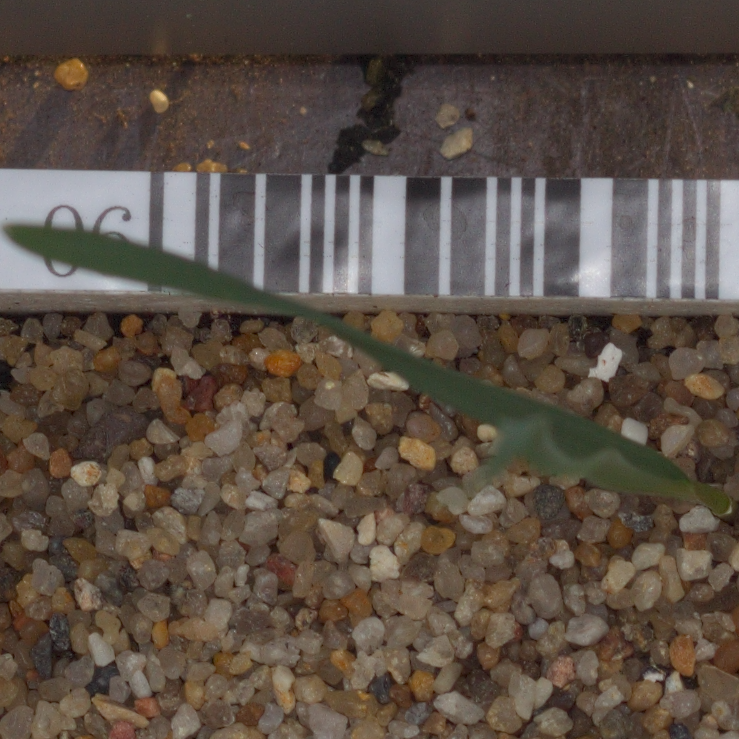

In [50]:
Image.open('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/train/Common wheat/0382d0faf.png')

In [33]:
image_size = 128
batch_size = 32
train_img_path=data_dir+str('/resize_image/')
test_img_path=data_dir+str('/resize_test_image/')

Text(0.5, 1.0, 'Scentless Mayweed')

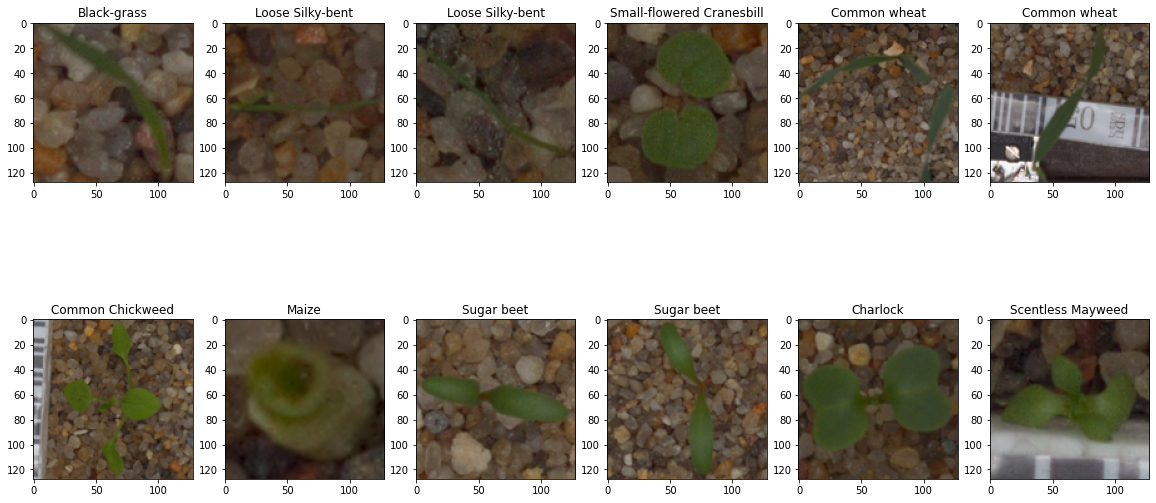

In [26]:
f = plt.figure(figsize=(20, 20))

f.add_subplot(2, 6, 1)
plt.imshow(train_img[0])
plt.title(train_data.category[0])

f.add_subplot(2, 6, 2)
plt.imshow(train_img[496])
plt.title(train_data.category[496])

f.add_subplot(2, 6, 3)
plt.imshow(train_img[759])
plt.title(train_data.category[759])
 
f.add_subplot(2, 6, 4)
plt.imshow(train_img[1370])
plt.title(train_data.category[1370])

f.add_subplot(2, 6, 5)
plt.imshow(train_img[1755])
plt.title(train_data.category[1755])

f.add_subplot(2, 6, 6)
plt.imshow(train_img[1685])
plt.title(train_data.category[1685])

f.add_subplot(1, 6, 1)
plt.imshow(train_img[2409])
plt.title(train_data.category[2409])

f.add_subplot(1, 6, 2)
plt.imshow(train_img[2630])
plt.title(train_data.category[2630])

f.add_subplot(1, 6, 3)
plt.imshow(train_img[3020])
plt.title(train_data.category[3020])
 
f.add_subplot(1, 6, 4)
plt.imshow(train_img[3251])
plt.title(train_data.category[3251])

f.add_subplot(1, 6, 5)
plt.imshow(train_img[3538])
plt.title(train_data.category[3538])

f.add_subplot(1, 6, 6)
plt.imshow(train_img[4749])
plt.title(train_data.category[4749])

In [45]:
# normalization of images

AttributeError: ignored

In [34]:
categorical_labels = np_utils.to_categorical(train_data.category_id)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_X,categorical_labels,test_size=0.2,random_state=1,stratify=categorical_labels)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

AttributeError: ignored

In [18]:
x_train=np.array(x_train)

ValueError: ignored

In [24]:
# Normalization of the Image Data
x_train = np.array(x_train, np.float32) / 255
x_test = np.array(x_test,np.float32) / 255

ValueError: ignored

In [38]:
train_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/resize_image/"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(128, 128),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


Found 0 images belonging to 0 classes.


NameError: ignored

In [37]:
    datagen_train = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                            horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True)
    
    datagen_valid = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                            horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True)

In [23]:
train_generator = datagen_train.flow_from_dataframe(dataframe=train_data,
                                                  directory="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/resize_image/",
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=0,
                                                  shuffle=True,
                                                  class_mode="categorical",
                                                  target_size=(128, 128))
valid_generator=datagen_valid.flow_from_dataframe(dataframe=train_data,
                                                  directory="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/resize_image/",
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=0,
                                                  shuffle=False,
                                                  class_mode="categorical",
                                                  target_size=(128, 128))

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


In [44]:
train_datagen.fit(X_train)

ValueError: ignored

In [ ]:
train_generator.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [ ]:

#Initialize model
cnn_model = Sequential()
cnn_model.add(InputLayer(input_shape=(image_size,image_size,3)))
cnn_model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, kernel_size=(3,3),strides=(1,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#cnn_model.add(BatchNormalization())
#cnn_model.add(Conv2D(128, kernel_size=(3,3),strides=(1,1),activation='relu'))
#cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(GlobalMaxPool2D())
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(12,activation='softmax'))



In [ ]:
learning_rate=0.001
epochs=50
opt = Adam(lr=learning_rate, decay=learning_rate / epochs)
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = cnn_model.fit(train_generator,
          epochs=50,
          steps_per_epoch= 3803//batch_size,  #Number of training images//batch_size
          validation_data=val_generator,
          validation_steps = 947//batch_size, #Number of validation images//batch_size
          #callbacks = [model_checkpoint],
          verbose = 1)

Epoch 1/50
 45/118 [==========>...................] - ETA: 10:12 - loss: 2.5795 - accuracy: 0.1119

UnknownError: ignored